In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.constants import pi as PI
from scipy.interpolate import interp1d


# EOS combination

In [ ]:
ceft_lower= np.loadtxt('/home/sam/thesis/code/EOS/ceft/eos_ceft_lower.dat')
n_ceft_lower, p_ceft_lower, e_ceft_lower = ceft_lower.T

ceft_upper= np.loadtxt('/home/sam/thesis/code/EOS/ceft/eos_ceft_upper.dat')
n_ceft_upper, p_ceft_upper, e_ceft_upper = ceft_upper.T

n_ceft = n_ceft_lower # fm^-3

e_ceft = (e_ceft_lower+e_ceft_upper)/2
p_ceft = (p_ceft_lower+p_ceft_upper)/2

n_crust = n_ceft[:428]
e_crust = e_ceft[:428]
p_crust = p_ceft[:428]

cs2_crust_lower = np.gradient(p_ceft_lower[:428], e_ceft_lower[:428]) #dp/de
cs2_crust_upper = np.gradient(p_ceft_upper[:428], e_ceft_upper[:428]) #dp/de
cs2_crust = (cs2_crust_upper+cs2_crust_lower)/2

In [181]:
samples = np.load("/home/sam/thesis/code/results/testing/tov_eos.npy")


e_array_samples = samples[0][0]
p_array_samples = samples[1][0]
cs2_array_samples = samples[2][0]
n_array_sample = np.linspace(n_ceft[0], 25,200)

p_array = np.concatenate((p_crust, p_array_samples))
e_array = np.concatenate((e_crust, e_array_samples))
cs2_array = np.concatenate((cs2_crust, cs2_array_samples))
n_array = np.concatenate((n_crust, n_array_sample))


In [182]:
tov_test_eos = np.array([e_array, p_array, cs2_array])
print(tov_test_eos.shape)
tov_test_eos = np.reshape(tov_test_eos, (3,1,len(tov_test_eos[0])))

np.save("/home/sam/thesis/code/results/testing/tov_eos_combined.npy", tov_test_eos)

(3, 1056)


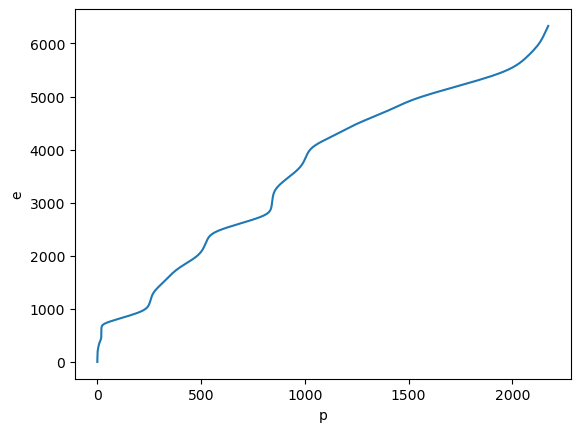

In [207]:
plt.plot(p_array, e_array)
plt.xlabel("p")
plt.ylabel("e")
plt.show()

### for the rest

In [161]:
def combine_crust(path):
    ceft_lower= np.loadtxt('/home/sam/thesis/code/EOS/ceft/eos_ceft_lower.dat')
    n_ceft_lower, p_ceft_lower, e_ceft_lower = ceft_lower.T

    ceft_upper= np.loadtxt('/home/sam/thesis/code/EOS/ceft/eos_ceft_upper.dat')
    n_ceft_upper, p_ceft_upper, e_ceft_upper = ceft_upper.T

    n_ceft = n_ceft_lower # fm^-3

    e_ceft = (e_ceft_lower+e_ceft_upper)/2
    p_ceft = (p_ceft_lower+p_ceft_upper)/2

    n_crust = n_ceft[:428]
    e_crust = e_ceft[:428]
    p_crust = p_ceft[:428]
    m_crust = len(p_crust)

    cs2_crust_lower = np.gradient(p_ceft_lower[:428], e_ceft_lower[:428]) #dp/de
    cs2_crust_upper = np.gradient(p_ceft_upper[:428], e_ceft_upper[:428]) #dp/de
    cs2_crust = (cs2_crust_upper+cs2_crust_lower)/2

    samples = np.load(path)

    n = samples.shape[1]
    m = samples.shape[2]
    m_crust = len(p_crust)

    # Preallocate new array with updated size
    new_m = m + m_crust
    new_slice = np.zeros((3, n, new_m))

    # Loop through each sample and prepend crust
    for i in range(n):
        new_slice[0, i] = np.concatenate((e_crust, samples[0, i]))     # e_array
        new_slice[1, i] = np.concatenate((p_crust, samples[1, i]))     # p_array
        new_slice[2, i] = np.concatenate((cs2_crust, samples[2, i]))   # cs2_array

    np.save(path, new_slice)


In [ ]:
""" nend = 25

path = f"/home/sam/thesis/code/results/eos_samples/{nend}nsConnecting_eos.npy"

combine_crust(path) """

# correction to tidal deformability

In [247]:
R = 0.5
M = 4
x = 74
m = 0.89

R**2 * (x - ((2*M*m)/(R)))**2 == (R*x - 2*M*m)**2

True

In [ ]:
cs2_all = (np.load("/home/sam/thesis/code/results/eos_samples/25nsConnecting_eos.npy"))[2]

cs2_crust_try = cs2_crust.reshape(1,-1)

cs2_25ns = np.hstack((np.tile(cs2_crust_try, (cs2_all.shape[0], 1)), cs2_all))

In [115]:
np.min(cs2_all)

3.1123887979961175e-05

In [126]:
np.sum(cs2_all<1e-3)

1220

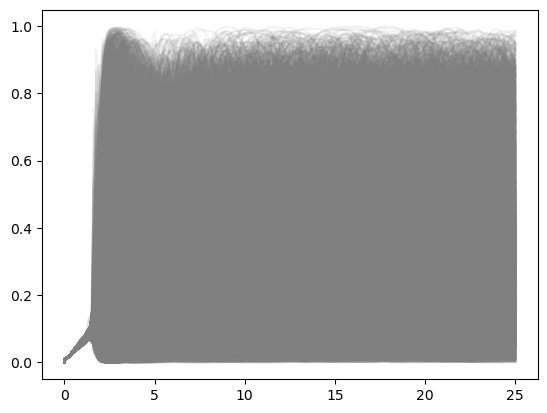

In [116]:
for i in cs2_25ns:
    plt.plot(n_array, i, color='gray', alpha=0.1)
plt.show()

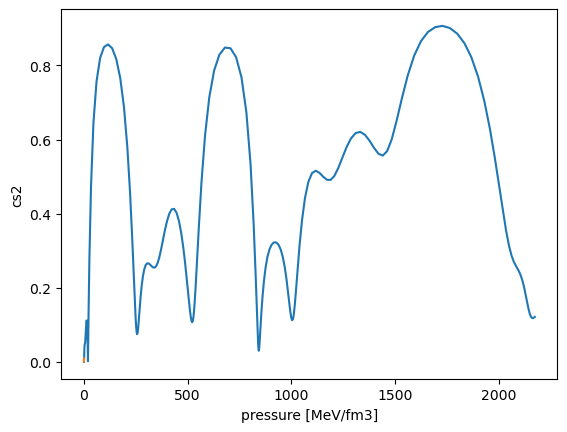

In [5]:
plt.plot(p_array, cs2_array)
plt.plot(p_crust[50:], cs2_crust[50:])
#plt.xlim(800,1000)
#plt.ylim(0,0.025)
plt.xlabel("pressure [MeV/fm3]")
plt.ylabel("cs2")
plt.show()

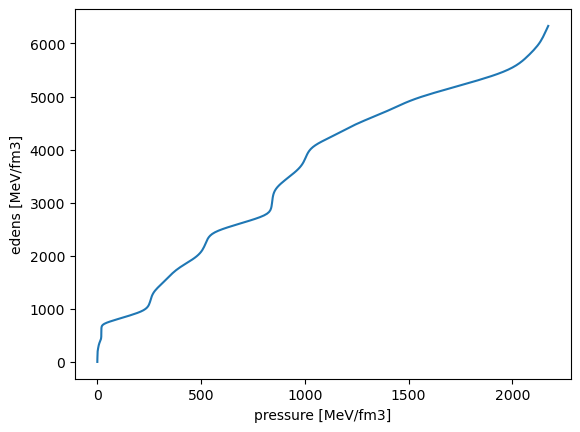

In [76]:
plt.plot(p_array, e_array)
plt.ylabel("edens [MeV/fm3]")
plt.xlabel("pressure [MeV/fm3]")
plt.show()

#### run this after tov dimless has been run

In [259]:
that_term  =  5*convert_edens_dimensionless(e_array) + 9*convert_pressure_dimensionless(p_array) + ((convert_edens_dimensionless(e_array) + convert_pressure_dimensionless(p_array) )/cs2_array)

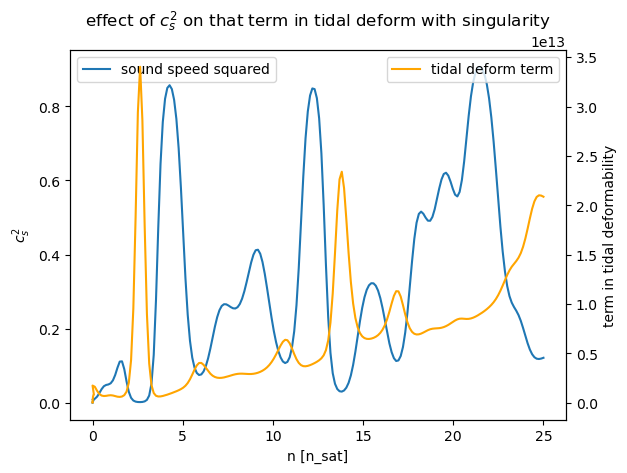

In [262]:
fig, ax1 = plt.subplots()

ax1.plot(n_array, cs2_array, label='sound speed squared')
ax1.set_xlabel('n [n_sat]')
ax1.set_ylabel(r'$c_s^2$')
ax1.tick_params('y')


ax2 = ax1.twinx()
ax2.plot(n_array, that_term,color='orange', label='tidal deform term')
ax2.set_ylabel('term in tidal deformability')
ax2.tick_params('y')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title(r'effect of $c_s^2$ on that term in tidal deform with singularity')
plt.show()

#### end of the cells that need to be run out of order

In [ ]:
def find_local_minimas(arr):
    local_minimas = []
    indices = []
    n = len(arr)
    
    if n == 0:
        return local_minimas
    
    for i in range(n):
        if i == 0:
            if n > 1 and arr[i] < arr[i + 1]:
                local_minimas.append(arr[i])
                indices.append(i)
        elif i == n - 1:
            if arr[i] < arr[i - 1]:
                local_minimas.append(arr[i])
                indices.append(i)
        else:
            if arr[i] < arr[i - 1] and arr[i] < arr[i + 1]:
                local_minimas.append(arr[i])
                indices.append(i)
    
    return local_minimas, indices

In [49]:
_, minima_indices = find_local_minimas(cs2_array)
cs2_min = cs2_array[minima_indices]
n_min = n_array[minima_indices]

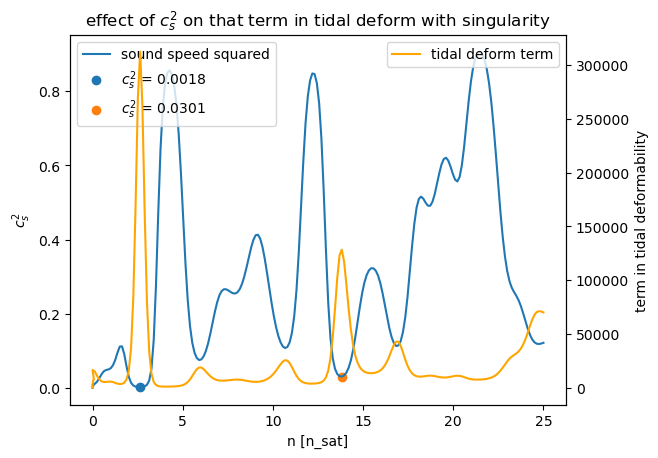

In [74]:
fig, ax1 = plt.subplots()
ax1.plot(n_array, cs2_array, label='sound speed squared')
ax1.set_xlabel('n [n_sat]')
ax1.set_ylabel(r'$c_s^2$')
ax1.tick_params('y')
ax1.scatter(n_min[8], cs2_min[8], label = rf"$c_s^2$ = {cs2_min[8]:.4f}")
ax1.scatter(n_min[12], cs2_min[12], label = rf"$c_s^2$ = {cs2_min[12]:.4f}")


ax2 = ax1.twinx()
ax2.plot(n_array, (e_array+p_array)/cs2_array,color='orange', label='tidal deform term')
ax2.set_ylabel('term in tidal deformability')
ax2.tick_params('y')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title(r'effect of $c_s^2$ on that term in tidal deform with singularity')
plt.show()

# creation of ap4.npy

In [218]:
ap4 = np.loadtxt("/home/sam/thesis/universality(theirs)/universality/eos/ap4.csv", skiprows=1, delimiter=",").T

e_arr = ap4[2] / 1.7827e12 #MeVfm^-3
p_arr = ap4[1] / 1.7827e12 #MeVfm^-3

array = np.array([e_arr,p_arr, np.gradient(p_arr,e_arr)])
array = np.expand_dims(array, axis=1)

#np.save("/home/sam/thesis/code/results/testing/ap4_eos.npy", array)

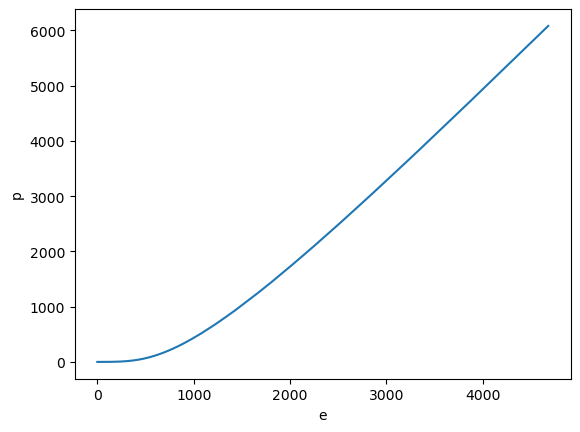

In [227]:
plt.plot(array[0][0], array[1][0])
plt.xlabel("e")
plt.ylabel("p")
plt.show()

# MR relation

## 10ns matching

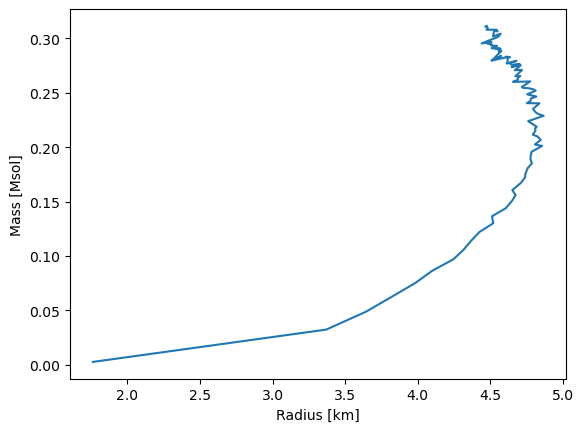

In [147]:
tov_sol = np.array(

[[[0.00270756419741459, 0.032411365471910106, 0.048850941401954576, 0.06284718047970661, 0.0754972863945278, 0.08613137548433873, 0.0971099741794028, 0.10585617940021112, 0.11386419287183353, 0.12202805796960366, 0.13013518400360413, 0.13654002712282204, 0.14381107742730243, 0.15040856354933402, 0.15595910542843977, 0.16057234832228184, 0.167242536547219, 0.172337579363969, 0.17524882400426825, 0.18099431356097576, 0.1850079615528661, 0.18916583770028764, 0.19292334974145697, 0.1958065450428388, 0.2011483467128534, 0.20245079007706995, 0.20666268340355334, 0.2098508888172363, 0.21143966403636724, 0.21508209542076004, 0.21722084568091116, 0.21875067874804113, 0.22146483979166864, 0.2239290019950611, 0.22884314845967657, 0.23052226043019547, 0.2319424230685833, 0.23357695730734412, 0.23519709650969808, 0.24029978957073966, 0.24042609045407917, 0.24260822371287957, 0.244734442362034, 0.24648780475175314, 0.2485554301865117, 0.251880396558721, 0.2532675976420048, 0.25421002717863583, 0.25439616962733524, 0.2554900416003031, 0.2557110972859314, 0.26044258313473295, 0.2602557337880007, 0.2599938480243717, 0.26193671607499025, 0.2639295475411177, 0.2654068695834058, 0.2650705365288284, 0.2709262927595015, 0.27097629010926433, 0.2707167151596499, 0.27521431520304845, 0.27364117436384133, 0.27646712497665005, 0.2758478565758547, 0.27566551433717795, 0.277208368192658, 0.27932730344709766, 0.27676894351261055, 0.2791314720320339, 0.2813052521472662, 0.28208345256093487, 0.2826917120778148, 0.2831467177143747, 0.2825037042812286, 0.2794910306351094, 0.2837644043162011, 0.2798922151732807, 0.28847377560826065, 0.28802384054686747, 0.2907846935732038, 0.2903821064104374, 0.29016275235605454, 0.2909270723149519, 0.2930969391682694, 0.29320130627256374, 0.29397985423016615, 0.29522979713019987, 0.29637767887269917, 0.2953838011832034, 0.30126269938614175, 0.3042535771160034, 0.30179227576940615, 0.30675172256181304, 0.30640262864010126, 0.30790945247799567, 0.30783561304487794, 0.30959694976207724, 0.3109147824526282, 0.3113929403365742],
  [1.7615827921447518, 3.370185887726495, 3.643856908799021, 3.8252921678546565, 3.9871216344091183, 4.096680367761396, 4.247114997989606, 4.317105779436564, 4.36735544956518, 4.425086952650951, 4.521209317620477, 4.512166453239676, 4.605714955664782, 4.648888628441848, 4.6743436973245265, 4.652145555568197, 4.71174319884027, 4.740368135310702, 4.741475662859822, 4.759138138102768, 4.786968763767165, 4.777268332897724, 4.779551109879771, 4.785247442035598, 4.8574525501346075, 4.8072637819040995, 4.848425920806382, 4.825905550520944, 4.793187572881304, 4.811490217304199, 4.809239330958861, 4.820398807352701, 4.789095204495958, 4.761343368930389, 4.868642002595144, 4.8301322216977285, 4.8141442436073785, 4.802795248451313, 4.79521073995781, 4.839119563314577, 4.752204906927041, 4.777923554016657, 4.780186604004761, 4.818242915199241, 4.754309823820609, 4.8131738654683325, 4.795047821895961, 4.760795348872166, 4.727041616115902, 4.717152727372494, 4.722131857234128, 4.775914582193672, 4.743971943724599, 4.656414345408984, 4.689585437730849, 4.691185131098538, 4.706891526412651, 4.672705142336536, 4.719261437679931, 4.70101962766349, 4.669856123420937, 4.709924864636982, 4.647061201947904, 4.7021827867311705, 4.6586378932618695, 4.648188974848212, 4.6324523176614045, 4.680894083010521, 4.613497706450811, 4.620421737631779, 4.619035416982872, 4.6218825455943655, 4.636195352607523, 4.607382391859207, 4.608445337596969, 4.509010710203608, 4.575271222692455, 4.513495347117046, 4.576935981918809, 4.557440526256079, 4.565449790657875, 4.538617198371788, 4.571692731846016, 4.508940058521148, 4.547521529456465, 4.509525709254394, 4.511073026932962, 4.479506142075786, 4.509156145738408, 4.4416598475700155, 4.5530032615946885, 4.5721416248689035, 4.519331135028566, 4.526578564650746, 4.550963438048942, 4.543643138902557, 4.474813401770245, 4.482973109859911, 4.466453764150098, 4.475398375871935],
  [1, 11.090909090909092, 21.181818181818183, 31.272727272727273, 41.36363636363637, 51.45454545454546, 61.54545454545455, 71.63636363636364, 81.72727272727273, 91.81818181818183, 101.90909090909092, 112.00000000000001, 122.0909090909091, 132.1818181818182, 142.27272727272728, 152.36363636363637, 162.45454545454547, 172.54545454545456, 182.63636363636365, 192.72727272727275, 202.81818181818184, 212.90909090909096, 223, 233.0909090909091, 243.18181818181822, 253.2727272727273, 263.3636363636364, 273.4545454545455, 283.54545454545456, 293.6363636363637, 303.72727272727275, 313.81818181818187, 323.90909090909093, 334, 344.0909090909091, 354.1818181818182, 364.2727272727273, 374.3636363636364, 384.4545454545455, 394.54545454545456, 404.6363636363637, 414.72727272727275, 424.81818181818187, 434.90909090909093, 445.00000000000006, 455.0909090909091, 465.18181818181824, 475.2727272727273, 485.3636363636364, 495.4545454545455, 505.54545454545456, 515.6363636363636, 525.7272727272727, 535.8181818181819, 545.909090909091, 556, 566.0909090909091, 576.1818181818182, 586.2727272727274, 596.3636363636364, 606.4545454545455, 616.5454545454546, 626.6363636363637, 636.7272727272727, 646.8181818181819, 656.909090909091, 667, 677.0909090909091, 687.1818181818182, 697.2727272727274, 707.3636363636364, 717.4545454545455, 727.5454545454546, 737.6363636363637, 747.7272727272729, 757.8181818181819, 767.909090909091, 778.0000000000001, 788.090909090909, 798.1818181818182, 808.2727272727274, 818.3636363636364, 828.4545454545454, 838.5454545454546, 848.6363636363637, 858.7272727272727, 868.8181818181819, 878.909090909091, 889.0000000000001, 899.0909090909091, 909.1818181818182, 919.2727272727275, 929.3636363636365, 939.4545454545455, 949.5454545454546, 959.6363636363636, 969.7272727272727, 979.818181818182, 989.909090909091, 1000]]]

)

plt.plot(tov_sol[0][1],tov_sol[0][0])
plt.xlabel("Radius [km]")
plt.ylabel("Mass [Msol]")
plt.show()

## 25ns matching

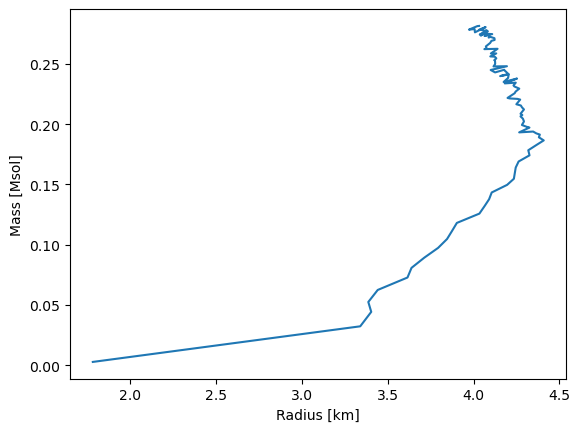

In [146]:
tov_sol = np.array(

[[[0.0027462991888217814, 0.03228334108229557, 0.04425135608264083, 0.05248243640088998, 0.062443613222122295, 0.07276632655931423, 0.08077925621600544, 0.08922707944503518, 0.09733581009952508, 0.1047049215604955, 0.11138468280541157, 0.11805633824363065, 0.12578510185432815, 0.13205149635806304, 0.13772226771898996, 0.14331530672190776, 0.1496283502849518, 0.15467953056780853, 0.15991155117386072, 0.16401150179345478, 0.1690116186374685, 0.17413094818680688, 0.1783423662760115, 0.1828518178006269, 0.1865117948010365, 0.18908014583139016, 0.19133653974840256, 0.1923411323280859, 0.19384931793213303, 0.1931597156619675, 0.19715622486729376, 0.19778969871557917, 0.19929724220657122, 0.20221966140677733, 0.2045451803980632, 0.20647125143932998, 0.20756417342612676, 0.208602703743407, 0.21217854126299912, 0.2139286936456424, 0.21546243904621235, 0.21649425028304162, 0.22036564841533926, 0.22094633565914082, 0.221292345142807, 0.22173475750813057, 0.2256578469930098, 0.2269995827998328, 0.22944685178151797, 0.23125586658798578, 0.2321191962489642, 0.23441033791182958, 0.2337974504861829, 0.23782715986617134, 0.23496344429993726, 0.23832363420609337, 0.23896286841450104, 0.241252368057829, 0.23983168775139435, 0.2416246301059878, 0.24457862113912351, 0.2450983262834644, 0.24290004246253152, 0.24491825547486334, 0.24803915975379903, 0.24786671370978655, 0.24959031596903763, 0.2502608385567735, 0.2533018987386986, 0.2530325434851346, 0.2545804206939008, 0.25595444097499187, 0.25616641783281985, 0.2586551021388642, 0.25860484148660207, 0.2624920912649795, 0.2622186054209208, 0.262885548464546, 0.26448667607204124, 0.26735676160683347, 0.269071844160976, 0.2698396886095737, 0.2712756991495846, 0.2723707386736513, 0.2717946348983415, 0.274217383232643, 0.2732564961673598, 0.2746893349712506, 0.27510678646560033, 0.274261462987766, 0.27785691812809954, 0.27343941847082953, 0.2770144952873831, 0.278421801165428, 0.28046950121574454, 0.27616808148494915, 0.2788600587257078, 0.2784045653990124, 0.2813121612211077, 0.28147291719179496],
  [1.7820183722009633, 3.33983293974577, 3.4039479467563885, 3.386907910310382, 3.4417374543594526, 3.6151545929516704, 3.638658501402985, 3.713008180752736, 3.793426893576329, 3.845656410453023, 3.8746207116378306, 3.902732051773305, 4.0340754938593095, 4.064398506479959, 4.090648882160582, 4.1058591380234395, 4.195594158513619, 4.234903545838775, 4.240956156776858, 4.245708072439012, 4.262518600537012, 4.326018179032088, 4.318831488617981, 4.368066618599137, 4.408854416056273, 4.380595032758183, 4.386061352724139, 4.365504605384927, 4.347220151416196, 4.265681736951679, 4.325658287540787, 4.309374570541192, 4.281710876741951, 4.293900613214315, 4.2874123765744665, 4.273352579135961, 4.284025320003397, 4.273601357289137, 4.293693075443519, 4.282115548563086, 4.275608510918887, 4.2494428091374585, 4.271567496854489, 4.255945456479406, 4.211715329342381, 4.198046061220385, 4.239592999724501, 4.2449819993304905, 4.266285923476489, 4.237774303065174, 4.232597191607238, 4.245965403319388, 4.181834751455535, 4.253375042580971, 4.175083227150887, 4.201367353262846, 4.201907748841769, 4.205059786746679, 4.154932568598183, 4.202709475910093, 4.180520892946643, 4.178644119504697, 4.125559199482522, 4.099768628316244, 4.19454364664251, 4.116350030116107, 4.124810333524551, 4.125984280582066, 4.124714866259681, 4.120774051669373, 4.1327337327322935, 4.123651571023584, 4.097388968518339, 4.132365494655444, 4.100804215901934, 4.139911000454842, 4.063051658050564, 4.07606380492323, 4.0718406218754355, 4.096757947941061, 4.1042420976732314, 4.12282167955215, 4.121811251127734, 4.098548175202356, 4.088025851102144, 4.091815237307436, 4.063717258490979, 4.1088154586741155, 4.052980470379849, 4.036233966271392, 4.0764393832272905, 4.042174134288882, 4.083563535965064, 4.033834718331657, 4.0703403101946, 4.008053511856085, 4.00596251597332, 3.9733075235629793, 4.022041733170791, 4.032276195878308],
  [1, 11.090909090909092, 21.181818181818183, 31.272727272727273, 41.36363636363637, 51.45454545454546, 61.54545454545455, 71.63636363636364, 81.72727272727273, 91.81818181818183, 101.90909090909092, 112.00000000000001, 122.0909090909091, 132.1818181818182, 142.27272727272728, 152.36363636363637, 162.45454545454547, 172.54545454545456, 182.63636363636365, 192.72727272727275, 202.81818181818184, 212.90909090909096, 223, 233.0909090909091, 243.18181818181822, 253.2727272727273, 263.3636363636364, 273.4545454545455, 283.54545454545456, 293.6363636363637, 303.72727272727275, 313.81818181818187, 323.90909090909093, 334, 344.0909090909091, 354.1818181818182, 364.2727272727273, 374.3636363636364, 384.4545454545455, 394.54545454545456, 404.6363636363637, 414.72727272727275, 424.81818181818187, 434.90909090909093, 445.00000000000006, 455.0909090909091, 465.18181818181824, 475.2727272727273, 485.3636363636364, 495.4545454545455, 505.54545454545456, 515.6363636363636, 525.7272727272727, 535.8181818181819, 545.909090909091, 556, 566.0909090909091, 576.1818181818182, 586.2727272727274, 596.3636363636364, 606.4545454545455, 616.5454545454546, 626.6363636363637, 636.7272727272727, 646.8181818181819, 656.909090909091, 667, 677.0909090909091, 687.1818181818182, 697.2727272727274, 707.3636363636364, 717.4545454545455, 727.5454545454546, 737.6363636363637, 747.7272727272729, 757.8181818181819, 767.909090909091, 778.0000000000001, 788.090909090909, 798.1818181818182, 808.2727272727274, 818.3636363636364, 828.4545454545454, 838.5454545454546, 848.6363636363637, 858.7272727272727, 868.8181818181819, 878.909090909091, 889.0000000000001, 899.0909090909091, 909.1818181818182, 919.2727272727275, 929.3636363636365, 939.4545454545455, 949.5454545454546, 959.6363636363636, 969.7272727272727, 979.818181818182, 989.909090909091, 1000]]]
)

plt.plot(tov_sol[0][1],tov_sol[0][0])
plt.xlabel("Radius [km]")
plt.ylabel("Mass [Msol]")
plt.show()

## AP4 

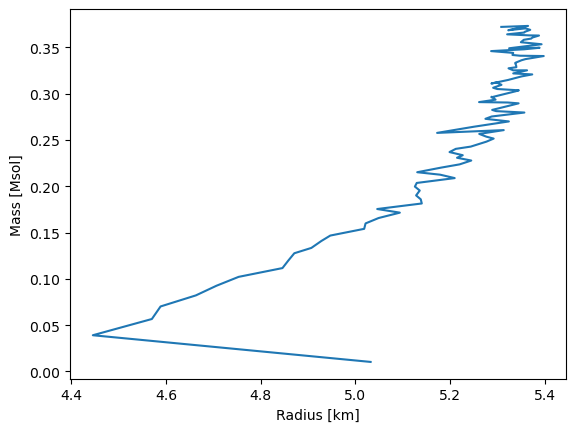

In [138]:
tov_sol = np.array(

[[[0.010274301246011261, 0.03909831248010021, 0.05663177275020989, 0.07019782451911193, 0.08213018725300446, 0.09257201668109136, 0.1021670278484371, 0.11164902663235693, 0.11984773717865713, 0.12767584249961442, 0.13343209918627716, 0.14090207275771766, 0.14678188491311725, 0.15404315364791307, 0.15989854705217343, 0.16571469095765826, 0.17153509493639202, 0.17545274142299994, 0.18144453291367216, 0.1859427809938566, 0.19014089845757523, 0.1954332150494948, 0.1996906703109459, 0.20362230539562298, 0.208860744925506, 0.2125537313055934, 0.2152036994154223, 0.2202195838552594, 0.22369567986971747, 0.22783502758373136, 0.2308293507545545, 0.23357185737856292, 0.23698438435603794, 0.24045410359470892, 0.2428801254400507, 0.2482385517841791, 0.25154152811178215, 0.2536302063127796, 0.2565948842529561, 0.2606976414077834, 0.25769770364999955, 0.2643841384117284, 0.2670091759125859, 0.27007116359510863, 0.27289417344957867, 0.2754056783337863, 0.27967320074103375, 0.28121349788790007, 0.2825200125884878, 0.28638039916216695, 0.2896239753539193, 0.29052686806899347, 0.2909577095183668, 0.2935923009084185, 0.296725516245611, 0.2961712980558822, 0.30264590300939886, 0.30369257398045146, 0.3051086608302555, 0.3064479676863828, 0.3096203007096385, 0.31214196077711404, 0.3110620139622496, 0.31489582116677883, 0.31873326835730353, 0.320861750769978, 0.32196123753928296, 0.3252925425460827, 0.3252602341232719, 0.32746437967929437, 0.32866081096656885, 0.33042185600390517, 0.33318995325080175, 0.33359259148579734, 0.33618031699993706, 0.33740475363876227, 0.3407215199324417, 0.34105727856200774, 0.3418763255653585, 0.3441311935619092, 0.34605722967544267, 0.34798569486984776, 0.3496513575898727, 0.3491026481861206, 0.35346000661665955, 0.3546472350563708, 0.3556408444140889, 0.3582574045506583, 0.3595750695520709, 0.3607224150450285, 0.3628629939007508, 0.3630500999783976, 0.3641722185509605, 0.3661042276230972, 0.36692013278174823, 0.3690339563285974, 0.3705993476970494, 0.36860307558766076, 0.3732565601881642, 0.3721999261889569],
  [5.032444908586029, 4.44528500006136, 4.57008344297409, 4.588487484482784, 4.663022677419838, 4.706629445152774, 4.753469634039728, 4.846127063017887, 4.858587739893855, 4.871203769925846, 4.907196653430905, 4.928279043355104, 4.947235386386229, 5.018852263034249, 5.021763872776426, 5.049280932877732, 5.094264255615261, 5.0464238822480745, 5.140620590773884, 5.138434479803027, 5.128627716337308, 5.136300077534482, 5.126040425815224, 5.129984470504963, 5.210225947147174, 5.1794084762875245, 5.130989576154786, 5.181831666803193, 5.220610853364735, 5.24519534131217, 5.215088619445578, 5.227226472657278, 5.19926697785794, 5.212503807666528, 5.244029777799093, 5.277279341687215, 5.292541962573904, 5.277057345863088, 5.262055876391334, 5.313856307395507, 5.173012172965801, 5.251105806792917, 5.285018552980119, 5.324661553345743, 5.275073005663154, 5.2882977963000135, 5.3574578640101045, 5.297721231224908, 5.289346013936713, 5.320028296255074, 5.345227801328456, 5.322235004211307, 5.26168605831621, 5.296598569695411, 5.287890243150715, 5.287796330845032, 5.338889722501278, 5.34582286579985, 5.300049289912683, 5.291439219600699, 5.309069737743758, 5.298747827940752, 5.28775349584276, 5.323182245570233, 5.351607487435594, 5.374076339986246, 5.333901303439422, 5.3630790693430965, 5.3340066694667945, 5.3239147441888, 5.340525142046534, 5.340013742533902, 5.338020097894128, 5.339222741992537, 5.3514049077071135, 5.359794357139475, 5.398377154990167, 5.348486223664937, 5.332232766971363, 5.333903399201322, 5.287145960611665, 5.356644939578029, 5.389599122445254, 5.325242775553014, 5.393807758044933, 5.370276935832187, 5.350052593981669, 5.356209888381202, 5.371815101059566, 5.374435276865458, 5.388336163378584, 5.367057309490473, 5.321051680363629, 5.357231667919393, 5.358427620407115, 5.369863170283252, 5.359527261119182, 5.323382293512608, 5.365222620845429, 5.308708370635158],
  [1, 11.090909090909092, 21.181818181818183, 31.272727272727273, 41.36363636363637, 51.45454545454546, 61.54545454545455, 71.63636363636364, 81.72727272727273, 91.81818181818183, 101.90909090909092, 112.00000000000001, 122.0909090909091, 132.1818181818182, 142.27272727272728, 152.36363636363637, 162.45454545454547, 172.54545454545456, 182.63636363636365, 192.72727272727275, 202.81818181818184, 212.90909090909096, 223, 233.0909090909091, 243.18181818181822, 253.2727272727273, 263.3636363636364, 273.4545454545455, 283.54545454545456, 293.6363636363637, 303.72727272727275, 313.81818181818187, 323.90909090909093, 334, 344.0909090909091, 354.1818181818182, 364.2727272727273, 374.3636363636364, 384.4545454545455, 394.54545454545456, 404.6363636363637, 414.72727272727275, 424.81818181818187, 434.90909090909093, 445.00000000000006, 455.0909090909091, 465.18181818181824, 475.2727272727273, 485.3636363636364, 495.4545454545455, 505.54545454545456, 515.6363636363636, 525.7272727272727, 535.8181818181819, 545.909090909091, 556, 566.0909090909091, 576.1818181818182, 586.2727272727274, 596.3636363636364, 606.4545454545455, 616.5454545454546, 626.6363636363637, 636.7272727272727, 646.8181818181819, 656.909090909091, 667, 677.0909090909091, 687.1818181818182, 697.2727272727274, 707.3636363636364, 717.4545454545455, 727.5454545454546, 737.6363636363637, 747.7272727272729, 757.8181818181819, 767.909090909091, 778.0000000000001, 788.090909090909, 798.1818181818182, 808.2727272727274, 818.3636363636364, 828.4545454545454, 838.5454545454546, 848.6363636363637, 858.7272727272727, 868.8181818181819, 878.909090909091, 889.0000000000001, 899.0909090909091, 909.1818181818182, 919.2727272727275, 929.3636363636365, 939.4545454545455, 949.5454545454546, 959.6363636363636, 969.7272727272727, 979.818181818182, 989.909090909091, 1000]]]

)

plt.plot(tov_sol[0][1],tov_sol[0][0])
plt.xlabel("Radius [km]")
plt.ylabel("Mass [Msol]")
plt.show()

# TOV scipy

In [109]:
SCALE= 1e0
MEVFM3_TO_KM2 = 1.3234e-6
MSOL_TO_KM = 1.4766

def correct_units_eos(x: float) -> float:
    return x * MEVFM3_TO_KM2 * SCALE

def correct_units_mass(x: float) -> float:
    return (x/SCALE) / MSOL_TO_KM

def eos_to_mevfm3(x: float) -> float:
    return x / MEVFM3_TO_KM2

""" def compute_deformability(c: float, y: float) -> float:
    lambda_val = (16.0/15.0 * (1.0 - 2.0 * c) ** 2) * \
                 (2.0 + 2.0 * c * (y - 1.0) - y) * \
                 1.0 / (2.0 * c * (6.0 - 3.0 * y + 3.0 * c * (5.0 * y - 8.0)) +
                        4.0 * c ** 3 * (13.0 - 11.0 * y + c * (3.0 * y - 2.0) + 2.0 * c ** 2 * (1.0 + y)) +
                        3.0 * (1.0 - 2.0 * c) ** 2 * (2.0 - y + 2.0 * c * (y - 1.0)) * np.log(1.0 - 2.0 * c))
    return lambda_val """

class Tov:
    def __init__(self, e_array: np.ndarray, p_array: np.ndarray, dpde_array: np.ndarray):
        self.e_array = correct_units_eos(e_array)
        self.p_array = correct_units_eos(p_array)
        self.dpde_array = dpde_array
        self.eden_spline = interp1d(x=self.p_array, y=self.e_array, kind='linear', fill_value="extrapolate")

    def tov_de(self, r: float, f: np.ndarray) -> np.ndarray:
        m, p = f
        eden = self.eden_spline(p)
        
        
        dmdr = 4.0 * PI * (r ** 2) * eden

        first_term = p+eden
        second_term = m + (4 * PI * r**3 * p)
        third_term = r * (r - 2*m)
        dpdr = - (first_term * second_term)/third_term 

        return np.array([dmdr, dpdr])
    

"""     dpde_spline = interp1d(self.p_array, self.dpde_array, kind='linear', fill_value="extrapolate")
        dpde = dpde_spline(p)
        
        dydr = ((4.0 * (m + 4.0 * PI * (r ** 3) * p) ** 2) / (r * ((r - 2.0 * m) ** 2)) +
        6.0 / (r - 2.0 * m) - (y ** 2) / r -
        ((r + 4.0 * PI * (r ** 3) * (p - eden)) / ((r ** 2) - 2.0 * m * r)) * y -
        ((4.0 * PI * r ** 2) / (r - 2.0 * m)) * (5.0 * eden + 9.0 * p + (eden + p) / dpde))

return np.array([dmdr, dpdr, dydr]) """

print()

In [110]:
samples = np.load("/home/sam/thesis/code/results/testing/tov_eos.npy")

dpde_array = samples[2][0]
tov = Tov(e_array, p_array, dpde_array)

initial_pressure = np.linspace(1,1000,500)
initial_pressure = correct_units_eos(initial_pressure)

In [111]:
results = []
# Define the wrapper function for solve_ivp
def tov_de_wrapper(r, f):
    return tov.tov_de(r, f)

def pressure_zero_event(r, f):
    return f[1]  # Event occurs when the second element (pressure) is zero

# Set event properties
pressure_zero_event.terminal = True  # Stop the integration when the event occurs
pressure_zero_event.direction = -1 

# Initial conditions
r0 = 1e-6  # initial radius

for i in range(len(initial_pressure)):
    f0 = np.array([1e-8, initial_pressure[i]])#, 2])  # initial state vector

    # Define the range of integration
    r_span = (r0, 15)  # Replace 15 with the maximum radius value if needed

    solution = solve_ivp(tov_de_wrapper, r_span, f0, method='BDF', events=pressure_zero_event)

    if solution.status == 1:  # An event occurred
        r = solution.t_events[0][0]
        m = solution.y_events[0][0][0]
        p = eos_to_mevfm3(solution.y_events[0][0][1])

        results.append([m, r, initial_pressure[i], p])


results = np.array(results).T


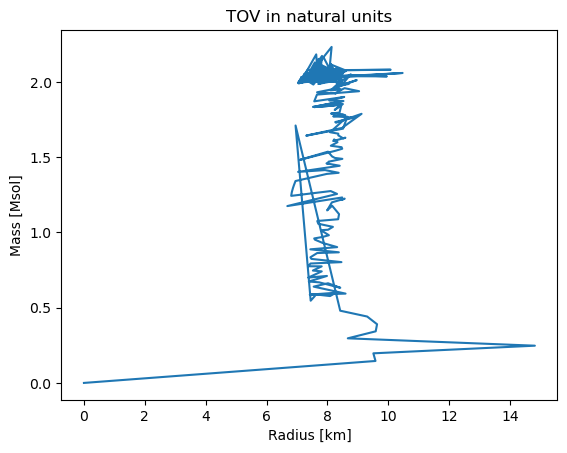

In [113]:
plt.plot(results[1], results[0])
plt.xlabel("Radius [km]")
plt.ylabel("Mass [Msol]")
plt.title("TOV in natural units")
plt.show()

### ap4

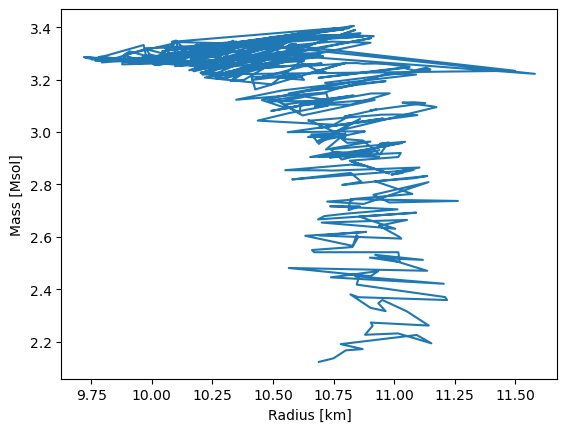

In [107]:
samples = np.load("/home/sam/thesis/code/results/testing/ap4_eos.npy") #EOS from GPR


e_array = samples[0][0]
p_array = samples[1][0]
dpde_array = np.linspace(0,100,len(p_array))
tov = Tov(e_array, p_array, dpde_array)

initial_pressure = np.linspace(100,1000,500)
initial_pressure = correct_units_eos(initial_pressure)

results = []
# Define the wrapper function for solve_ivp
def tov_de_wrapper(r, f):
    return tov.tov_de(r, f)

def pressure_zero_event(r, f):
    return f[1]  # Event occurs when the second element (pressure) is zero

# Set event properties
pressure_zero_event.terminal = True  # Stop the integration when the event occurs
pressure_zero_event.direction = -1 

# Initial conditions
r0 = 1e-6  # initial radius

for i in range(len(initial_pressure)):
    f0 = np.array([1e-8, initial_pressure[i]])#, 2])  # initial state vector

    # Define the range of integration
    r_span = (r0, 15)  # Replace 15 with the maximum radius value if needed

    solution = solve_ivp(tov_de_wrapper, r_span, f0, method='BDF', events=pressure_zero_event)

    if solution.status == 1:  # An event occurred
        r = solution.t_events[0][0]
        m = solution.y_events[0][0][0]
        p = eos_to_mevfm3(solution.y_events[0][0][1])

        results.append([m, r, initial_pressure[i], p])



results = np.array(results).T

plt.plot(results[1], results[0])
plt.xlabel("Radius [km]")
plt.ylabel("Mass [Msol]")
plt.show()

## single p_c

In [285]:
r_eval = np.linspace(10e-6,20,5000)

In [292]:
initial_pressure = np.linspace(1000,10000,1)
initial_pressure = correct_units_eos(initial_pressure)
results = []
# Define the wrapper function for solve_ivp
def tov_de_wrapper(r, f):
    return tov.tov_de(r, f)

# Initial conditions
r0 = 1e-6  # initial radius

for i in range(len(initial_pressure)):
    f0 = np.array([1e-8, initial_pressure[i]])#, 2])  # initial state vector

    # Define the range of integration
    r_span = (r0, 20)  # Replace 15 with the maximum radius value if needed

    # Integrate using solve_ivp
    solution = solve_ivp(tov_de_wrapper, r_span, f0, t_eval=r_eval, method='LSODA')
""" 
    last_positive_index = None

    for j in range(len(solution.t)):
        if solution.y[1][j] < 0:
            break
        last_positive_index = j

    if last_positive_index is not None:
        # Access the solution at the last positive pressure index
        r = solution.t[last_positive_index]
        m = correct_units_mass(solution.y[0][last_positive_index])
        p = eos_to_mevfm3(solution.y[1][last_positive_index])
        #y = solution.y[2][last_positive_index]

        results.append([m, r, initial_pressure[i], p]) """

        #results.append([m, r, initial_pressure[i], y, p])

#results = np.array(results).T
print()


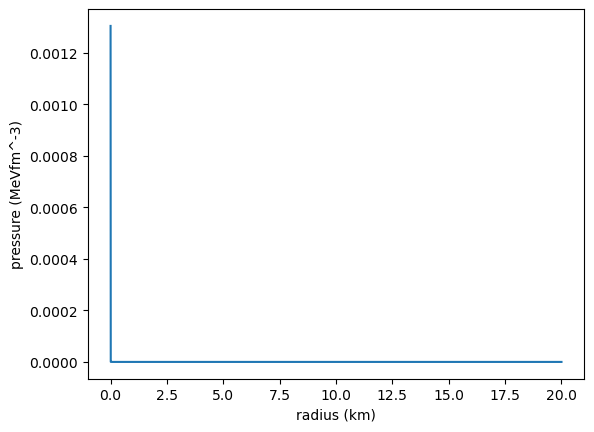

In [294]:
plt.plot(solution.t, (solution.y[1]))
plt.xlabel("radius (km)")
plt.ylabel("pressure (MeVfm^-3)")
#plt.yscale('log')
#plt.ylim(0.001, 1000)
plt.show()

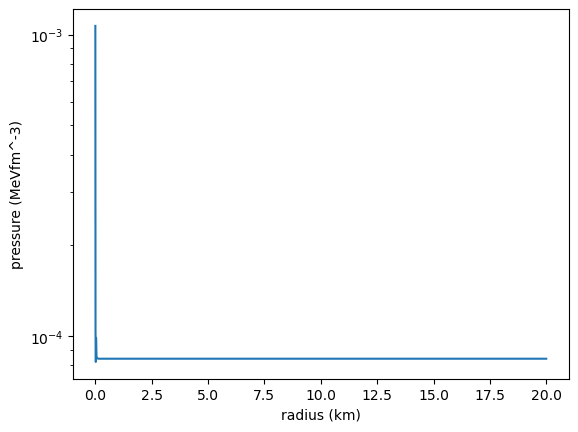

In [288]:
eden_spline = interp1d(x=tov.p_array, y=tov.e_array, kind='linear', fill_value="extrapolate")
plt.plot(solution.t, eden_spline(solution.y[1]))
plt.xlabel("radius (km)")
plt.ylabel("pressure (MeVfm^-3)")
plt.yscale('log')
#plt.ylim(0.001, 1000)
plt.show()

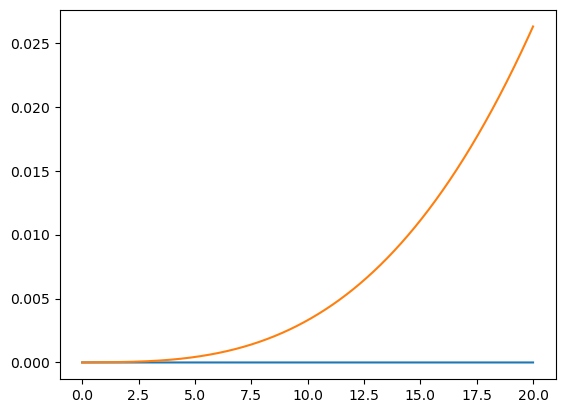

In [289]:
plt.plot(solution.t, solution.t**3 * solution.y[1])
plt.plot(solution.t, solution.y[0])

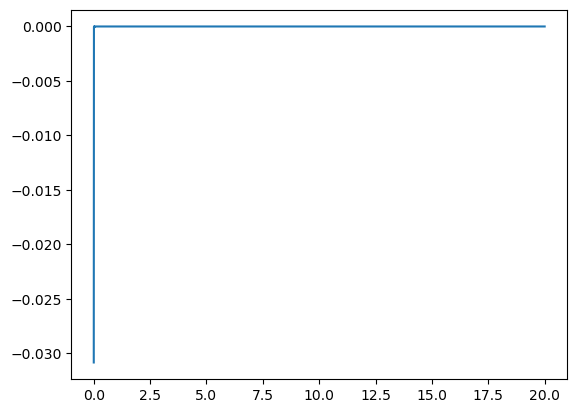

In [290]:
plt.plot(solution.t, tov_de_wrapper(solution.t, solution.y)[1])

In [291]:
for j in range(len(solution.t)):
    if solution.y[1][j] < 0:
        break
    last_positive_index = j

solution.y[0][j] / 1.47

-3.618724188157667e-07

# TOV CGS

In [576]:
MEVFM3_TO_CGS = 1.6012766e33
C = 2.9979e10 #cm/s
G = 6.670e-8 # cm^3g^-1s^-2
MSOL_TO_G = 1.989e33 
G_TO_MSOL = 1/MSOL_TO_G

def eos_to_csg(x):
    return x * MEVFM3_TO_CGS
def r_km_to_csg(x):
    return x * 100000
def r_csg_to_km(x):
    return x/100000
def m_csg_to_sol(x):
    return x * G_TO_MSOL

def eos_to_mevfm3(x):
    return (x/MEVFM3_TO_CGS)

class TOV_cgs:
    def __init__(self, e_array: np.ndarray, p_array: np.ndarray):
        self.rho_array = eos_to_csg(e_array) / C**2 
        self.p_array = eos_to_csg(p_array)
        self.rho_spline = interp1d(x=self.p_array, y=self.rho_array, kind='linear', fill_value="extrapolate")

    def tov_derivs(self, r: float, f: np.ndarray) -> np.ndarray:
        m, P = f

        rho = self.rho_spline(P)

        dmdr = 4 * PI * r**2 * rho

        numerator = -G * (rho + P / C**2) * (m + 4 * PI * r**3 * P / C**2)
        denominator = r * (r - 2 * G * m / C**2)
        dpdr = numerator / denominator
        
        return np.array([dmdr, dpdr])

In [569]:
tov = TOV_cgs(e_array, p_array)
initial_pressure = np.geomspace(1,1000,500)
initial_pressure = eos_to_csg(initial_pressure)

results = []
# Define the wrapper function for solve_ivp
def tov_de_wrapper(r, f):
    return tov.tov_derivs(r, f)

r0 = 1e-8  # initial radius

for i in range(len(initial_pressure)):
    f0 = np.array([0.0, initial_pressure[i]])#, 2])  # initial state vector

    r_span = (r0, r_km_to_csg(15))  

    solution = solve_ivp(tov_de_wrapper, r_span, f0, method='BDF')
    last_positive_index = None

    for j in range(len(solution.t)):
        if solution.y[1][j] < 1e-6:
            break
        last_positive_index = j

    if last_positive_index is not None:
        #r = r_csg_to_km(np.interp(1e-4, solution.y[1][:last_positive_index] , solution.t[:last_positive_index]))
        r = r_csg_to_km(solution.t[last_positive_index])

        #m = m_csg_to_sol(np.interp(r, solution.t[:last_positive_index], solution.y[0][:last_positive_index]))
        m = m_csg_to_sol(solution.y[0][last_positive_index])

        p = eos_to_mevfm3(solution.y[1][last_positive_index])

        results.append([m, r, initial_pressure[i], p])

results = np.array(results).T


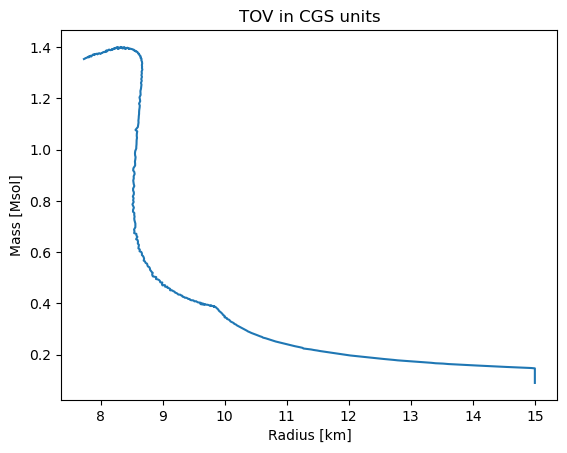

In [570]:
plt.plot(results[1], results[0])
plt.xlabel("Radius [km]")
plt.ylabel("Mass [Msol]")
plt.title("TOV in CGS units")

plt.show()

### single p_c

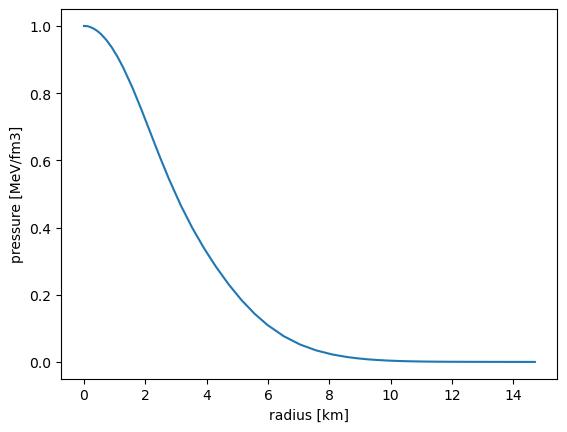

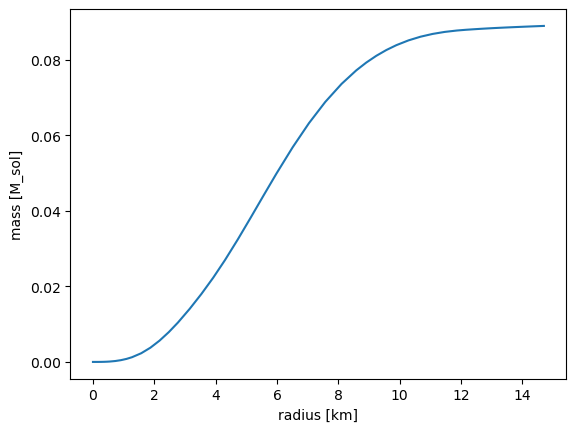

In [588]:
i = 0


tov = TOV_cgs(e_array, p_array)
initial_pressure = np.geomspace(1,1000,500)
initial_pressure = eos_to_csg(initial_pressure)

# Define the wrapper function for solve_ivp
def tov_de_wrapper(r, f):
    return tov.tov_derivs(r, f)

r0 = 1e-8  # initial radius

f0 = np.array([1e-8, initial_pressure[i]])#, 2])  # initial state vector

r_span = (r0, r_km_to_csg(15))  

solution = solve_ivp(tov_de_wrapper, r_span, f0, method='BDF')
last_positive_index = None

for j in range(len(solution.t)):
    if solution.y[1][j] < 1e-6:
        break
    last_positive_index = j

r_profile = r_csg_to_km(solution.t[:last_positive_index])
m_profile = m_csg_to_sol(solution.y[0][:last_positive_index])
p_profile = eos_to_mevfm3(solution.y[1][:last_positive_index])



plt.plot(r_profile, p_profile)
plt.xlabel("radius [km]")
plt.ylabel("pressure [MeV/fm3]")
plt.show()

plt.plot(r_profile, m_profile)
plt.xlabel("radius [km]")
plt.ylabel("mass [M_sol]")
plt.show()


# TOV dimensionless theory

$$ \frac{dm}{dx} = 4 \pi \frac{\Epsilon_0 R_0^3}{M_0}x^2\epsilon$$

$$\frac{dp}{dx} = -\frac{\Epsilon_0 M_0}{P_0 R_0} \frac{(\epsilon + \frac{P_0}{\Epsilon_0}p)(m + \frac{4\pi R_0^3 P_0}{M_0}px^3)}{x^2(1-2\frac{M_0}{R_0}\frac{m}{x})} $$

where, 
$R = R_0x$

$M = M_0m$

$P = P_0p$

$\Epsilon = \Epsilon_0 \epsilon$

Setting $\Epsilon_0$ = $P_0$ and
($\frac{\Epsilon_0 R_0^3}{M_0} = \frac{\Epsilon_0 M_0}{P_0 R_0} = 1$)

so:
$$ \frac{dm}{dx} = 4 \pi x^2\epsilon$$

$$\frac{dp}{dx} = -\frac{(\epsilon + p)(m + 4\pi px^3)}{x^2(1-2\frac{m}{x})} $$


# TOV dimensionless

In [31]:
y0 = 50

M0R0_ratio = 1 #0.001 default

P0_MeVfm3 = 1e-6 #MeV/fm3
R0_km = 1 #1000 default


In [ ]:
y0 = 10

M0R0_ratio = 1e2 #0.001 default

P0_MeVfm3 = 1e-6 #MeV/fm3
R0_km = 1e-8 #1000 default


MEVFM3_TO_KM2 = 1.3234e-6
MSOL_TO_KM = 1.4766

def nuclear_eos_to_natural(x: float) -> float:
    return x * MEVFM3_TO_KM2

def natural_eos_to_nuclear(x: float) -> float:
    return x/MEVFM3_TO_KM2

def msol_mass_to_natural(x:float) -> float:
    return x * MSOL_TO_KM

def natural_mass_to_msol(x:float) -> float:
    return x / MSOL_TO_KM


P0 = nuclear_eos_to_natural(P0_MeVfm3)
E0 = P0 # E0 is set to P0
R0 = R0_km
M0 = M0R0_ratio * R0
P0E0_ratio = P0/E0

E0_MeVfm3 = natural_eos_to_nuclear(E0)
M0_msol = natural_mass_to_msol(M0)

four_pi_rsqr_p = 4 * PI * R0**2 * P0 # this will be in tov.rs not helpers


def convert_pressure_dimensionless(x):
    # to dimless from MeV/fm3
    return x/P0_MeVfm3

def convert_edens_dimensionless(x):
    # to dimless from MeV/fm3
    return x/E0_MeVfm3

def convert_km_dimensionless(x):
    # to dimless from km
    return x/R0

def convert_radius_to_km(x):
    # to km from dimless
    return x*R0

def rescale_mass(x):
    # to km from dimless
    return x * M0

def convert_mass_msol(x):
    return (rescale_mass(x))/MSOL_TO_KM

# ^ did the above

def convert_pressure_to_mevfm3(x):
    return x*P0_MeVfm3

# don't need these below
def rescale_y(y):
    return y*y0

def convert_y_dimensionless(y):
    return y/y0

class Tov_dimless:
    def __init__(self, e_array: np.ndarray, p_array: np.ndarray, dpde_array: np.ndarray):
        self.e_array = convert_edens_dimensionless(e_array)
        self.p_array = convert_pressure_dimensionless(p_array)
        self.dpde_array = dpde_array

        self.eden_spline = interp1d(x=self.p_array, y=self.e_array, kind='linear', fill_value="extrapolate")
        self.dpde_spline = interp1d(self.p_array, self.dpde_array, kind='linear', fill_value="extrapolate")

    def tov_de(self, x: float, f: np.ndarray) -> np.ndarray:
        m, p = f
        eden = self.eden_spline(p)
        dpde = self.dpde_spline(p)
        
        dmdr_factor = (E0 * R0**3)/M0
        dmdr = 4.0 * PI * (x ** 2) * eden * dmdr_factor

        dpdr_factor = (E0*M0)/(P0*R0)
        second_factor = (R0**3 * P0)/M0
        third_factor = M0/R0

        first_term = eden + (P0E0_ratio*p)
        second_term = m + (4 * PI * x**3 * p * second_factor)
        third_term = x**2 * (1 - (2*m/x * third_factor) )
        dpdr = - dpdr_factor*(first_term * second_term)/third_term

        #dydx = compute_dydx(p, eden, dpde, m, x, y)

        return np.array([dmdr, dpdr])


def compute_dydx(p, eden, dpde, m, x, y):
    dy_first_numer = 4 * M0**2 * (m + (1/M0R0_ratio * four_pi_rsqr_p * x**3 * p) )**2
    dy_first_denom = R0**2 * (x - (2*M0R0_ratio * m))**2
    dy_first = dy_first_numer/dy_first_denom

    dy_second = 6 / (1 - (2 * M0R0_ratio * m/x))

    dy_fourth_numer = x + ( (four_pi_rsqr_p * x**3)*(P0E0_ratio*p-eden) )
    dy_fourth_denom = x - (2 * M0R0_ratio * m)
    dy_fourth = dy_fourth_numer/dy_fourth_denom * y

    dy_fifth_factor = (four_pi_rsqr_p * x**2)/ (1 - (2*M0R0_ratio*m/x))
    dy_fifth_first = 5 * eden
    dy_fifth_second = 9 * P0E0_ratio * p
    dy_fifth_third = (eden + P0E0_ratio*p)/(dpde)
    dy_fifth = dy_fifth_factor * (dy_fifth_first + dy_fifth_second + dy_fifth_third)

    dydx = 1/x * (dy_first * dy_second - y**2 - dy_fourth - dy_fifth) * 1/y0

    return dydx
    
def compute_deformability(c: float, y: float) -> float:
    lambda_val = (16.0/15.0 * (1.0 - 2.0 * c) ** 2) * \
                 (2.0 + 2.0 * c * (y - 1.0) - y) * \
                 1.0 / (2.0 * c * (6.0 - 3.0 * y + 3.0 * c * (5.0 * y - 8.0)) +
                        4.0 * c ** 3 * (13.0 - 11.0 * y + c * (3.0 * y - 2.0) + 2.0 * c ** 2 * (1.0 + y)) +
                        3.0 * (1.0 - 2.0 * c) ** 2 * (2.0 - y + 2.0 * c * (y - 1.0)) * np.log(1.0 - 2.0 * c))
    return lambda_val


def compute_k2(B,y):
    k2 = ( ( (8*B**2) / 5 ) * (1 - 2*B)**2 * (2 + 2*B*(y-1)-y)
         * 1/(
            ( 2*B * (6 - 3*y + (3*B * (5*y - 8) ) ) )
            + ( 4*B**3 * (13 - 11*y + B*(3*y-2) + (2*B**2 * (1+y)) ) )
            + ( 3 * (1-2*B)**2 * (2 -y + 2*B*(y-1)) * np.log(1 - 2*B) )
            )
        )
    return k2

### the curve

In [48]:
tov = Tov_dimless(e_array, p_array, cs2_array)

initial_pressure = np.geomspace(1,1000,500)
initial_pressure = convert_pressure_dimensionless(initial_pressure)

results = []
def tov_de_wrapper(r, f):
    return tov.tov_de(r, f)



r0 = 1e-6  # initial radius

y_init = 2


for i in range(len(initial_pressure)):
    f0 = np.array([1e-8, initial_pressure[i]])#, convert_y_dimensionless(y_init)])  # initial state vector

    r_span = (r0, convert_km_dimensionless(1000)) 

    solution = solve_ivp(tov_de_wrapper, r_span, f0, method='BDF', rtol=1e-3, atol=1e-6)

    last_positive_index = None

    for j in range(len(solution.t)):
        if solution.y[1][j] < convert_pressure_dimensionless(1e-4):
            break
        last_positive_index = j

    if last_positive_index is not None:
        #r = convert_radius_to_km(np.interp(1e-4, solution.y[1][:last_positive_index] , solution.t[:last_positive_index]))
        r = convert_radius_to_km(solution.t[last_positive_index])

        #m = convert_mass_msol(np.interp(r, solution.t[:last_positive_index], solution.y[0][:last_positive_index]))
        m = convert_mass_msol(solution.y[0][last_positive_index])

        p = convert_pressure_to_mevfm3(solution.y[1][last_positive_index])

        #k2 = compute_k2((rescale_mass(solution.y[0][last_positive_index])/r),rescale_y(solution.y[2][last_positive_index]))
        results.append([m, r, initial_pressure[i], p])#, k2])


    """ masses = solution.y[0]
    pressures = solution.y[1]
    radii = solution.t

    if solution.status == 1:  # An event occurred

        some_small_value = 1e-6
        R = convert_radius_to_km(np.interp(some_small_value, pressures, radii))
        M = convert_mass_msol(np.interp(R, radii, masses))

        results.append([M, R, initial_pressure[i], some_small_value]) """

results = np.array(results).T


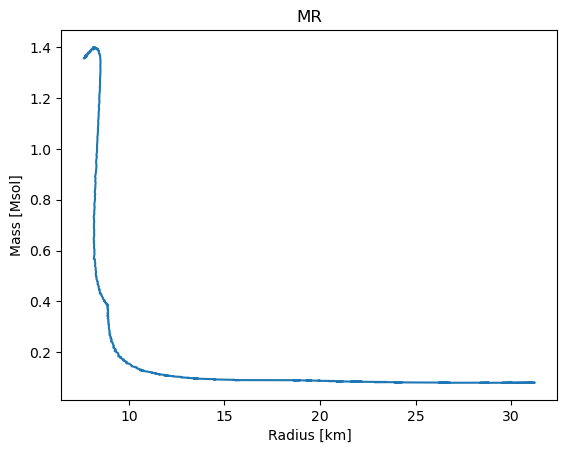

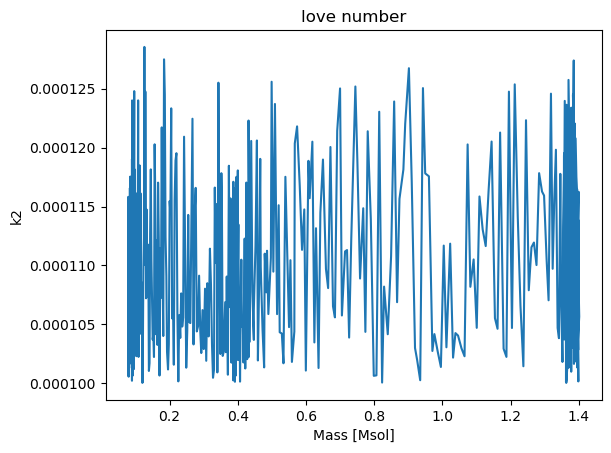

In [49]:
plt.plot((results[1]), results[0])
plt.xlabel("Radius [km]")
plt.ylabel("Mass [Msol]")
plt.title("MR")
plt.show()

plt.plot((results[0]), results[-1])
plt.ylabel(r"k2")
plt.xlabel("Mass [Msol]")
plt.title("love number")
plt.show()

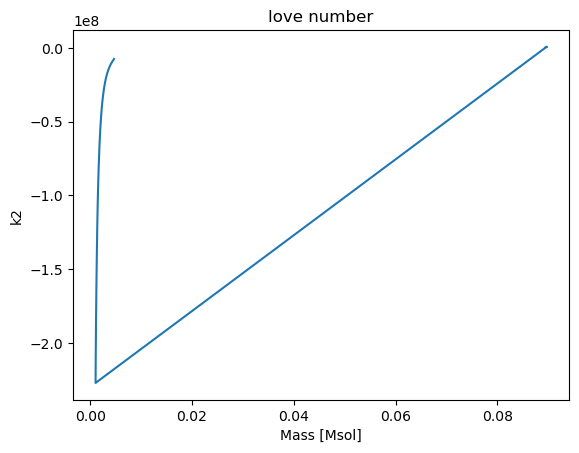

In [299]:
start = 0
stop = 100

plt.plot((results[0][start:stop]), results[-1][start:stop])
plt.ylabel(r"k2")
plt.xlabel("Mass [Msol]")
plt.title("love number")
plt.show()

### singular p_c

In [ ]:
i = 0

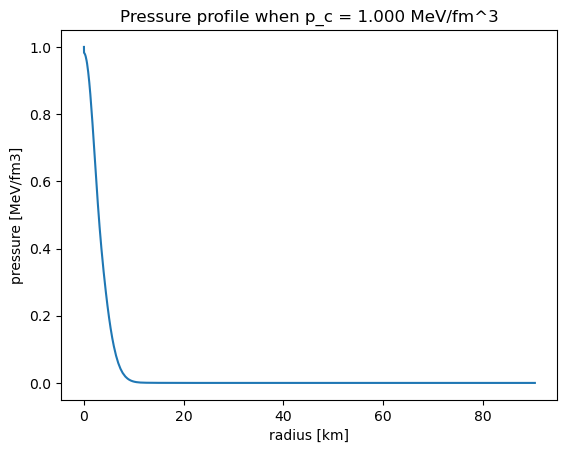

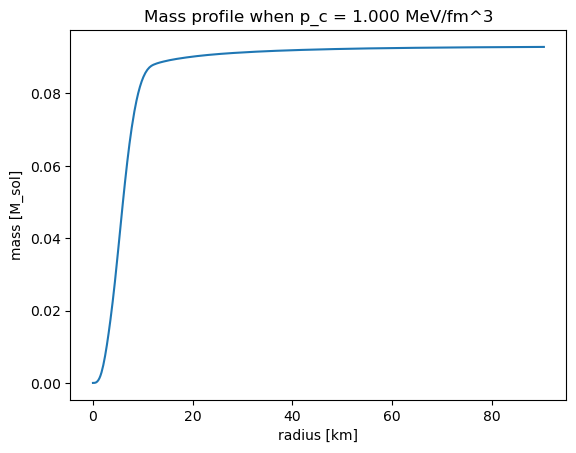

In [148]:

tov = Tov_dimless(e_array, p_array, cs2_array)

initial_pressure = np.geomspace(1,1000,500)
initial_pressure = convert_pressure_dimensionless(initial_pressure)

results = []
def tov_de_wrapper(r, f):
    return tov.tov_de(r, f)



r0 = 1e-6 # initial radius

y_init = 2

f0 = np.array([1e-8, initial_pressure[i]]) #, convert_y_dimensionless(y_init)])  # initial state vector

r_span = (r0, convert_km_dimensionless(10000)) 

solution = solve_ivp(tov_de_wrapper, r_span, f0, method='BDF')

last_positive_index = None

for j in range(len(solution.t)):
    if solution.y[1][j] < convert_pressure_dimensionless(1e-8):
        break
    last_positive_index = j

r_profile = convert_radius_to_km(solution.t[:last_positive_index])
m_profile = convert_mass_msol(solution.y[0][:last_positive_index])
p_profile = convert_pressure_to_mevfm3(solution.y[1][:last_positive_index])
#y_profile = rescale_y(solution.y[2][:last_positive_index])


plt.plot(r_profile, p_profile)
plt.xlabel("radius [km]")
plt.ylabel("pressure [MeV/fm3]")
plt.title(f"Pressure profile when p_c = {convert_pressure_to_mevfm3(initial_pressure[i]):.3f} MeV/fm^3")
plt.show()

plt.plot(r_profile, m_profile)
plt.xlabel("radius [km]")
plt.ylabel("mass [M_sol]")
plt.title(f"Mass profile when p_c = {convert_pressure_to_mevfm3(initial_pressure[i]):.3f} MeV/fm^3")
plt.show()

""" plt.plot(r_profile, y_profile)
plt.ylabel(r"y fx")
plt.xlabel("radius [km]")
plt.title(f"y function when p_c = {convert_pressure_to_mevfm3(initial_pressure[i]):.3f} MeV/fm^3")
"""
plt.show()
 

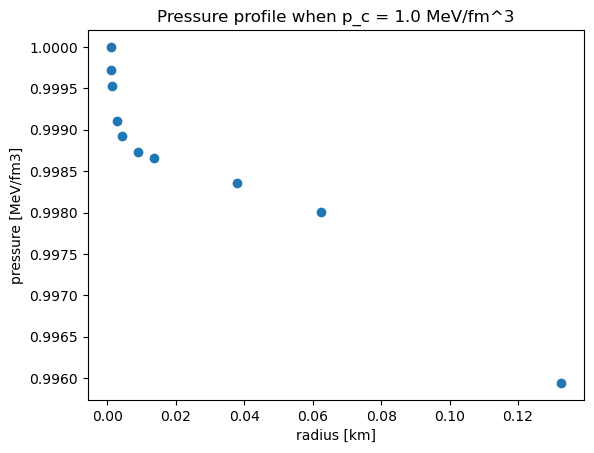

In [ ]:
plt.scatter(r_profile[:10], p_profile[:10])
plt.xlabel("radius [km]")
plt.ylabel("pressure [MeV/fm3]")
plt.title(f"Pressure profile when p_c = {convert_pressure_to_mevfm3(initial_pressure[i])} MeV/fm^3")
plt.show()

In [736]:
print(np.finfo(float).eps)  # float64 epsilon

2.220446049250313e-16


### ap4

In [81]:
ap4 = np.load("/home/sam/thesis/code/results/testing/ap4_eos.npy")
ap4_e = ap4[0][0]
ap4_p = ap4[1][0]
ap4_cs2 = ap4[2][0]



In [84]:
tov = Tov_dimless(ap4_e, ap4_p, ap4_cs2)

initial_pressure = np.geomspace(1,1000,500)
initial_pressure = convert_pressure_dimensionless(initial_pressure)

results = []
def tov_de_wrapper(r, f):
    return tov.tov_de(r, f)



r0 = 1e-6  # initial radius

y_init = 2


for i in range(len(initial_pressure)):
    f0 = np.array([1e-8, initial_pressure[i]])#, convert_y_dimensionless(y_init)])  # initial state vector

    r_span = (r0, convert_km_dimensionless(1000)) 

    solution = solve_ivp(tov_de_wrapper, r_span, f0, method='BDF', rtol=1e-3, atol=1e-6)

    last_positive_index = None

    for j in range(len(solution.t)):
        if solution.y[1][j] < convert_pressure_dimensionless(1e-4):
            break
        last_positive_index = j

    if last_positive_index is not None:
        #r = convert_radius_to_km(np.interp(1e-4, solution.y[1][:last_positive_index] , solution.t[:last_positive_index]))
        r = convert_radius_to_km(solution.t[last_positive_index])

        #m = convert_mass_msol(np.interp(r, solution.t[:last_positive_index], solution.y[0][:last_positive_index]))
        m = convert_mass_msol(solution.y[0][last_positive_index])

        p = convert_pressure_to_mevfm3(solution.y[1][last_positive_index])

        #k2 = compute_k2((rescale_mass(solution.y[0][last_positive_index])/r),rescale_y(solution.y[2][last_positive_index]))
        results.append([m, r, initial_pressure[i], p])#, k2])


    """ masses = solution.y[0]
    pressures = solution.y[1]
    radii = solution.t

    if solution.status == 1:  # An event occurred

        some_small_value = 1e-6
        R = convert_radius_to_km(np.interp(some_small_value, pressures, radii))
        M = convert_mass_msol(np.interp(R, radii, masses))

        results.append([M, R, initial_pressure[i], some_small_value]) """

results = np.array(results).T


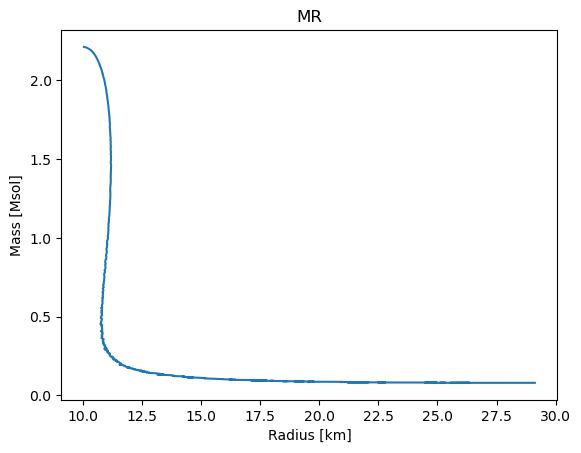

In [85]:
plt.plot((results[1]), results[0])
plt.xlabel("Radius [km]")
plt.ylabel("Mass [Msol]")
plt.title("MR")
plt.show()

# from rust

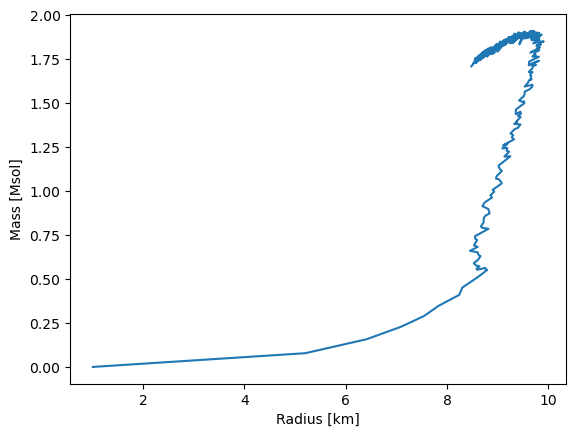

In [412]:
load = np.load("/home/sam/thesis/code/results/tov_res/tov_eos_mr1.npy")

mass = load[0][0]
radius = load[0][1]

plt.plot(radius, mass)
plt.xlabel("Radius [km]")
plt.ylabel("Mass [Msol]")
plt.show()

### single p_c

In [454]:
r = np.array(
    [1e-5, 3.3555749404985956e-5, 7.690583704769708e-5, 0.00011879262864141918, 0.0002242830989646746, 0.000312831652401362, 0.0004969329331661713, 0.0007115158386964631, 0.0011470303090878433, 0.001687685361493709, 0.0027736275874199207, 0.0042662487657233, 0.007171400655425576, 0.011135049409525288, 0.016894303590433823, 0.023792903923519598, 0.03304965414992681, 0.042974165816995216, 0.05721509255496361, 0.06930797375011405, 0.08396884257107752, 0.09919504807995114, 0.12012019699619517, 0.13559864495886004, 0.15123561467194668, 0.17954758537744395, 0.19410332517687345, 0.21936617134220385, 0.2334932672972154, 0.25574132453489057, 0.26949012251111565, 0.2905958501604013, 0.3037679144485091, 0.32382261890204966, 0.33640184655278654, 0.3554759177226897, 0.3674973719781298, 0.38573871954500993, 0.3972398237502408, 0.414754315148374, 0.425778665368691, 0.4426517410794018, 0.4532442816545493, 0.46955055515827887, 0.4797539425386529, 0.4955568631007488, 0.5054103583490979, 0.5207638685811955, 0.5303028820379228, 0.5452530605431598, 0.5545090789606295, 0.5690953424851535, 0.5780961216317677, 0.5923522744399194, 0.6011221528711463, 0.6150772915983603, 0.6236375500965992, 0.6373168235524327, 0.6456860499628065, 0.6591112956467214, 0.6673057314832563, 0.680496006305399, 0.6885298633084778, 0.7015018839882097, 0.7093876260425813, 0.7221561337201267, 0.7299047236407172, 0.7424827854959472, 0.750103898483219, 0.7625031573334378, 0.770005364058212, 0.7822362452048133, 0.7896271679388542, 0.8016990509823586, 0.8089854962366277, 0.8209068582220798, 0.8280949291715258, 0.8398734642700518, 0.8469686559460117, 0.8586113759149374, 0.8656186558028162, 0.8771319746675449, 0.8840558510009228, 0.8954456567561851, 0.902290236469968, 0.9135619520652087, 0.9203309900737525, 0.9314896255251508, 0.9381865667283867, 0.9492367638547758, 0.955864779048345, 0.9668108500494192, 0.9733728667211556, 0.9842188275972423, 0.9907175564279798, 1.0014671560578412, 1.0079051138072501, 1.0185618593553596, 1.0249413886989627, 1.0355085679077447, 1.0418318546956875, 1.05231255552281, 1.0585816438520672, 1.068978771833508, 1.0751955772601236, 1.0855118709192768, 1.091678192082987, 1.1019162366537136, 1.1080337655428338, 1.1181960052284035, 1.1242663362764376, 1.1343550852388962, 1.1403797234130988, 1.1503971756521898, 1.1563775436696786, 1.1663257819268327, 1.1722632267131659, 1.1821442305222487, 1.1880400349982287, 1.197856357628624, 1.2037116303863569, 1.213463510892628, 1.2192795956392937, 1.228969845805357, 1.2347477391727404, 1.2443778191466364, 1.250118570837133, 1.2596899845487288, 1.2653945981307069, 1.2749088648574216, 1.280578289222233, 1.290036836706299, 1.2956719802462406, 1.3050761750327513, 1.3106779069530754, 1.320029061810813, 1.3255982139457256, 1.3348975881160148, 1.3404349574593892, 1.3496837600443816, 1.35519011084193, 1.3643895038290585, 1.3698655694839834, 1.3790166703030393, 1.3844631551610092, 1.3935670391194157, 1.3989846201162384, 1.4080423226704202, 1.4134316508570348, 1.4224441697184405, 1.4278058716764939, 1.436774168774939, 1.4421088479319875, 1.451033851247693, 1.4563420891007866, 1.4652246943753127, 1.4705070516308507, 1.479348123966389, 1.4846051416033377, 1.4934055169601488, 1.498637717222865, 1.507398203821765, 1.5126060911482555, 1.5213274707865834, 1.5265115326772214, 1.5351945619638627, 1.5403552697953788, 1.5490006813114074, 1.5541384911002845, 1.562746994490382, 1.5678623476096036, 1.576434630610729, 1.581527954463128, 1.5900646838715802, 1.595136392523449, 1.6036382151089212, 1.6086887098862654, 1.6171562532527028, 1.622185923303229, 1.6306197967040983, 1.635629019526944, 1.6440298146326353, 1.6490189565786932, 1.6573872482058194, 1.662356664949943, 1.6706930117494905, 1.6756430487370468, 1.68394799384657, 1.6888789867158995, 1.6971530583788854, 1.7020653333610485, 1.7103090455128287, 1.715202919810505, 1.7234167726355067, 1.7282925547820427, 1.7364770352422738, 1.7413350254423874, 1.7494906077808374, 1.7543310982338836, 1.7624582444519086, 1.7672815196590586, 1.7753806799707998, 1.780187017027039, 1.788258630293692, 1.7930482991652505, 1.8010927933054983, 1.8058660570942655, 1.8138838494796612, 1.8186409646744597, 1.8266324625025738, 1.8313736792189255, 1.839339279871768, 1.844064842080227, 1.8520049334652628, 1.8567150792092768, 1.8646300400857492, 1.8693250016894716, 1.8772152019801187, 1.8818952062468106, 1.889761007335187, 1.8944262757368155, 1.90226803075322, 1.9069187796114484, 1.914736833704528, 1.9193732743639773, 1.927167964961334, 1.9317903039553173, 1.9395619610159034, 1.944170400224615, 1.9519193464749753, 1.956514083277638, 1.9642406344436938, 1.9688218618636868, 1.976526326890326, 1.9810942337345245, 1.9887769149967673, 1.9933316859890906, 2.0009928794949823, 2.0055346954044384, 2.0131746909892265, 2.0177037287528345, 2.0253228102663585, 2.0298392431070478, 2.0374376885925454, 2.0419416861324846, 2.0495197680005353, 2.0540114963697937, 2.0615694815643106, 2.0660491035053115, 2.0735872536613655, 2.078054928629644, 2.0855735002291014, 2.090029384489708, 2.097528629008276, 2.101972875728802, 2.1094530397784994, 2.1138857991185334, 2.121347124584777, 2.125768543782041, 2.1332112679565913, 2.137621491409752, 2.145045847117031, 2.1494450164656826, 2.1568512321862636, 2.161239486387868, 2.1686277863765255, 2.173005261780626, 2.180375866181795, 2.184742696601396, 2.19209582155709, 2.196452138337961, 2.2037879960967586, 2.2081339281837042, 2.215452727201372, 2.2197884012027154, 2.2270903462442617, 2.2314158864935503, 2.2387011787261737, 2.243016707342388, 2.2502855444291963, 2.2545911813745323, 2.2618437575654626, 2.2661396207010385, 2.2733761269172494, 2.277662332057394, 2.284882955977712, 2.289159616941878, 2.296364543080574, 2.3006317717442006, 2.307821181532921, 2.3120790878759143, 2.3192531597367836, 2.3235018518910424, 2.3306607613121595, 2.334900345607108, 2.342044265212086, 2.3462748462191234, 2.353403945837234, 2.357625626412469, 2.364740073145775, 2.3689529544714416, 2.376052912757079, 2.380257094382076, 2.3873427260581352, 2.391538305936607, 2.398609770301133, 2.4027968448304104, 2.4098542987011, 2.4140329627582306, 2.4210765605284372, 2.4252469075057994, 2.4322768012018803, 2.436438923041407, 2.4434552623755397, 2.4476092496021655, 2.4546121820247566, 2.458758123778804, 2.465747794528313, 2.4698857785970363, 2.4768623307514526, 2.480992443599296, 2.4879560181216704, 2.492078344920098, 2.4990290807068685, 2.5031437053629446, 2.510081739287595, 2.514188744472057, 2.521114211430044, 2.525213678604325, 2.532126711555475, 2.53621872099805, 2.543119451007338, 2.5472040818394657, 2.5540926381181066, 2.5581699683286017, 2.565046478273746, 2.569116584743109, 2.575981173974206, 2.5800441324983567, 2.5868969248959153, 2.5909528102089205, 2.597793927949819, 2.60184281374618, 2.608672377338019, 2.6127143362944856, 2.6195324646120466, 2.623567568408371, 2.6303743787251803, 2.634402698064792, 2.6411983060845525, 2.645219910714701, 2.652004430605978, 2.656019389336751, 2.6627929337600262, 2.6668013144837013, 2.67356399462482, 2.677565864333886, 2.6843177899304975, 2.6883132147358864, 2.695054494106941, 2.699043539255421, 2.705774279328536, 2.7097570092197696, 2.7164773155591653, 2.7204537937621827, 2.7271637705937812, 2.7311340598633054, 2.7378338101010002, 2.7417979723931487, 2.7484875976639085, 2.752445694151535, 2.7591252948190395, 2.7630773859068407, 2.7697470610961448, 2.7736932064351776, 2.780353054056125, 2.784293312558012, 2.7909434293263713, 2.794877859177401, 2.80151834063914, 2.8054469993135975, 2.812077939864486, 2.816000884138075, 2.8226223770457812, 2.826539663008501, 2.8331518004338174, 2.8370634835024218, 2.8436663565166387, 2.8475724914473184, 2.8541661900551283, 2.858066830955137, 2.8646514441123996, 2.8685466444519325, 2.8751222600834097, 2.8790120727071713, 2.8855787777261708, 2.889463254864444, 2.8960211351908343, 2.8999003284703675, 2.9064494690460347, 2.9103234295009623, 2.9168639143095767, 2.9207326923915633, 2.927264604472894, 2.931128250061568, 2.9376516715289425, 2.9415102339417865, 2.9480252459981773, 2.9518787740002144, 2.958385456953451, 2.962233998766807, 2.968732432044983, 2.972576035358172, 2.9790662975238917, 2.9829050095010197, 2.9893871782659507, 2.9932210455556367, 2.9996951977969646, 3.00352426654078, 3.0099904783120595, 3.0138147941533413, 3.0202731406999477, 3.0240927487920115, 3.0305433045639987, 3.034358249578309, 3.040801088242921, 3.0446114143771514, 3.051046608833824, 3.054852359819374, 3.061279982208614, 3.0650812013186908, 3.0715013230378942, 3.07529805309458, 3.081710744807935, 3.085503028189733, 3.091908359839906, 3.0956962384889235, 3.102094279310087, 3.105877794738884, 3.1122686132666924, 3.1160478065652804, 3.12243147064761, 3.1262063824902184, 3.1325829592996883, 3.1363536299511976, 3.1427231859945213, 3.1464896553169748, 3.1528522564440795, 3.1566145639032235, 3.1629702753209332, 3.166728459991991, 3.173077346270144, 3.1768314468442966, 3.1831735719281515, 3.1869236267182286, 3.1932590539367474, 3.1970051008831564, 3.203333892959197, 3.207075969635568, 3.2133981886936613, 3.2171363323126236, 3.2234520398906343, 3.2271862873089403, 3.2334955443626154, 3.2372259320870773, 3.243528799004183, 3.247255363196312, 3.253551899800022, 3.2572746762817433, 3.2635649418432577, 3.267283966101522, 3.2735680193437515, 3.277283326536016, 3.2835612256461837, 3.287272850604806, 3.293544653238542, 3.2972526304759375, 3.3035183937682415, 3.3072227574812487, 3.3134825380514497, 3.3171833221261786, 3.3234371760862493, 3.327134414102575, 3.333382397064769, 3.337076122300698, 3.343318289385436, 3.347008534821332, 3.3532449406615283, 3.3569317389847373, 3.363162437735409, 3.3668458213441563, 3.3730708666881695, 3.376750867695732, 3.3829703128507544, 3.3866469630895075, 3.39286086081365, 3.396534191839089, 3.402742594438217, 3.406412637532815, 3.4126155968668432, 3.4162823830438325, 3.4224799505321073, 3.4261435105392946, 3.4323357371675174, 3.435996101490925, 3.4421830378173404, 3.4458402366847447, 3.452021932843818, 3.455675996228601, 3.4618525019400224, 3.4655034595642835, 3.4716748241363606, 3.4753227054745723, 3.4814889778103693, 3.4851338120926925, 3.4912950406952996, 3.494936856910937, 3.501093089889292, 3.5047319167896847, 3.5108832018641642, 3.5145190679661176, 3.5206654524714374, 3.524298386060535, 3.5304399169547582, 3.534069946088058, 3.5402066699539754, 3.543834419602839, 3.549960233882956, 3.553585947723898, 3.5597152828573684, 3.563337200735623, 3.569460154802757, 3.5730792152885966, 3.5791971711000006, 3.5828134179370252, 3.5889270127705175, 3.59254043426313, 3.5986494799137354, 3.6022601422145666, 3.6083646917206793, 3.611972639797008, 3.6180727623471123, 3.6216780323454176, 3.627773770229091, 3.6313763971141855, 3.6374677952616463, 3.6410678113269612, 3.647154914982913, 3.650752350432962, 3.656835203372304, 3.660430087001727, 3.6665087323295085, 3.6701010918205665, 3.676175572103447, 3.6797654342668586, 3.6858357915498776, 3.689423182514182, 3.69548945838787, 3.699074403734553, 3.7051366393830465, 3.708719164245725, 3.714777400477295, 3.718357529615545, 3.724411806887801, 3.727989564741729, 3.7340399231809145, 3.7376153339116343, 3.743661813326376, 3.74723490084644, 3.7532775407417978, 3.756848328737649, 3.7628871683230347, 3.7664556802723244, 3.7724907584701985, 3.776057017654816, 3.782088373106529, 3.7856524026227762, 3.7916800736954315, 3.79524189646182, 3.8012659212516664, 3.804825560015394, 3.8108459763535514, 3.8144034536954696, 3.820420299150756, 3.8239756374897307, 3.8299889493752666, 3.8335421709713993, 3.839551986343707, 3.8431031133019227, 3.8491094689685306, 3.852658523240855, 3.8586614557602217, 3.862208459148571, 3.868208004836173, 3.8717529789942398, 3.8777491739230747, 3.881292140358695, 3.8872850203623894, 3.8908260004395205, 3.896815601116965, 3.9003546160573035, 3.9063409727744935, 3.9098780436593725, 3.9158611915513832, 3.9193963393235873, 3.925376313297978, 3.9289095587633343, 3.934886393503174, 3.938417757332112, 3.944391487296937, 3.9479209900262893, 3.953891649457331, 3.957419311491581, 3.963386934411007, 3.9669127760241696, 3.9728773962405297, 3.9764014375773487, 3.9823630886862293, 3.985885349763788, 3.9918440651499414, 3.995364565859193, 4.001320378701239, 4.004839138808141, 4.01079208207713, 4.014309121224483, 4.020259227690767, 4.023774565399106, 4.029721867630419, 4.033235523299746, 4.039180053665401, 4.042692046576425, 4.048633837249873, 4.052144186565229, 4.058083269524662, 4.061591994290409, 4.067528401322377, 4.07103552046912, 4.076969283170655, 4.080474815514758, 4.086405965293272, 4.089909929538432, 4.095838497617768, 4.099340912355726, 4.1052669297733155, 4.1087678134856365, 4.114691311098014, 4.11819068215693, 4.124111690640238, 4.12760956730997, 4.133528117163358, 4.137024517601093, 4.142940639146235, 4.1464355814035425, 4.152349304788905, 4.1558428068126245, 4.16175416201328, 4.1652462416468765, 4.171155258467139, 4.174645933451701, 4.180552641527752, 4.1840419295030085, 4.189946358304407, 4.193434276809795, 4.199336455640152, 4.2028230221159895, 4.208722980115288, 4.212208211903815, 4.218105978050436, 4.221589892396783, 4.227485495509182, 4.23096810956237, 4.2368615782991865, 4.240342909113338, 4.246234271978942, 4.249714336513818, 4.2556036218552915, 4.25908243697774, 4.2649696729897775, 4.268447255474429, 4.274332470198613, 4.277808836729014, 4.283692058057294, 4.287167225226695, 4.293048480901591, 4.2965224652139815, 4.30240178283178, 4.305874600702609, 4.3117520077124505, 4.31522367546979, 4.321099199176, 4.324569733061468, 4.330443400628314, 4.333912816797412, 4.3397846552439585, 4.34325296976777, 4.349123005975313, 4.352590234840728, 4.358458495551161, 4.3619246546619985, 4.36779116647987, 4.371256271657658, 4.377121061052359, 4.380585128037088, 4.386448221343388, 4.389911265794394, 4.395772689213175, 4.399234726710003, 4.40509450631025, 4.408555552353443, 4.414413714074306, 4.417873784086069, 4.423730353737229, 4.427189463062302, 4.433044466325448, 4.436502630231814, 4.44235609266148, 4.445813326341274, 4.451665273368092, 4.455121591938027, 4.460972048865077, 4.464427467367775, 4.470276459379296, 4.473730992783187, 4.479578544939012, 4.4830322081397505, 4.488878345378955, 4.492331153199949, 4.498175900342389, 4.501627867535448, 4.507471249284574, 4.510922390530352, 4.516764431469669, 4.520214761378896, 4.526055485977509, 4.529505019091231, 4.535344451703365, 4.538793202493756, 4.544631367359077, 4.548079350230192, 4.55391627147625, 4.557363500764527, 4.563199202406504, 4.566645692381553, 4.572480198324156, 4.575925963189368, 4.581759297229827, 4.585204351122675, 4.591036536946709, 4.5944808939400135, 4.6003119551270535, 4.603755629229168, 4.609585589252701, 4.613028594408133, 4.618857476636057, 4.622299826726155, 4.628127654421572, 4.63156936326516, 4.637396159588614, 4.640837240942422, 4.646663028949562, 4.650103496509195, 4.655928299157124, 4.659368166557082, 4.665192006701232, 4.668631287515813, 4.674454187911133, 4.6778928956550665, 4.683714878957979, 4.687153027086875, 4.692974115857197, 4.696411717767936, 4.70223193446746, 4.705669003499008, 4.711488370493964, 4.714924919927719, 4.720743459488964, 4.724179502549427, 4.729997236854665, 4.733432786709742, 4.739249737841278, 4.742684807603215, 4.7485009975523305, 4.751935600277806, 4.757751050943601, 4.761185199634443, 4.766999932826014, 4.770433640429548, 4.776247677864241, 4.779680957274137, 4.785494320582511, 4.788927184638743, 4.7947398953616345, 4.798172356851392, 4.80398443644146, 4.807416508099589, 4.8132279779235505, 4.816659672432857, 4.822470553771764, 4.825901883763551, 4.831712197812937, 4.835143175867457, 4.8409529437377286, 4.844380996535182, 4.850182253642254, 4.853612054047314, 4.859422132874154, 4.862851165195685, 4.8686596377309455, 4.872088657459288, 4.877896296054255, 4.881325290661128, 4.887132840470768, 4.890561702532505, 4.896368942113574, 4.899797668190297, 4.905604595039087, 4.909033178917047, 4.914839830298502, 4.9182682658672965, 4.9240746536054445, 4.92750294124441, 4.93330908101284, 4.936737224245332, 4.942543134348817, 4.945971138777936, 4.951776837497371, 4.95520471042408, 4.961010216445621, 4.96443796638012, 4.970243298738286, 4.973670935053783, 4.979476112963066, 4.982903645658239, 4.988708688455239, 4.9921361279752965, 4.997941055067758, 5.001368412173754, 5.007173243005509, 5.010600528678449, 5.016405282697284, 5.01983250806878, 5.0256372047115345, 5.029064381012213, 5.034869039685715, 5.03829617820839, 5.044100818282033, 5.047527930354185, 5.053332571152803, 5.056759668116644, 5.062564328912486, 5.065991422110809, 5.071796122121674, 5.075223222887205, 5.081027981276368, 5.084455100923814, 5.0902599367909325, 5.093687086612357, 5.099492019001989, 5.1029192102618826, 5.108724258154836, 5.112151502088087, 5.1179566844038495, 5.121383992213599, 5.127189327812221, 5.130616710668293, 5.136422218347853, 5.1398496873860475, 5.145655385883383, 5.149082952204943, 5.154888860196236, 5.158316534867427, 5.1641226709696975, 5.167550465021533, 5.173356847790071, 5.176784772218576, 5.182591420150053, 5.186019485916081, 5.191826417448152, 5.195254635477528, 5.201061868989421, 5.204490250173129, 5.210297803984009, 5.213726359178624, 5.21953425155325, 5.222962991580601, 5.228771240723199, 5.232200176371276, 5.238008800431265, 5.241437942454018, 5.247246959524622, 5.250676318642302, 5.256485746760568, 5.259915333660085, 5.265725190806549, 5.269155016141879, 5.274965320243648, 5.278395394635794, 5.284206163565215, 5.28763649760262, 5.293447749177918, 5.296878353416812, 5.302690105403664, 5.306120990368131, 5.311933260477554, 5.31536443666009, 5.321177242551698, 5.324608720413261, 5.330422079693747, 5.333853869664154, 5.339667799889885, 5.343099912367852, 5.348914431042344, 5.3523468763960755, 5.358162000972982, 5.361594789540189, 5.367410537423156, 5.370843679511308, 5.376660068052992, 5.380093573939776, 5.385910620443079, 5.389344500376584, 5.395162222097167, 5.398596486295872, 5.404414900438776, 5.407849559092178, 5.413668682816311, 5.417103746084769, 5.422923596498583, 5.426359074514099, 5.4321796686800665, 5.435615571546046, 5.4414369264790485, 5.44487326427082, 5.450695396940555, 5.454132179705276, 5.459955107032854, 5.463392344790271, 5.4692160836531984, 5.472653786395324, 5.478478353623896, 5.48191653131567, 5.48774194369543, 5.4911806062747806, 5.497006880547798, 5.500446037925713, 5.506273190788234, 5.509712852849292, 5.515540900954391, 5.518981077556793, 5.524810037513343, 5.5282507384892074, 5.534080626864044, 5.537521862019471, 5.543352695334069, 5.5467944744497855, 5.552626269187386, 5.556068602018156, 5.561901374615403, 5.5653442708912175, 5.571178037745414, 5.574621507171021, 5.5804562846368535, 5.58390033689228, 5.5897361412852025, 5.593180786025672, 5.5990176336189466, 5.602462880475425, 5.608300787502069, 5.611746646081291, 5.617585628734187, 5.621032108618928, 5.62687218305108, 5.630319293800334, 5.636160476126716, 5.6396082272757395, 5.64545053357044, 5.648898934631282, 5.654742380931477, 5.658191441392784, 5.664036043695956, 5.667485773023512, 5.673331547289081, 5.676781954925867, 5.6826289170769, 5.686080012443136, 5.691928178364245, 5.695379970857782, 5.70122935639554, 5.704681855392138, 5.710532476356512, 5.713985691209922, 5.719837563378199, 5.723291503419791, 5.7291446425271095, 5.732599317067226, 5.738453738817532, 5.7419091571445735, 5.747764877205431, 5.751221048586484, 5.757078082587034, 5.760535016268432, 5.76639337980759, 5.769851085014193, 5.778754051907525, 5.780898920586262, 5.784368479084924, 5.787047289838519, 5.790033295962658, 5.793599676484345, 5.796997329057464, 5.801393376228782, 5.80489695350004, 5.808528927793166, 5.813606922422301, 5.817230318466881, 5.820840004190919, 5.828714693271281, 5.831444042381525, 5.83551357769884, 5.838709483513015, 5.842163853377263, 5.846427095686217, 5.8501331566201324, 5.854167379431586, 5.858677052300241, 5.863109017863601, 5.869403957441478, 5.873420699688105, 5.877229923290556, 5.8826397313286884, 5.886595792803276, 5.890544117889202, 5.900004538003448, 5.902058787275407, 5.9054455521556495, 5.908039420786535, 5.910943285333403, 5.914416181695938, 5.9177487169490925, 5.92220054761896, 5.925604154013798, 5.929099493971039, 5.934392102362629, 5.937872162224277, 5.941323310054305, 5.948110242491699, 5.951438447234097, 5.95723420765149, 5.960657328467999, 5.9665022045656375, 5.969949676284035, 5.9758749801203, 5.9793295101389665, 5.985239514119929, 5.988706072629212, 5.994618576207379, 5.99809373650792, 6.004012343352491, 6.007493627879838, 6.013415299491393, 6.016901524606722, 6.0228260958323565, 6.026316259949476, 6.032243651488353, 6.035737000017346, 6.041666964489984, 6.045162965457006, 6.051095362387695, 6.054593627213708, 6.0605283652918756, 6.064028610801295, 6.0699656215729405, 6.073467643274144, 6.079406880783929, 6.082910531359709, 6.0888519661765494, 6.092357140095698, 6.098300754460162, 6.101807376816654, 6.10775316163989, 6.111261179935855, 6.1172091325093945, 6.120718510643066, 6.126668632918031, 6.130179346787767, 6.136131644123741, 6.1396436784095565, 6.145598158662014, 6.149111504468902, 6.155068177313254, 6.158582830446658, 6.164541706886053, 6.168057666589208, 6.17401875859584, 6.177536026625086, 6.18349934687103, 6.187017926819689, 6.19298348849045, 6.196503385292588, 6.202471201934417, 6.205992421503533, 6.211962506930443, 6.215485055892842, 6.22145742410618, 6.224981309606992, 6.230955974737274, 6.234481204298703, 6.240458180571352, 6.243984761987801, 6.249964063686556, 6.253492004949193, 6.259473646401067, 6.263002955641426, 6.268986951193957, 6.272517636643865, 6.278504000660529, 6.282036070621561, 6.288024817467254, 6.291558280289595, 6.297549424330836, 6.3010842883966305, 6.307077843990843, 6.310614117703275, 6.316610099198634, 6.3201477909731425, 6.326146212708202, 6.32968533096607, 6.335686207264522, 6.339226760428709, 6.345230105599074, 6.348772102091009, 6.354777930428977, 6.358321378665726, 6.364329704448785, 6.367874612841946, 6.373885450334277, 6.377431827288171, 6.383445190735407, 6.386993044646746, 6.393008948279499, 6.396558287536475, 6.401592604124357, 6.405386856150294, 6.409264374732832, 6.41531108605886, 6.419083432329819, 6.422755337533436, 6.428697285531714, 6.432436333695008, 6.436112903466415, 6.442551349585337, 6.446138790640856, 6.452127482123606, 6.455739562577063, 6.461785338739838, 6.465386651541695, 6.471457807721087, 6.475049429785652, 6.481110387022338, 6.484698496923992, 6.490761084326308, 6.494346667323225, 6.500412180716929, 6.5039962814194245, 6.510063963827626, 6.513647588749851, 6.519717903706655, 6.523301712368386, 6.529374926857206, 6.532959401457015, 6.539035640862181, 6.5426211445646985, 6.548700526545244, 6.552287326179276, 6.558369941953929, 6.561958234839499, 6.568044152681755, 6.5716340858077364, 6.577723359945183, 6.5813150432319825, 6.587407717393715, 6.591001233621442, 6.597097343701449, 6.6006927558006545, 6.606792332028632, 6.610389688395389, 6.616492756861781, 6.62009209525187, 6.626198679018174, 6.629800029398499, 6.635910149306836, 6.639513535942924, 6.645627211215073, 6.649232654198122, 6.655349902865391, 6.658957419230953, 6.6650782584536366, 6.6686878629998665, 6.674812309301728, 6.678424015188108, 6.684552084622846, 6.688165903808976, 6.6942976120856565, 6.6979135556521925, 6.704048918229979, 6.707666996612957, 6.71380602875994, 6.717426251923682, 6.7235689687755595, 6.727191346337411, 6.733337762925385, 6.736962304248611, 6.743112435527287, 6.7467391497884455, 6.7528930106586325, 6.756521906896595, 6.762679512216389, 6.766310599368664, 6.772471963961627, 6.776105250891262, 6.782270389560385, 6.785905885074641, 6.792074812601891, 6.795712525467019, 6.801885256619066, 6.805753430822915, 6.8114415007626965, 6.815365726742771, 6.8192538509306315, 6.826574108645141, 6.830228462213546, 6.836316162935547, 6.840040381826992, 6.846203752186678, 6.849916846946776, 6.856164607552407, 6.859857606651262, 6.866080407598283, 6.869768000183604, 6.875991912692, 6.879675682938466, 6.885905943649065, 6.889587292978244, 6.895821428181869, 6.89950213414962, 6.905740913301272, 6.909422097095972, 6.915666070402431, 6.919348530962157, 6.925597878063361, 6.92928222479731, 6.935537130799934, 6.939223810174748, 6.945484423573071, 6.949173763939094, 6.9554401916941035, 6.959132436813729, 6.965404762711662, 6.969100093942241, 6.975378384760904, 6.979076937753927, 6.985361247333074, 6.989063124364011, 6.99535349726455, 6.999058776190934, 7.00535525023377, 7.009063991053347, 7.015366599126705, 7.018907325576373, 7.024756619854497, 7.028497305070726, 7.032230644280522, 7.04173975676917, 7.0440496642010455, 7.047795522736145, 7.05067942132353, 7.053893847809421, 7.05774236866152, 7.0614017076412114, 7.066116886865349, 7.069909358679845, 7.073863287500855, 7.079222991560838, 7.083201784701482, 7.087199670029812, 7.09542601284341, 7.099001256968527, 7.104677049826, 7.108530940029741, 7.112421257761016, 7.119792935764276, 7.123503031177084, 7.129934722283548, 7.132088522316196, 7.138373566006371, 7.141011046926895, 7.146450108133803, 7.149336960006517, 7.152178517340141, 7.1567474151819255, 7.160333618587683, 7.1623315767439495, 7.164201259562204, 7.167251772811709, 7.169638354813116, 7.171612631614638, 7.1743927645527625, 7.176208571793368, 7.178704352967053, 7.181194046827365, 7.187377951361639, 7.189982947549768, 7.192759399313449, 7.196938991885677, 7.200165311915321, 7.20375739267288, 7.208106654690968, 7.212225410054444, 7.217547742739189, 7.221987103791273, 7.226725759232193, 7.232541743900948, 7.237513751005784, 7.242808849596654, 7.2491474025502916, 7.254622565164459, 7.260370542743345, 7.267448752191002, 7.271492344179974, 7.2800889721376, 7.284257987866742, 7.292035337120745, 7.296385490444808, 7.304247123183186, 7.3086901883804085, 7.316634727928387, 7.321141879507691, 7.3290930961214436, 7.333654688876271, 7.341629900528508, 7.346233375534219, 7.354235064469349, 7.358871573798084, 7.366896354447189, 7.371560038514388, 7.379607167272954, 7.3842936717528325, 7.392362579113589, 7.396918133025686, 7.40289088227041, 7.407965873982749, 7.4134885816182, 7.419775224730064, 7.425769381597959, 7.433057156511252, 7.43902520351222, 7.444995984017388, 7.462296628107687, 7.464217791425116, 7.467854275729469, 7.4705809687046445, 7.473786534761437, 7.477523984040869, 7.4814939131869265, 7.486443758561115, 7.490719130575721, 7.495495452012926, 7.5007291354846455, 7.506358247609313, 7.5124913392491965, 7.518755631549373, 7.5270942514897685, 7.532798385301099, 7.538226764812267, 7.5458529350865495, 7.552013963038718, 7.558050977584206, 7.567154519214714, 7.572683628616176, 7.5814249313743955, 7.586776904297078, 7.595247467236245, 7.600646328233768, 7.605923691221427, 7.614622877118739, 7.619776262661576, 7.628210832620123, 7.63332899665479, 7.6417931143635744, 7.64686922411885, 7.655343459924855, 7.6603899724751665, 7.668860163707241, 7.673888818352976, 7.682364886731991, 7.68738227934866, 7.695866848352343, 7.70087804528159, 7.70937209515966, 7.714380943960225, 7.722885732411206, 7.727895007894932, 7.736411386422396, 7.741423122256652, 7.749951665444249, 7.754946808740893, 7.763424685036603, 7.768441049951077, 7.777007151912774, 7.782025761726245, 7.790596784054455, 7.79562423692229, 7.804205953804772, 7.8092426134561475, 7.817841321671566, 7.82288660679883, 7.831500508108392, 7.836554581826238, 7.845183558908124, 7.850246498331777, 7.858890795695647, 7.863962621519434, 7.872622253539817, 7.8777030002651465, 7.886377996733241, 7.891467696592319, 7.9001581035203134, 7.905256784814876, 7.913962642570449, 7.919070332329916, 7.927791680468496, 7.932908404657929, 7.941645282995927, 7.946722058760885, 7.952658787764484, 7.95873347599989, 7.967283151695001, 7.972990152745783, 7.978508326314964, 7.986907254512795, 7.992507759108397, 7.998032995330504, 8.007881518756776, 8.01316297748409, 8.021950074198987, 8.027280714296714, 8.036159241574483, 8.041469206782287, 8.050430483812944, 8.055718280675173, 8.06466790634438, 8.069950025772659, 8.078912746475309, 8.084193078665567, 8.09317434835125, 8.098455987454434, 8.107454021077135, 8.113183073368967, 8.118671946120246, 8.126835747575889, 8.132530671052592, 8.138220381461089, 8.154206806436374, 8.156848230867089, 8.161488229886025, 8.165006009876242, 8.169037746630739, 8.173786088388702, 8.17859382536411, 8.186488625267875, 8.191133126297704, 8.195776079637815, 8.212645467609475, 8.214978983318773, 8.219273675337165, 8.222515920011357, 8.226297791991534, 8.230706601867686, 8.235336800633323, 8.241300952846466, 8.246161041695245, 8.251822460936404, 8.257553423492626, 8.266712850088147, 8.272054647461191, 8.27726652673198, 8.286099577859595, 8.291519146583202, 8.296912405444628, 8.308822371338128, 8.313129002256279, 8.31961075528658, 8.324652006428346, 8.330100382493047, 8.336880531720583, 8.34274182806487, 8.34913013525833, 8.354625528113338, 8.36105407555637, 8.367525349215773, 8.378920022119798, 8.384609242641742, 8.394552969967492, 8.400266124795566, 8.409829777158935, 8.415581305371878, 8.425356753810563, 8.43109137406886, 8.44089760828341, 8.44663380281717, 8.456456857265776, 8.46220308284282, 8.472064751524323, 8.478086119010621, 8.48395527460952, 8.493634557536033, 8.49964054093937, 8.505572238687783, 8.516603511770494, 8.522384378471761, 8.532280731867557, 8.53816426073966, 8.548208159248224, 8.554106417153447, 8.564273392848357, 8.570179282054363, 8.580358418784833, 8.586284714819737, 8.59650263330492, 8.602637093401896, 8.616657513133156, 8.62095959404643, 8.627612739059709, 8.632772360195643, 8.638420836107072, 8.64531339115414, 8.651538321166374, 8.658692638346402, 8.66573565870304, 8.676307525119592, 8.682819601329065, 8.689107931942084, 8.698904007790619, 8.705403409010586, 8.711868065730773, 8.720321426984224, 8.727277019585351, 8.734589737919935, 8.743924890087328, 8.751263481393043, 8.758628509041193, 8.773975876329803, 8.778772065917815, 8.786050533988355, 8.791727253129775, 8.797905332737907, 8.805482207365547, 8.812209584951312, 8.819745105764639, 8.826010190129583, 8.833137615511005, 8.840801921103592, 8.849422896522887, 8.857673936386849, 8.86776120962358, 8.875900859790045, 8.884005532241048, 8.900071675010206, 8.9053029897581, 8.913158629327345, 8.918821792393269, 8.92516383226035, 8.932280472878961, 8.939663799255984, 8.949075642773487, 8.956344531138576, 8.963676045505144, 8.97709220170484, 8.983908878399976, 8.996287133908723, 9.002622814248253, 9.013202891598471, 9.020103427093852, 9.027128559499388, 9.039270218907266, 9.045951046913776, 9.051928702939415, 9.06020751254187, 9.06718647643505, 9.07504457497108, 9.083640338236489, 9.089850005892853]
)

In [455]:
p = np.array(
    [0.00013234, 0.00013146147607821955, 0.00013131641695977828, 0.0001312536278854179, 0.00013122736957968804, 0.0001312080782068802, 0.00013119971489516748, 0.0001311927523999793, 0.0001311888014032404, 0.00013118572600955328, 0.00013118396611009302, 0.0001311826444297242, 0.00013118185152692153, 0.00013118119828347998, 0.00013118060063450524, 0.00013117974038026365, 0.0001311784441808483, 0.00013117619974989796, 0.00013117300769082205, 0.00013116725242505296, 0.00013116081980341435, 0.00013115167657645505, 0.00013114038838759598, 0.00013112245543098, 0.00013110628180719992, 0.0001310880968153192, 0.00013107026569195108, 0.00013105095531751548, 0.0001310306014338878, 0.0001310090051387917, 0.00013098609816552208, 0.00013096208571697246, 0.0001309371705674054, 0.00013091136519700186, 0.00013088484098095892, 0.00013085763477649624, 0.00013082980848546215, 0.00013080146978867928, 0.00013077259486070288, 0.00013074334888215505, 0.00013071361647923595, 0.00013068363041655976, 0.0001306531810909079, 0.00013062257491869463, 0.0001305915113954579, 0.00013056037136696823, 0.0001305287677028259, 0.00013049715485153332, 0.000130465063970382, 0.00013043302094875987, 0.00013040048055280913, 0.00013036803699262628, 0.00013033507396802878, 0.00013030225040629257, 0.00013026888406790198, 0.0001302356947997768, 0.00013020193924491314, 0.0001301683943704065, 0.0001301342601578377, 0.00013010036702274959, 0.0001300658623533012, 0.0001300316265472948, 0.0001299967580818034, 0.00012996218411752316, 0.00012992695753420252, 0.000129892049299484, 0.0001298564696665239, 0.00012982123071750306, 0.00012978530273638134, 0.00012974973648073292, 0.00012971346464032678, 0.00012967757444590816, 0.00012964096311604139, 0.00012960475236992319, 0.00012956780585457323, 0.0001295312779899263, 0.0001294940005542036, 0.00012945715905709045, 0.0001294195549377079, 0.00012938240334195572, 0.00012934447674778124, 0.00012930701862338265, 0.0001292687737304638, 0.00012923101266904205, 0.00012919245361296062, 0.00012915439321252404, 0.0001291155240798806, 0.00012907716793019559, 0.00012903799275031005, 0.00012899934441962862, 0.00012895986715706495, 0.00012892093018055433, 0.00012888115472876546, 0.00012884193259874019, 0.00012880186277493377, 0.00012876235893284445, 0.00012872199847404971, 0.00012868221630409825, 0.0001286415688643453, 0.00012860151168855378, 0.00012856058083704415, 0.00012852025191159203, 0.00012847904113172674, 0.00012843844364437314, 0.00012839695633350373, 0.00012835609340192152, 0.00012831433287169923, 0.0001282732075425661, 0.00012823117701977663, 0.00012818979226848643, 0.00012814749489626856, 0.00012810585362714151, 0.00012806329246650645, 0.0001280213975133998, 0.0001279785755449776, 0.0001279364296722105, 0.0001278933497981616, 0.0001278509557016803, 0.000127807620573415, 0.0001277649808442179, 0.0001277213941471964, 0.00012767851220812695, 0.00012763467542779676, 0.00012759155234827403, 0.00012754746866723782, 0.00012750410762146558, 0.00012745977951865816, 0.00012741618284872158, 0.000127371612763624, 0.00012732778273084232, 0.00012728297308952396, 0.00012723891197024404, 0.0001271938651244673, 0.00012714957512616792, 0.00012710429336676448, 0.00012705977663986058, 0.0001270142622016227, 0.0001269695208462695, 0.00012692377590815322, 0.00012687881197378457, 0.00012683283866080167, 0.0001267876541476354, 0.00012674145453272148, 0.00012669605139343043, 0.0001266496274991, 0.00012660400764022807, 0.00012655736144020417, 0.00012651152672357087, 0.00012646466014436475, 0.00012641861238844014, 0.00012637152731086897, 0.00012632526829209922, 0.00012627796655274837, 0.0001262314980068379, 0.0001261839813994682, 0.0001261373050226186, 0.0001260895752995203, 0.00012604269274962626, 0.00012599475162292022, 0.00012594766452072299, 0.00012589951366361217, 0.00012585222359381203, 0.0001258038646417838, 0.00012575637315411197, 0.00012570780770609447, 0.00012566011631634646, 0.00012561134593581922, 0.0001255634561268501, 0.00012551448234291178, 0.00012546639556559525, 0.00012541721987398993, 0.00012536893754814152, 0.00012531956141224627, 0.00012527108492751477, 0.00012522150977928748, 0.00012517284049601087, 0.00012512306773690377, 0.00012507420698693638, 0.00012502423798877284, 0.00012497518707628062, 0.00012492502318210122, 0.0001248757833843306, 0.00012482542590920432, 0.00012477599847721962, 0.00012472544870902746, 0.0001246758348684255, 0.00012462509406861358, 0.00012457529502021096, 0.00012452436442451575, 0.00012447438134501122, 0.00012442326216415936, 0.00012437309620677467, 0.000124321789627156, 0.00012427144192225225, 0.00012421994910656966, 0.00012416942076224347, 0.0001241177428501383, 0.00012406703495279622, 0.0001240151730614532, 0.00012396428667636795, 0.00012391224190109706, 0.00012386117807294342, 0.0001238089514877417, 0.00012375771124111353, 0.00012370530389920918, 0.00012365388823912197, 0.0001236013011734962, 0.00012354971108586823, 0.00012349694530976367, 0.00012344518176188633, 0.0001233922382692943, 0.00012334030221028273, 0.00012328718197641644, 0.00012323507433764755, 0.0001231817783193985, 0.00012312950001493373, 0.00012307602915131348, 0.00012302358107830862, 0.0001229699362908759, 0.00012291731932997758, 0.00012286350152325112, 0.00012281071653897995, 0.00012275672660083924, 0.0001227037744419627, 0.00012264961324403407, 0.00012259649474392548, 0.0001225421631419562, 0.0001224888791189423, 0.0001224343779531659, 0.00012238092921086865, 0.00012232625930635343, 0.00012227264663401314, 0.00012221780880100437, 0.0001221640329738001, 0.0001221090280080501, 0.00012205508978740707, 0.00012199991847049486, 0.00012194581860438324, 0.00012189048170402507, 0.00012183622092725014, 0.00012178071919759985, 0.0001217262982320827, 0.00012167063241402408, 0.00012161605196907518, 0.00012156022279050429, 0.0001215054835630875, 0.00012144949173918897, 0.00012139459441418051, 0.00012133844064769463, 0.00012128338589813404, 0.00012122707087961389, 0.0001211718593669436, 0.00012111538377500851, 0.00012106001614931262, 0.00012100338065089197, 0.00012094785755112484, 0.00012089106280169568, 0.00012083538485590483, 0.00012077843149972239, 0.00012072259932526504, 0.00012066548799558826, 0.0001206095021993436, 0.00012055223351865228, 0.00012049609469722529, 0.0001204386692774326, 0.00012038237801735391, 0.00012032479646001256, 0.0001202683533379324, 0.00012021061623443688, 0.0001201540218173161, 0.00012009612974909509, 0.00012003938459438518, 0.00011998133813309459, 0.00011992444278892067, 0.00011986624249662656, 0.00011980919750195871, 0.00011975084393132041, 0.00011969364981614774, 0.00011963514351059025, 0.00011957780079608223, 0.00011951914228996802, 0.00011946165148863657, 0.0001194028413074335, 0.0001193452029232927, 0.00011928624158373409, 0.00011922845611244975, 0.00011916934412269538, 0.0001191114120517385, 0.0001190521499115248, 0.00011899407172031229, 0.00011893465992110669, 0.00011887643608114823, 0.00011881687510629245, 0.00011875850608132531, 0.00011869879640618061, 0.00011864028265230747, 0.00011858042474439195, 0.00011852176671021016, 0.00011846176102933603, 0.00011840295915606788, 0.00011834280615447474, 0.00011828386087609437, 0.0001182235609985755, 0.00011816447274192669, 0.00011810402642595898, 0.00011804479561088006, 0.00011798420328674562, 0.00011792483032618363, 0.00011786409241709077, 0.00011780457771721651, 0.0001177436946394157, 0.00011768403859973325, 0.00011762301076263438, 0.00011756321377609258, 0.00011750204158237584, 0.00011744210403547372, 0.00011738078788119935, 0.00011732071015408999, 0.00011725925042880402, 0.00011719903289539434, 0.00011713742998223593, 0.00011707707301028954, 0.00011701532728609046, 0.00011695483123732149, 0.00011689294307270857, 0.00011683230830287917, 0.00011677027806236966, 0.00011670950492138053, 0.00011664733296347933, 0.00011658642179546204, 0.00011652410847275486, 0.00011646305961616076, 0.00011640060527540435, 0.00011633941906308946, 0.00011627682404530204, 0.0001162155008046138, 0.00011615276544516325, 0.00011609130549802476, 0.00011602843012671226, 0.00011596683378970059, 0.00011590381873084585, 0.00011584208631527397, 0.00011577893188779653, 0.00011571706369979092, 0.00011565377021728937, 0.00011559176655786375, 0.00011552833432869682, 0.00011546619549383184, 0.00011540262482119378, 0.00011534035110190755, 0.00011527664228390171, 0.00011521423396631861, 0.00011515038729603523, 0.00011508784466146251, 0.00011502386042704606, 0.00011496118375203587, 0.00011489706223676065, 0.00011483425179318371, 0.0001147699932755195, 0.00011470704933062667, 0.000114642654084308, 0.00011457957690079629, 0.00011451504519488846, 0.00011445183503096407, 0.00011438716712992942, 0.00011432382423937186, 0.00011425902040313257, 0.00011419554503535326, 0.00011413060551935444, 0.00011406699791945744, 0.0001140019229747287, 0.00011393818338356982, 0.00011387297325678446, 0.00011380910191102683, 0.00011374375684456174, 0.00011367975397673369, 0.00011361427420872811, 0.00011355014004727934, 0.00011348452581168895, 0.00011342026058104155, 0.00011335451210769753, 0.00011329011602830308, 0.000113224233542964, 0.00011315970683135276, 0.00011309369055575926, 0.00011302903342459204, 0.00011296288357652089, 0.00011289809623464191, 0.00011283181302795317, 0.0001127668956804331, 0.00011270047932512537, 0.00011263543217331632, 0.00011256888287557535, 0.00011250370611715602, 0.00011243702407940138, 0.00011237171790842188, 0.0001123049033293568, 0.00011223946793628656, 0.00011217252101094578, 0.00011210695658271929, 0.00011203987750251171, 0.00011197418422256867, 0.00011190697317532683, 0.00011184115122366054, 0.00011177380839368184, 0.0001117078579468777, 0.00011164038351496918, 0.00011157430474624793, 0.00011150669888977036, 0.00011144049196903012, 0.00011137275486193922, 0.00011130641995579526, 0.00011123855176868338, 0.0001111720890405082, 0.00011110408994064431, 0.00011103749955060498, 0.00011096936970197413, 0.0001109026518070702, 0.00011083439137041641, 0.00011076754612452233, 0.0001106991552573831, 0.00011063218281128004, 0.00011056366166802651, 0.00011049656216944081, 0.00011042791090131418, 0.0001103606844949528, 0.00011029190325010048, 0.00011022455007768466, 0.00011015563900119947, 0.00011008815920150443, 0.00011001911843545509, 0.00010995151214433613, 0.00010988234182780666, 0.00010981460917823988, 0.00010974530944736147, 0.00010967745056947259, 0.00010960802155745707, 0.00010954003657855346, 0.00010947047841572843, 0.00010940236746033387, 0.00010933268027417364, 0.0001092644434640573, 0.00010919462737921433, 0.0001091262648334208, 0.00010905631997176025, 0.00010898783180664265, 0.00010891775828727137, 0.00010884914461652015, 0.00010877894255581476, 0.00010871020349048291, 0.00010863987300212597, 0.0001085710086506656, 0.00010850054984566917, 0.00010843156031395233, 0.00010836097330069072, 0.00010829185869204207, 0.00010822114357627877, 0.0001081519039915011, 0.00010808106087641869, 0.00010801169641382131, 0.00010794072540004589, 0.00010787123615546793, 0.00010780013734110155, 0.00010773052340794496, 0.00010765929688858549, 0.00010758955835783043, 0.00010751820422660623, 0.00010744834118684845, 0.00010737685953443733, 0.00010730687207190298, 0.00010723526298656365, 0.0001071651511851426, 0.00010709341475273339, 0.00010702317869399394, 0.00010695131499800488, 0.00010688095476122685, 0.00010680896388279747, 0.00010673847954498866, 0.0001066663615629386, 0.00010659575319886429, 0.0001065235081897121, 0.00010645277587191323, 0.00010638040390990146, 0.00010630954770871766, 0.00010623704886583596, 0.00010616606884942894, 0.00010609344319543886, 0.0001060223394298168, 0.0001059495870322692, 0.00010587835958130126, 0.00010580548050556255, 0.00010573412943100591, 0.00010566112374027915, 0.00010558964910179869, 0.00010551651685714446, 0.00010544491871233325, 0.00010537165997269015, 0.00010529993837708861, 0.00010522655319929479, 0.00010515470820641135, 0.00010508119664522558, 0.00010500922830655722, 0.00010493559041467743, 0.00010486349877972792, 0.00010478973460781322, 0.00010471751972411309, 0.00010464362932080289, 0.00010457129123392997, 0.00010449727464586054, 0.0001044248133994527, 0.000104350670671281, 0.00010427808630706208, 0.00010420381748148157, 0.00010413111003927497, 0.0001040567151570348, 0.00010398388467478244, 0.00010390936377470504, 0.00010383641028848415, 0.00010376176340748474, 0.00010368868695152628, 0.00010361391412463089, 0.00010354071473133819, 0.00010346581599169747, 0.00010339249369165756, 0.00010331746907057058, 0.00010324402389257878, 0.00010316882458920025, 0.00010309524443079337, 0.00010301994207500046, 0.00010294622291131148, 0.00010287081186001476, 0.00010279699030265212, 0.00010272145521264275, 0.00010264751276588919, 0.0001025718540736218, 0.00010249779042472821, 0.0001024220084554331, 0.00010234782443640868, 0.00010227191841040079, 0.00010219761324436345, 0.00010212158281785987, 0.00010204715615077609, 0.00010197100111596717, 0.00010189645276684291, 0.00010182017294639211, 0.00010174550275047592, 0.00010166909802020758, 0.00010159430586046984, 0.00010151777613402983, 0.0001014428619298126, 0.00010136620714564666, 0.00010129117083904844, 0.00010121439095402723, 0.00010113923250407823, 0.0001010623274882671, 0.00010098704686619587, 0.00010091001669886378, 0.00010083461388436587, 0.00010075745855113269, 0.00010068193352972136, 0.00010060465302046691, 0.00010052900578153935, 0.00010045160008886178, 0.00010037583062426989, 0.00010029829974235887, 0.00010022240804536471, 0.00010014475196917808, 0.00010006873803369142, 9.999095675835026e-5, 9.991482057836686e-5, 9.983691409872077e-5, 9.976065566792143e-5, 9.968262397822717e-5, 9.960624328967914e-5, 9.952808638337044e-5, 9.945158342931528e-5, 9.937330129883504e-5, 9.929667607053344e-5, 9.921826870721796e-5, 9.914152119484239e-5, 9.906298858883262e-5, 9.898611878138588e-5, 9.890746092157227e-5, 9.883046880683649e-5, 9.875168568081607e-5, 9.867457124531307e-5, 9.859566283936891e-5, 9.851842606834381e-5, 9.84393923674204e-5, 9.836203324481603e-5, 9.828287423251822e-5, 9.820539274097696e-5, 9.812610839956023e-5, 9.804850452041355e-5, 9.796909483078944e-5, 9.789136854406646e-5, 9.781183348580296e-5, 9.773398477022749e-5, 9.765432432155207e-5, 9.75763531545474e-5, 9.749656729235803e-5, 9.741847365005889e-5, 9.733856234993125e-5, 9.7260346207189e-5, 9.718030944338189e-5, 9.710197077377062e-5, 9.702180851923658e-5, 9.694334729506365e-5, 9.68630595214597e-5, 9.678447571377623e-5, 9.67040623914695e-5, 9.662535597007489e-5, 9.654481706815793e-5, 9.646598800161606e-5, 9.63853234879099e-5, 9.63063717435506e-5, 9.622558158462034e-5, 9.614650712855546e-5, 9.606559128971658e-5, 9.598639408684631e-5, 9.590535253217396e-5, 9.582603254619431e-5, 9.574486523853715e-5, 9.566542243195583e-5, 9.558412933293854e-5, 9.550456366707421e-5, 9.542314473711556e-5, 9.53434561721182e-5, 9.526191137043273e-5, 9.518209986528418e-5, 9.510042914989536e-5, 9.502049466242068e-5, 9.493869799016991e-5, 9.485864047704857e-5, 9.477671780360214e-5, 9.469653722037232e-5, 9.461448850023263e-5, 9.453418480130368e-5, 9.44520099878187e-5, 9.4371583126481e-5, 9.428928217184911e-5, 9.420873210027506e-5, 9.412630495556118e-5, 9.404563162482567e-5, 9.396307823996023e-5, 9.388228160003587e-5, 9.379960192383018e-5, 9.371868192360383e-5, 9.363587590375596e-5, 9.355483249103354e-5, 9.347190007413956e-5, 9.339073319565852e-5, 9.330767432721621e-5, 9.322638392864732e-5, 9.314319855306875e-5, 9.306178457902975e-5, 9.297847263964513e-5, 9.2896935033703e-5, 9.281349647277068e-5, 9.273183517745179e-5, 9.264826993616767e-5, 9.256648489296714e-5, 9.24827929114718e-5, 9.240088406086123e-5, 9.231706527824614e-5, 9.223503255967849e-5, 9.21510869139946e-5, 9.206893026591167e-5, 9.198485769417658e-5, 9.190257705401777e-5, 9.181837749222467e-5, 9.173597279643482e-5, 9.165164617955545e-5, 9.156911736358697e-5, 9.148466362558815e-5, 9.140201062391909e-5, 9.131742969776063e-5, 9.123465244389043e-5, 9.114994426153788e-5, 9.106704268800081e-5, 9.098220718042843e-5, 9.089918121879629e-5, 9.081421831599811e-5, 9.073106789689057e-5, 9.064597752788462e-5, 9.056270258097348e-5, 9.047748467381281e-5, 9.039408512783348e-5, 9.030873960960726e-5, 9.022521539235911e-5, 9.013974218920088e-5, 9.005609322755311e-5, 8.997049226465475e-5, 8.9886718484566e-5, 8.980098968617198e-5, 8.971709101267687e-5, 8.963123430210033e-5, 8.954721065933106e-5, 8.946122595895648e-5, 8.93770772701426e-5, 8.929096450143292e-5, 8.920669068890902e-5, 8.912044977241399e-5, 8.903605075762759e-5, 8.894968161298785e-5, 8.886515731650403e-5, 8.877865986245704e-5, 8.869401020396319e-5, 8.860738435835013e-5, 8.852260925666196e-5, 8.84358549364351e-5, 8.835095430950579e-5, 8.826407143073324e-5, 8.817904519565693e-5, 8.809203367352962e-5, 8.800688174654877e-5, 8.7919741495385e-5, 8.783446379189242e-5, 8.774719472514708e-5, 8.766179115969978e-5, 8.757439318996179e-5, 8.748886367627182e-5, 8.740133671528418e-5, 8.731568116624506e-5, 8.722802512489828e-5, 8.714224345257337e-5, 8.705445824091378e-5, 8.696855035654624e-5, 8.688063588378391e-5, 8.679460169780362e-5, 8.670655787232164e-5, 8.662039729435712e-5, 8.653222402370703e-5, 8.644593696257704e-5, 8.635763415349373e-5, 8.627122051722373e-5, 8.618278807562702e-5, 8.60962477714509e-5, 8.60076856024502e-5, 8.592101853681331e-5, 8.583232654471538e-5, 8.57455326232835e-5, 8.565671071159421e-5, 8.556978983925522e-5, 8.548083791068776e-5, 8.539378999155745e-5, 8.53047079480414e-5, 8.52175328854771e-5, 8.512832062815337e-5, 8.504101832474258e-5, 8.49516757539749e-5, 8.486424611155122e-5, 8.477477312693302e-5, 8.468721604658093e-5, 8.459761254693695e-5, 8.450992792899455e-5, 8.442019381238726e-5, 8.433238155645012e-5, 8.424251672018552e-5, 8.41545767251156e-5, 8.40645810657415e-5, 8.397651322966195e-5, 8.388638664298472e-5, 8.379819086329892e-5, 8.370793324437947e-5, 8.361960941776719e-5, 8.352922066092757e-5, 8.344076868334776e-5, 8.335024868217508e-5, 8.326166844887327e-5, 8.317101709622929e-5, 8.308230850174627e-5, 8.29915256897663e-5, 8.290268862793572e-5, 8.281177424803594e-5, 8.272280861199363e-5, 8.263176255487588e-5, 8.254266823706087e-5, 8.245149039271804e-5, 8.236226728488271e-5, 8.227095754259821e-5, 8.218160553580193e-5, 8.209016378415975e-5, 8.200068276878412e-5, 8.190910889567117e-5, 8.181949876141896e-5, 8.172779265403178e-5, 8.163805328993532e-5, 8.15462148347781e-5, 8.145634612919426e-5, 8.136437521209278e-5, 8.12743770527213e-5, 8.118227355881927e-5, 8.109214583269561e-5, 8.099990964646006e-5, 8.09096522399607e-5, 8.081728324518934e-5, 8.072689604404041e-5, 8.063439412386473e-5, 8.054387701314436e-5, 8.045124205003345e-5, 8.03605949141762e-5, 8.026788314996963e-5, 8.017717590891713e-5, 8.008429799851662e-5, 7.999340797492613e-5, 7.990040672046463e-5, 7.980940093302428e-5, 7.971625971603585e-5, 7.962511832647984e-5, 7.953183923810301e-5, 7.944056275615825e-5, 7.934714835496302e-5, 7.92557398466499e-5, 7.91621904962405e-5, 7.907065026289952e-5, 7.897696643563742e-5, 7.888529485384834e-5, 7.879147694655492e-5, 7.869967439258453e-5, 7.860572262992553e-5, 7.851378930745089e-5, 7.84197038268622e-5, 7.832763985548969e-5, 7.823342073186767e-5, 7.814122617509989e-5, 7.804687343351644e-5, 7.79545483085441e-5, 7.786006193806721e-5, 7.7767606228568e-5, 7.767298619187934e-5, 7.758039985710234e-5, 7.748564609726986e-5, 7.73929290782696e-5, 7.729804152383875e-5, 7.720519374818559e-5, 7.711017231689717e-5, 7.701719370212628e-5, 7.692203830365467e-5, 7.682892875980472e-5, 7.673363929774942e-5, 7.66403987292041e-5, 7.654497510257313e-5, 7.645160340943772e-5, 7.635604551371483e-5, 7.626254259280322e-5, 7.616685032074821e-5, 7.607321606632561e-5, 7.597738930855877e-5, 7.588362361288418e-5, 7.57876622583091e-5, 7.56937650120241e-5, 7.559766894814491e-5, 7.550364004057056e-5, 7.540740915373359e-5, 7.531324847309586e-5, 7.521688264864317e-5, 7.512259008220859e-5, 7.50260892046261e-5, 7.493166463884753e-5, 7.483502859184257e-5, 7.47404719124257e-5, 7.464370057900145e-5, 7.454901167097538e-5, 7.445210493348933e-5, 7.435728368126154e-5, 7.426024142145968e-5, 7.416528770884758e-5, 7.406810980789422e-5, 7.397302351815196e-5, 7.387570985665384e-5, 7.37804908724963e-5, 7.368304133052396e-5, 7.358768953414645e-5, 7.349010399124082e-5, 7.339461926432407e-5, 7.329689759951419e-5, 7.320127982324157e-5, 7.310342191505227e-5, 7.300767097011813e-5, 7.29096766965781e-5, 7.281379246319445e-5, 7.271566170183713e-5, 7.261964405973373e-5, 7.252137668761691e-5, 7.242522551606272e-5, 7.232682140975803e-5, 7.223053658754753e-5, 7.2131995623156e-5, 7.203557702862684e-5, 7.193689908178279e-5, 7.184034659281776e-5, 7.174153153868781e-5, 7.164484503271662e-5, 7.154589274600429e-5, 7.144907210000348e-5, 7.134998245495787e-5, 7.125302754546355e-5, 7.11538004158804e-5, 7.105671111898786e-5, 7.09573463782133e-5, 7.086012256957859e-5, 7.076062009051532e-5, 7.066326164536465e-5, 7.056362130046861e-5, 7.046612809359357e-5, 7.036634975488565e-5, 7.026872166065293e-5, 7.016880519971642e-5, 7.007104209206746e-5, 6.997098738005812e-5, 6.987308913251903e-5, 6.977289604016047e-5, 6.967486252583585e-5, 6.957453092342891e-5, 6.947636201501228e-5, 6.93758917724381e-5, 6.927758734221529e-5, 6.917697832893465e-5, 6.90785382487813e-5, 6.897779033383917e-5, 6.887921447522593e-5, 6.877832752726135e-5, 6.867961576126473e-5, 6.857858964850492e-5, 6.847974184579961e-5, 6.837857643607182e-5, 6.827959246694553e-5, 6.81782876276701e-5, 6.807916736201122e-5, 6.797772296021358e-5, 6.787846626752828e-5, 6.777688216983802e-5, 6.767748891924542e-5, 6.757576499190484e-5, 6.747623505214961e-5, 6.737437116100691e-5, 6.727470440044739e-5, 6.717270041097171e-5, 6.707289669759901e-5, 6.69707524748736e-5, 6.687081167630234e-5, 6.676852708503166e-5, 6.666844906850782e-5, 6.656602397302532e-5, 6.646580860543402e-5, 6.636324286969629e-5, 6.626289001755581e-5, 6.616018350515309e-5, 6.605969303462353e-5, 6.595684560877737e-5, 6.585621738566152e-5, 6.575322890923441e-5, 6.565246279898537e-5, 6.554933313447284e-5, 6.544842900218438e-5, 6.534515801173628e-5, 6.524411572216952e-5, 6.514070326757164e-5, 6.503952268512933e-5, 6.493596862782102e-5, 6.483464961657055e-5, 6.473095381764126e-5, 6.46294962413084e-5, 6.45256585615077e-5, 6.44240622834881e-5, 6.432008258322008e-5, 6.421834746657224e-5, 6.411422560590229e-5, 6.401235151335558e-5, 6.390808735201338e-5, 6.380607414596903e-5, 6.370166754335022e-5, 6.359951508588467e-5, 6.349496590105825e-5, 6.339267405393098e-5, 6.328798214563544e-5, 6.318555077028155e-5, 6.308071599693508e-5, 6.297814495448012e-5, 6.28731671741762e-5, 6.27704563254284e-5, 6.266533539594211e-5, 6.256248460139935e-5, 6.245722038019405e-5, 6.235422950005108e-5, 6.224882184427465e-5, 6.214569073841983e-5, 6.204013950490843e-5, 6.19368680329237e-5, 6.183117307820533e-5, 6.172776109937219e-5, 6.162192227968089e-5, 6.15183696529999e-5, 6.141238682425392e-5, 6.130869340841221e-5, 6.120256642624258e-5, 6.10987320796496e-5, 6.099246079939022e-5, 6.0888485380166985e-5, 6.078206965684918e-5, 6.06779530228194e-5, 6.057139271119712e-5, 6.046713474340013e-5, 6.039614025379556e-5, 6.033148277913824e-5, 6.0226855492557155e-5, 6.0145997894343615e-5, 6.0055810018969326e-5, 5.994802295296963e-5, 5.9845243946070626e-5, 5.971217051039464e-5, 5.960598761940636e-5, 5.949581820361096e-5, 5.934168215158777e-5, 5.923154316683871e-5, 5.9121719699901026e-5, 5.9030664670357337e-5, 5.8947598947625685e-5, 5.8823686861476505e-5, 5.8726270691502735e-5, 5.862089629863072e-5, 5.8490755465775404e-5, 5.837750032236375e-5, 5.8254111181209857e-5, 5.8116057759239005e-5, 5.798023716004145e-5, 5.778717382100533e-5, 5.7663761802399625e-5, 5.754660372090301e-5, 5.738010708268583e-5, 5.7258175647221214e-5, 5.7136364955239176e-5, 5.706701891362414e-5, 5.700366470099314e-5, 5.689918514449206e-5, 5.6819095733720247e-5, 5.672938273910951e-5, 5.662202739518444e-5, 5.651892702749324e-5, 5.6381114819980734e-5, 5.627562928082725e-5, 5.6167213983381964e-5, 5.600296606161535e-5, 5.589481125244286e-5, 5.5787463718030954e-5, 5.568133460774261e-5, 5.557774989336231e-5, 5.546876316895321e-5, 5.536213225628691e-5, 5.525241309162544e-5, 5.514492784965182e-5, 5.503479905643205e-5, 5.4926999089513305e-5, 5.4816370303762756e-5, 5.4708098940999117e-5, 5.4597089892283144e-5, 5.448845304838952e-5, 5.437713837552183e-5, 5.426821291166781e-5, 5.415663351080977e-5, 5.404745603916281e-5, 5.393564593124909e-5, 5.382624754853982e-5, 5.3714231904821e-5, 5.360463611771403e-5, 5.349243291070127e-5, 5.338265634818317e-5, 5.3270278780038154e-5, 5.316033364572854e-5, 5.304779138127478e-5, 5.29376866230626e-5, 5.2824986703190115e-5, 5.2714728835323396e-5, 5.260187639060412e-5, 5.2491470157445375e-5, 5.237846891961095e-5, 5.2267917770770086e-5, 5.215477044571226e-5, 5.204407688089016e-5, 5.193078542313612e-5, 5.181995124627528e-5, 5.170651705993013e-5, 5.159554356533788e-5, 5.1481967651202185e-5, 5.1370855759765836e-5, 5.125713882314916e-5, 5.114588918215745e-5, 5.103203171188614e-5, 5.092064476819089e-5, 5.080664709448267e-5, 5.0695123148085535e-5, 5.058098548496715e-5, 5.0469324728291986e-5, 5.035504720468623e-5, 5.0243249751367685e-5, 5.0128832433854796e-5, 5.001689833980835e-5, 4.9902341249337427e-5, 4.9790270528240234e-5, 4.9675573652326604e-5, 4.9563366286899574e-5, 4.9448529588617946e-5, 4.933618553896202e-5, 4.9221208963503905e-5, 4.9108728173171315e-5, 4.899361165265033e-5, 4.888099405308676e-5, 4.87657375100855e-5, 4.8652983023922e-5, 4.8537586374057186e-5, 4.842469491748102e-5, 4.830915807131925e-5, 4.819612955585047e-5, 4.8080452420278365e-5, 4.796728675403433e-5, 4.78514692332971e-5, 4.773816632195966e-5, 4.762220831839156e-5, 4.750876806587799e-5, 4.73926694804692e-5, 4.72790917894637e-5, 4.716285252224518e-5, 4.704913729454881e-5, 4.6932757244895455e-5, 4.681890438170995e-5, 4.670238344856478e-5, 4.658839285070162e-5, 4.6471730932727216e-5, 4.6357602500745526e-5, 4.6240799496440905e-5, 4.612653313075526e-5, 4.6009588938555163e-5, 4.5895184539531856e-5, 4.577809905785668e-5, 4.566355652585499e-5, 4.554632965317448e-5, 4.543164888861053e-5, 4.5314280523466076e-5, 4.5199461426829626e-5, 4.508195146787057e-5, 4.496699405881621e-5, 4.480387385534286e-5, 4.4680800364994135e-5, 4.4554938653805663e-5, 4.435860902028065e-5, 4.4235950639884844e-5, 4.4116469348093426e-5, 4.3923077835292505e-5, 4.380121548718437e-5, 4.368130304931477e-5, 4.356121302845068e-5, 4.344415257007331e-5, 4.332348331994701e-5, 4.320555180224668e-5, 4.308525501928422e-5, 4.296761006582804e-5, 4.28475531312462e-5, 4.27301620598581e-5, 4.261017365638979e-5, 4.2492835429336223e-5, 4.2372879976149186e-5, 4.225556325337005e-5, 4.213560105207794e-5, 4.201827245516013e-5, 4.1898269547551804e-5, 4.1780896783351595e-5, 4.166083055696563e-5, 4.154339259979385e-5, 4.142324643234318e-5, 4.1305727999713835e-5, 4.11854895499528e-5, 4.106787921034196e-5, 4.0947539503700604e-5, 4.082982894831548e-5, 4.070938143694677e-5, 4.0591564611260474e-5, 4.04710045142664e-5, 4.0353076996804194e-5, 4.0232400833832675e-5, 4.01143594067172e-5, 3.9993564649852416e-5, 3.9875406977057185e-5, 3.975449179569915e-5, 3.963621618663201e-5, 3.9515179261179445e-5, 3.939678449825121e-5, 3.927562488351742e-5, 3.915711009574118e-5, 3.903582712091254e-5, 3.8917191691302914e-5, 3.8795784886668995e-5, 3.867702838441677e-5, 3.8555497427732955e-5, 3.843661955856645e-5, 3.831496423575542e-5, 3.819596480555945e-5, 3.807418498194923e-5, 3.795506387014353e-5, 3.7833159469410315e-5, 3.771391660946273e-5, 3.759188759819735e-5, 3.747252296333724e-5, 3.735036933975704e-5, 3.723088293252311e-5, 3.710860471821734e-5, 3.6988996562824964e-5, 3.6866593796678436e-5, 3.674686393338632e-5, 3.662433666717896e-5, 3.65044851482266e-5, 3.638183344337066e-5, 3.626186032995249e-5, 3.6139084255123936e-5, 3.6018989615196565e-5, 3.589608924461035e-5, 3.5775873151298635e-5, 3.5652848563431046e-5, 3.553251109384854e-5, 3.540936237050349e-5, 3.528890360488028e-5, 3.5165630830529584e-5, 3.5045050851609735e-5, 3.4921654112880675e-5, 3.480095300544631e-5, 3.467744744596147e-5, 3.454908786511603e-5, 3.436037030131334e-5, 3.423007399773116e-5, 3.4100935105005726e-5, 3.397597689322343e-5, 3.385466373797257e-5, 3.372798716341944e-5, 3.360438140434814e-5, 3.347837537482268e-5, 3.3355166908474395e-5, 3.322981097847024e-5, 3.310730199543419e-5, 3.298218527900522e-5, 3.285988918142172e-5, 3.27349600243793e-5, 3.2612825447535816e-5, 3.2488024050030154e-5, 3.2366005812638905e-5, 3.224127167102102e-5, 3.211931198667154e-5, 3.19946065839804e-5, 3.187266939635761e-5, 3.1747964955109814e-5, 3.1626024872785375e-5, 3.150130069295011e-5, 3.137933858712545e-5, 3.125457979599424e-5, 3.113258192445328e-5, 3.1007777843490034e-5, 3.088573436859402e-5, 3.076087734758521e-5, 3.063878122746697e-5, 3.051386584721344e-5, 3.0391712102605362e-5, 3.026673457639315e-5, 3.014451973881612e-5, 3.0019477472826686e-5, 2.989719917724e-5, 2.9772090450665277e-5, 2.964974713959359e-5, 2.952457087045524e-5, 2.9402161577440955e-5, 2.928160121105426e-5, 2.9164918626805616e-5, 2.897245884312732e-5, 2.8849432099253043e-5, 2.872673168220606e-5, 2.86436613878871e-5, 2.8567957156516636e-5, 2.8445314710189173e-5, 2.835093850474943e-5, 2.824581857857942e-5, 2.812007705436072e-5, 2.8000605633020042e-5, 2.7846841745911336e-5, 2.7723250573392563e-5, 2.7594506288988388e-5, 2.742023113789623e-5, 2.7290943240803624e-5, 2.7161143504972513e-5, 2.705062241079088e-5, 2.6935162299664107e-5, 2.6752706674553677e-5, 2.6629275815290368e-5, 2.650509454791023e-5, 2.6384268445065405e-5, 2.626675085343456e-5, 2.6198522162355264e-5, 2.6130849909854655e-5, 2.6049959351708545e-5, 2.596835709249814e-5, 2.58913244451363e-5, 2.5803815357882428e-5, 2.5757541279636744e-5, 2.571108467973187e-5, 2.565209034384961e-5, 2.5596285615563844e-5, 2.5558742913206303e-5, 2.5518392843490263e-5, 2.545706446070563e-5, 2.540729432123664e-5, 2.537216721923784e-5, 2.5327448306536e-5, 2.526652016666351e-5, 2.5206341991672658e-5, 2.5155688629122643e-5, 2.5093891121063308e-5, 2.5028357276379327e-5, 2.493032293872983e-5, 2.485510545078627e-5, 2.4771851268650006e-5, 2.4671749573558864e-5, 2.4577631947693385e-5, 2.445673957126495e-5, 2.435627502432618e-5, 2.4249437354044867e-5, 2.4118905051076697e-5, 2.4007775636012113e-5, 2.3889922061949255e-5, 2.3749548527002143e-5, 2.3628849760216265e-5, 2.350272040987833e-5, 2.3413608299809007e-5, 2.332549050787177e-5, 2.3233215455899147e-5, 2.3142842615657034e-5, 2.3047065472457525e-5, 2.2953250276669586e-5, 2.285590278223136e-5, 2.276058388524258e-5, 2.266224260020116e-5, 2.2566060243933347e-5, 2.24670053215142e-5, 2.2370180181511185e-5, 2.2270715176753144e-5, 2.2173525890425587e-5, 2.2073858393609797e-5, 2.1976500927979863e-5, 2.1876772645345197e-5, 2.1779377063337377e-5, 2.167969281957727e-5, 2.158235560178696e-5, 2.1494803991259112e-5, 2.1400678401068362e-5, 2.1277546512746577e-5, 2.1173094794218582e-5, 2.1059642313140626e-5, 2.093078225852142e-5, 2.0808164998425477e-5, 2.0659472306616675e-5, 2.05379399699941e-5, 2.04165945994821e-5, 2.037403597926098e-5, 2.0335203727080525e-5, 2.0261803357869317e-5, 2.0206814786354925e-5, 2.014224085758624e-5, 2.0067053268376675e-5, 1.9987299693394948e-5, 1.9888038472021884e-5, 1.9802423900203667e-5, 1.9706936921914737e-5, 1.960250003018727e-5, 1.9490394860430663e-5, 1.9368517260372733e-5, 1.924430359421822e-5, 1.9079468187812133e-5, 1.8966908272652707e-5, 1.8859980190224326e-5, 1.871018880755218e-5, 1.8589409888382605e-5, 1.847128152595305e-5, 1.836044215037902e-5, 1.825273968587139e-5, 1.814572399725904e-5, 1.8041929635190055e-5, 1.787815436239575e-5, 1.7773920431177142e-5, 1.767219374190819e-5, 1.7570494929638966e-5, 1.7471589342891314e-5, 1.7371200036344274e-5, 1.727338931352759e-5, 1.7174320390323838e-5, 1.7077726614656836e-5, 1.6979683091646064e-5, 1.6884061305337203e-5, 1.678681097936293e-5, 1.6691932777538718e-5, 1.6595335253995866e-5, 1.650107214808217e-5, 1.6405019847373067e-5, 1.631127377287124e-5, 1.621568671540521e-5, 1.6122383660793296e-5, 1.6027204291261192e-5, 1.5934291169288818e-5, 1.583947751933516e-5, 1.5746915666272455e-5, 1.5652754579670997e-5, 1.5560913277599037e-5, 1.5466902005266734e-5, 1.5375093207783286e-5, 1.5281450361380345e-5, 1.5190023897583162e-5, 1.5096643916354227e-5, 1.5005479257923255e-5, 1.4912364041226923e-5, 1.4821454944327557e-5, 1.472861228817935e-5, 1.4637969709411165e-5, 1.4545396954432451e-5, 1.4455018345496286e-5, 1.4362714761039632e-5, 1.4272599132103945e-5, 1.4180564665061757e-5, 1.4090712040213521e-5, 1.3998946437483688e-5, 1.3909356592590527e-5, 1.3817859666018538e-5, 1.3728532415597913e-5, 1.36373040391847e-5, 1.3548239264935392e-5, 1.3457279334398856e-5, 1.3368476937506901e-5, 1.3277785366434148e-5, 1.318924526348733e-5, 1.310218994545821e-5, 1.3014754148609178e-5, 1.291276399668188e-5, 1.280867948999283e-5, 1.2662747321570944e-5, 1.2565567127617957e-5, 1.2471818359281951e-5, 1.2329667932393404e-5, 1.2235103738762476e-5, 1.2142027116366308e-5, 1.205089998250149e-5, 1.196245892116511e-5, 1.1871328162796755e-5, 1.178257059828962e-5, 1.169243852275219e-5, 1.1604528533531027e-5, 1.151526966457753e-5, 1.142822638222221e-5, 1.1339590993430932e-5, 1.1253137238146275e-5, 1.1165054448636174e-5, 1.1079123513004249e-5, 1.0991531541665238e-5, 1.0906070979743457e-5, 1.0761093306437259e-5, 1.0669072841403066e-5, 1.0581168551489644e-5, 1.0451009211009509e-5, 1.0360505408255143e-5, 1.0270362685366554e-5, 1.0224739644088199e-5, 1.0183178353246508e-5, 1.0110355840489085e-5, 1.0055256602295604e-5, 9.992245709209276e-6, 9.91823056003402e-6, 9.843490311520731e-6, 9.721291976859595e-6, 9.649595950744486e-6, 9.578102449147763e-6, 9.538866358976042e-6, 9.503181666909814e-6, 9.437660741251809e-6, 9.388288141477186e-6, 9.33081698770301e-6, 9.263983002684002e-6, 9.193974382485263e-6, 9.104094391972672e-6, 9.031066157254173e-6, 8.946308266072403e-6, 8.860836584067195e-6, 8.725031878141344e-6, 8.646138229268264e-6, 8.56942339605082e-6, 8.440140911025645e-6, 8.361131503419944e-6, 8.282782330508721e-6, 8.2148407779431e-6, 8.152789161318119e-6, 8.059787782672953e-6, 7.987710553565261e-6, 7.91009200519284e-6, 7.813932512215327e-6, 7.731140368972979e-6, 7.641286872200865e-6, 7.5643003557741155e-6, 7.474657627192954e-6, 7.384852470139795e-6, 7.304647206563895e-6, 7.226498590878233e-6, 7.146437858329325e-6, 7.068724217329098e-6, 6.989185371710804e-6, 6.911705555604579e-6, 6.833174645844411e-6, 6.756672827902508e-6, 6.678881428740802e-6, 6.603102789583776e-6, 6.5259498176390764e-6, 6.450778353321221e-6, 6.322655351025837e-6, 6.244827757204264e-6, 6.169306830930132e-6, 6.04563547800661e-6, 5.969298476670554e-6, 5.894247467403033e-6, 5.819692843427244e-6, 5.747325436203665e-6, 5.67245610737483e-6, 5.599566998674208e-6, 5.525371217439833e-6, 5.4530621412231704e-6, 5.379522034339044e-6, 5.307878451414994e-6, 5.234863167841226e-6, 5.16372779978142e-6, 5.090792486233067e-6, 5.017954699654473e-6, 4.962418378332943e-6, 4.911857102390069e-6, 4.834057797810886e-6, 4.773991322804116e-6, 4.708527222393352e-6, 4.629077174946685e-6, 4.5576938046196575e-6, 4.4761163018988705e-6, 4.396269955382182e-6, 4.2773834039612434e-6, 4.204588457772477e-6, 4.134649352930966e-6, 4.026509320905912e-6, 3.955182708202684e-6, 3.884612418744364e-6, 3.793003354369636e-6, 3.718132535420246e-6, 3.639937412388566e-6, 3.5409327201851503e-6, 3.4636626257995354e-6, 3.386635491898669e-6, 3.332138665965742e-6, 3.2826082606764456e-6, 3.207908502431299e-6, 3.149974482118468e-6, 3.087273738983676e-6, 3.0108929751125058e-6, 2.9435103719520514e-6, 2.868544053076814e-6, 2.8066660303419107e-6, 2.73684053980249e-6, 2.6624227701829044e-6, 2.5795422779682285e-6, 2.5010027962518795e-6, 2.406068891626024e-6, 2.330254891681589e-6, 2.2554880779779513e-6, 2.20326585124899e-6, 2.155814337361988e-6, 2.11634823075885e-6, 2.065655013121319e-6, 2.0094574591375716e-6, 1.9471274741290725e-6, 1.883260437719453e-6, 1.8030445363415424e-6, 1.7419360614286212e-6, 1.6810610247568694e-6, 1.6242023322089313e-6, 1.5690322460105765e-6, 1.516535062446046e-6, 1.4668908374420627e-6, 1.3858983690677493e-6, 1.3342309174310298e-6, 1.2825823111782413e-6, 1.2402962951364373e-6, 1.1929782443817102e-6, 1.1515979959209134e-6, 1.0957941799840677e-6, 1.0500345664223945e-6, 9.998996185566741e-7, 9.459888745747101e-7]

)

In [459]:
m = np.array(
    [1e-8, 1.000000019771992e-8, 1.0000000866684645e-8, 1.0000006475146107e-8, 1.0000017559556854e-8, 1.0000124435803505e-8, 1.0000278040141228e-8, 1.000112334700923e-8, 1.0003055275360685e-8, 1.001379747526317e-8, 1.0041582466120855e-8, 1.0199804135267639e-8, 1.0701125343290492e-8, 1.3565185697607546e-8, 2.2684022135645623e-8, 5.273413477729359e-8, 1.214079347521292e-7, 2.970669083694763e-7, 6.037259737485861e-7, 1.39023299070215e-6, 2.318807996875907e-6, 3.955799156979523e-6, 6.290222763176868e-6, 1.1057673401687239e-5, 1.5360744994884355e-5, 2.067601967590302e-5, 2.757546479517823e-5, 3.550718859591168e-5, 4.549096603090771e-5, 5.647424083686224e-5, 6.95638847512596e-5, 8.366946953424581e-5, 9.974305199803195e-5, 0.00011678288444871658, 0.00013573797186178116, 0.00015557620579890045, 0.00017729846318232439, 0.00019981751287169555, 0.00022418629614298784, 0.00024926335159094587, 0.0002761720014434055, 0.00030370153257531623, 0.0003330607007706327, 0.0003629572348818044, 0.00039469441957760184, 0.00042688997659999126, 0.00046094855238959986, 0.0004953909923462713, 0.0005317281105717536, 0.0005683787312620464, 0.000606962885639838, 0.0006457938070481761, 0.0006866025370298995, 0.0007275943631416683, 0.0007706122158035311, 0.0008137520266848049, 0.0008589688370239124, 0.0009042485281957945, 0.0009516580251026258, 0.0009990729833156654, 0.001048671691612734, 0.0010982197661796875, 0.0011500061626748136, 0.0012016868844035898, 0.0012556607635247714, 0.0013094747645965039, 0.0013656367716485423, 0.0014215853641218015, 0.0014799366593468036, 0.001538021536064623, 0.0015985635586596837, 0.0016587865867453964, 0.0017215208938147239, 0.0017838839768907003, 0.0018488121375432594, 0.001913317128000016, 0.0019804406572676374, 0.0020470893042569918, 0.0021164096251792093, 0.0021852035475320723, 0.0022567219726918877, 0.002327662648750468, 0.0024013803748491754, 0.002474469143375195, 0.0025503872542031046, 0.002625625322172718, 0.002703744796678027, 0.002781133251024341, 0.002861454974180629, 0.0029409947954611377, 0.0030235195703708475, 0.0031052116470106517, 0.003189940207218219, 0.00327378534946636, 0.003360718370831826, 0.0034467173239047136, 0.0035358554356577964, 0.003624008891782781, 0.003715352686561665, 0.0038056612957958584, 0.003899211338596017, 0.003991675718396997, 0.0040874325544338515, 0.004182053298025253, 0.004280017459565517, 0.004376795143181927, 0.004476967155423505, 0.004575902344534817, 0.00467828273062756, 0.004779375985251339, 0.004883965270560179, 0.004987217149776154, 0.005094015865475701, 0.005199426931239091, 0.005308435617330921, 0.005416006437681523, 0.005527225645518064, 0.005636956797276871, 0.005750387548364732, 0.005862279712843539, 0.005977920278256265, 0.006091971937525958, 0.006209825863935196, 0.006326041214327203, 0.006446107612951905, 0.006564485358475016, 0.006686765046109817, 0.006807305938799663, 0.006931799665283923, 0.007054504522478165, 0.007181212924216274, 0.007306082388370217, 0.007435006158017381, 0.007562040927306911, 0.007693180781788937, 0.007822381582209194, 0.007955738255227869, 0.008087105826873298, 0.008222680073921714, 0.00835621517707196, 0.00849400777541001, 0.008629711190900639, 0.008769722939413508, 0.00890759546838337, 0.009049827187833212, 0.009189869652032313, 0.00933432218516948, 0.00947653542713053, 0.00962320963874662, 0.009767594521878809, 0.009916491298845122, 0.010063048707513119, 0.010214168958792416, 0.010362899798367872, 0.010516244455007049, 0.010667149651897403, 0.010822719667004406, 0.010975800168664125, 0.01113359651737475, 0.011288853292303619, 0.011448876971736839, 0.01160631100946551, 0.011768563038674035, 0.011928175349742269, 0.012092656769654908, 0.012254448385580473, 0.012421160258942585, 0.012585132232186436, 0.012754075643497585, 0.012920229047423518, 0.01309140510287224, 0.013259741031705248, 0.013433150859100854, 0.013603670427876862, 0.013779315176585875, 0.013952019521108808, 0.014129900361984976, 0.014304790638774514, 0.014484908764095444, 0.01466198615034018, 0.01484434277373691, 0.015023608467238847, 0.015208204823636244, 0.015389660042768288, 0.015576497388317229, 0.015760143371967655, 0.015949222983983703, 0.01613506099150808, 0.016326384168411496, 0.016514415479586517, 0.016707983540840517, 0.016898209455811834, 0.01709402374186618, 0.01728644558110514, 0.017484507453338762, 0.01767912655759456, 0.01787943739826281, 0.018076255128519958, 0.018278816340698313, 0.01847783407812943, 0.018682647085664594, 0.01888386623158966, 0.01909093247905134, 0.01929435445489991, 0.019503675407528107, 0.01970930165479195, 0.019920878798458424, 0.020128710778663107, 0.020342545619818454, 0.0205525848144757, 0.020768678880112763, 0.020980926790690888, 0.02119928162830064, 0.021413739776187147, 0.021634356953720728, 0.021851026880190735, 0.022073907986020398, 0.02229279125220315, 0.022517937895085702, 0.02273903608193264, 0.022966449890976088, 0.023189764599234466, 0.023419447223860357, 0.023644980074038726, 0.023876933183954254, 0.024104685816299654, 0.024338911101468918, 0.02456888517594529, 0.024805384346549688, 0.02503758154279708, 0.025276356329219988, 0.025510778346549363, 0.025751830499342227, 0.02598847905670095, 0.026231810346557864, 0.026470687182510128, 0.0267162994002449, 0.02695740627295148, 0.027205301229473063, 0.027448639916670438, 0.027698819442963474, 0.027944391741947447, 0.02819685768904928, 0.028444665416655197, 0.02869941965564045, 0.028949464648230866, 0.02920650907018606, 0.02945879318362847, 0.029718129699633812, 0.029972654809281216, 0.03023428535040268, 0.030491053351094782, 0.030754979868360243, 0.031013992674397414, 0.03128021713878509, 0.031541476683920024, 0.03181000108634421, 0.03207350932377045, 0.032344335675069974, 0.03261009457741257, 0.03288322490833378, 0.03315123646763262, 0.03342667282882273, 0.033696939056529526, 0.03397468351852467, 0.03424720644549238, 0.034527261098708885, 0.03480204277518534, 0.03508440972990395, 0.03536145222551469, 0.03564613361188644, 0.03592543901564725, 0.03621243698367215, 0.03649400740396445, 0.036783324123495206, 0.0370671616880757, 0.03735879934879773, 0.03764490620477378, 0.037938867016214864, 0.03822724533006074, 0.038523531521582, 0.0388141834791313, 0.03911279729991614, 0.039405725106346434, 0.03970666882540804, 0.04000187470525655, 0.0403051506114206, 0.040602636808561604, 0.04090824721048363, 0.04120801598815219, 0.04151596321429515, 0.041818016855061445, 0.0421283032537111, 0.04243264405949914, 0.04274527199875113, 0.04305190229082528, 0.043366874158595366, 0.043675796277574216, 0.04399311448159228, 0.04430433078744136, 0.044623997755249015, 0.044937510627275905, 0.045259528806244155, 0.045575340643125274, 0.045899712500437645, 0.0462178257201934, 0.046544553742857646, 0.04686497078286974, 0.04719405747771778, 0.047516780794727764, 0.04784822868842724, 0.048173260758550725, 0.04850707239759613, 0.048834415716313084, 0.049170593667036924, 0.04950025074920189, 0.04983879759777823, 0.05017077097762592, 0.05051168933008278, 0.05084598156124316, 0.05118927404345327, 0.05152588769893844, 0.05187155695664028, 0.052210494628868474, 0.05255854332765898, 0.05289980762844743, 0.05325023845380142, 0.05359383201438569, 0.05394664767165415, 0.0542925731426872, 0.054647776357105854, 0.05499603640866513, 0.05535362992536897, 0.055704227246975636, 0.05606421383100113, 0.05641715113161847, 0.05677953356790813, 0.05713481357594451, 0.05749959466936651, 0.05785722013270187, 0.058224402708051175, 0.05858437639403338, 0.058953963296044534, 0.059316287991501696, 0.059688282084864576, 0.06005296059612946, 0.06042736476548497, 0.06079439991837754, 0.061171217068336683, 0.06154061170818999, 0.06191984476335458, 0.06229160175504251, 0.06267325365999277, 0.06304737588790411, 0.0634314496072384, 0.0638079399753281, 0.06419443849364637, 0.06457329992541044, 0.06496222624734772, 0.06534346168586187, 0.0657348188360926, 0.06611843124401673, 0.06651222226726983, 0.06689821462686328, 0.06729444258792965, 0.06768281790105228, 0.0680814858848036, 0.06847224717294334, 0.06887335828434364, 0.06926650858862372, 0.06967006595274172, 0.07006560833393144, 0.07047161509596088, 0.07086955263450108, 0.07127801195976963, 0.07167834775577726, 0.07208926282975588, 0.07249200000303324, 0.07290537403136753, 0.07331051572143645, 0.07372635192994068, 0.07413390129603332, 0.07455220293072319, 0.07496216315181578, 0.07538293347891692, 0.07579530775374081, 0.07621855005969554, 0.07663334160673699, 0.07705905919824814, 0.077476271255803, 0.07790446745982128, 0.07832410328596996, 0.07875478144971762, 0.07917684432235637, 0.07961000781335709, 0.08003450103022595, 0.08047015323630946, 0.08089708011499572, 0.08133522444431018, 0.08176458832226026, 0.08220522820331184, 0.08263703243787439, 0.0830801713195184, 0.08351441928792953, 0.08396006063940965, 0.08439675573883663, 0.08484490304979628, 0.08528404869734664, 0.08573470547783964, 0.086176305110573, 0.08662947489108874, 0.08707353196603924, 0.08752921829752001, 0.08797573629171174, 0.0884339427455763, 0.08888292515605337, 0.0893436553242198, 0.08979510566806741, 0.0902583631629488, 0.09071228497728098, 0.09117807343183301, 0.09163447027384634, 0.09210279334157187, 0.0925616687885512, 0.09303253014352678, 0.09349388779286684, 0.09396729112976653, 0.09443113459900215, 0.0949070836330968, 0.09537341655988811, 0.09585191502709965, 0.09632074106930599, 0.09680179272619774, 0.09727311556184821, 0.09775672418566238, 0.0982305475130044, 0.09871671690168476, 0.09919304443920711, 0.09968177841140709, 0.10016061389784013, 0.10065191629295625, 0.1011332634873095, 0.10162713816550722, 0.10211100084709544, 0.10260745168931094, 0.10309383365775633, 0.10359286456573275, 0.10408176964099383, 0.10458338453732083, 0.10507481655974257, 0.10557901938783662, 0.10607298221811849, 0.10657977694228743, 0.10707627446155908, 0.10758566506699964, 0.10808470117681018, 0.10859669166964339, 0.10909827029199752, 0.10961286469927971, 0.11011698977665157, 0.11063419214642174, 0.111140867641802, 0.11166068204306885, 0.11216991193993917, 0.11269234246275556, 0.11320413076518689, 0.1137291815206148, 0.11424353225320526, 0.11477120737339153, 0.11528812458136367, 0.11581842821952262, 0.11633791596868479, 0.11687085229917045, 0.11739291467601065, 0.11792848789428897, 0.11845312900593188, 0.11899134332865524, 0.11951856730293882, 0.12005942696792353, 0.12058923795337761, 0.12113274721966619, 0.12166514938557134, 0.12221131253344543, 0.12274631006985455, 0.12329513140086064, 0.12383272851861483, 0.12438421235557509, 0.12492441328631058, 0.12547856397338578, 0.1260213729696113, 0.126578194872296, 0.12712361620737558, 0.12768311371252944, 0.12823115168071686, 0.12879332919659547, 0.12934398811306166, 0.12990885006934805, 0.13046213427021597, 0.13102968511804228, 0.13158559896040808, 0.1321558431723781, 0.13271439103433186, 0.1332873331045615, 0.13384851938522327, 0.13442416382935193, 0.13498799294889222, 0.1355663443041147, 0.13613282070376911, 0.13671388352888492, 0.13728301167102697, 0.13786679054643142, 0.13843857491454145, 0.13902507444227832, 0.1395995195410061, 0.1401887443447901, 0.1407658546999741, 0.1413578094252252, 0.14193758958392735, 0.1425322788977883, 0.14311473342831324, 0.14371216201967676, 0.14429729551158885, 0.1448974680911561, 0.1454852851553514, 0.1460882064556099, 0.14667871172428226, 0.1472847801124549, 0.1478780752015514, 0.148486714291667, 0.14908283397879488, 0.14969409781058035, 0.15029275486479599, 0.15090677225413915, 0.15150812063110025, 0.15212489278753402, 0.15272893972090104, 0.15334846907721972, 0.15395521277146962, 0.1545775107206708, 0.1551869624221571, 0.15581203681474856, 0.15642420434059773, 0.15705206194306345, 0.1576669517211548, 0.15829759906664426, 0.15891521740656525, 0.15954866060529954, 0.16016901343784776, 0.16080525830143114, 0.16142835127016053, 0.16206740341704184, 0.16269324198877635, 0.16333510689566783, 0.16396369640752873, 0.16460837945190254, 0.16523972514977847, 0.16588723164243752, 0.16652133871146427, 0.16717167391991516, 0.16780854750620275, 0.16846171667187654, 0.16910136189845118, 0.16975737024947385, 0.17039979222813093, 0.17105864498872247, 0.17170384882875042, 0.17236555122614883, 0.17301354204075176, 0.1736780993103523, 0.1743288822214304, 0.1749962996105277, 0.17564987975213706, 0.1763201625227354, 0.1769765450437063, 0.17764969847457698, 0.17830888854041776, 0.17898491792863985, 0.17964692072296864, 0.18032583138503694, 0.18099065211061494, 0.18167244938332341, 0.18234009326287337, 0.18302478250391602, 0.18369525478068424, 0.1843828413691536, 0.18505614730737696, 0.1857466366440733, 0.18642278152924796, 0.18711617903702327, 0.18779516817625383, 0.18849147930015342, 0.18917331802226567, 0.1898725482297453, 0.19055724188550507, 0.19125939666651576, 0.1919469506286827, 0.19265203549579915, 0.19334245515928028, 0.19405047564780536, 0.19474376642974034, 0.19545472809773962, 0.1961508954375224, 0.1968648038658907, 0.19756385322525072, 0.19828071401779448, 0.19898265088086803, 0.19970246966434002, 0.20040729953770223, 0.20113008196183504, 0.20183781037453122, 0.20256356211211476, 0.2032741946157441, 0.20400292136261636, 0.20471646353131068, 0.20544817100645657, 0.2061646284369898, 0.20689932238252795, 0.20761870069429403, 0.20835638687554472, 0.20907869171062216, 0.2098193759161484, 0.21054461293935395, 0.2112883009809604, 0.2120164758798255, 0.21276317359265925, 0.2134942920775564, 0.2142440053200655, 0.21497807312414277, 0.21573080777818343, 0.21646783065747738, 0.21722359262831512, 0.21796357636176553, 0.21872237157811367, 0.2194653219675784, 0.22022715638165535, 0.22097307925198725, 0.22173795883953246, 0.22248686003858167, 0.22325479079888833, 0.22400667619752668, 0.22477766415351513, 0.22553253964574263, 0.22630659084393004, 0.22706446234679956, 0.22784158285742653, 0.22860245631120227, 0.229382652228207, 0.23014653359632464, 0.23092981103740465, 0.23169670630653919, 0.23248307141316285, 0.23325298659322502, 0.23404244553071196, 0.23481538665494378, 0.23560794561246215, 0.23638391873741996, 0.23717958392806449, 0.23795859513370932, 0.23875737279452117, 0.23953942818423332, 0.24034132457622506, 0.24112643027682595, 0.24193145168502658, 0.24271961384681578, 0.24352776658032574, 0.24431899137714366, 0.24513028176916363, 0.24592457539842977, 0.2467390098063054, 0.2475363784890425, 0.24835396329428994, 0.24915441327515822, 0.24997515488354646, 0.2507786924309301, 0.251602597272433, 0.2524092286783741, 0.253236303207301, 0.2540460347876481, 0.2548762854826298, 0.25568912357701395, 0.256522556941084, 0.25733850791299945, 0.25817513047359547, 0.25899420071040463, 0.25983401901943587, 0.26065621493243396, 0.2614992355662824, 0.2623245635906904, 0.2631707931503079, 0.2639992597453741, 0.2648487048563084, 0.26568031650535534, 0.26653298381772167, 0.26736774702805755, 0.2682236432167004, 0.26906156451985597, 0.26992069628429777, 0.270761782235916, 0.2716241563004371, 0.27246841348037903, 0.2733340365940526, 0.27418147160642375, 0.2750503505431384, 0.27590097001631325, 0.276773111574838, 0.27762692216151597, 0.2785023331655458, 0.27935934154280595, 0.280238028840997, 0.28109824171033937, 0.2819802121763397, 0.28284363626369474, 0.2837288967962006, 0.2845955388519956, 0.2854840963747851, 0.2863539631739709, 0.28724582463596043, 0.28811892297809094, 0.28901409535334693, 0.2898904320625403, 0.29078892235040604, 0.29166850427553587, 0.29257031950053164, 0.2934531535150598, 0.2943583007270516, 0.2952443937292453, 0.2961528800034621, 0.29704223891639164, 0.2979540713534462, 0.2988467031250127, 0.2997618888509083, 0.30065780045382134, 0.3015763466200993, 0.3024755450520605, 0.30339745883574853, 0.304299951119381, 0.30522523972307763, 0.30613103290600624, 0.3070597035579325, 0.30796880471284993, 0.3089008646668703, 0.3098132808915421, 0.3107487374272454, 0.31166447584458956, 0.31260333626730363, 0.31352240402542714, 0.31446467566622444, 0.31538707993837883, 0.3163327701542282, 0.31725851813902484, 0.31820763431277044, 0.31913673323410946, 0.32008928277449766, 0.32102173988161475, 0.3219777302233762, 0.3229135527909101, 0.3238729913947901, 0.3248121867228375, 0.32577508107563424, 0.32671765648975176, 0.32768401410443126, 0.3286299769557857, 0.3295998053714032, 0.3305491630366646, 0.33152246981850536, 0.3324752296999842, 0.33345202243959005, 0.3344081919653014, 0.33538847828052654, 0.33634806490420666, 0.3373318524392128, 0.3382948636403205, 0.33928216006568596, 0.34024860334952345, 0.3412394163622606, 0.34220929925996696, 0.3432036365835681, 0.3441769666522033, 0.3451748360366796, 0.34615162085920875, 0.3471530300811916, 0.348133277266648, 0.34913823412937706, 0.3501219513127898, 0.3511304636461833, 0.352117658488684, 0.353129734149362, 0.3541204143381856, 0.3551360612095879, 0.3561302344582218, 0.3571494604505508, 0.3581471344986275, 0.3591699475489847, 0.3601711301624532, 0.3611975382348751, 0.3622022372060358, 0.3632322482915077, 0.36424047143900995, 0.3652740935555288, 0.3662858487244387, 0.36732308991706447, 0.3683383849789077, 0.36937862057175486, 0.3703966755228428, 0.3714409082342895, 0.37246310207073413, 0.3735108633487956, 0.37453645522910206, 0.3755879390258247, 0.37661715854833583, 0.37767234794624566, 0.3787051959120309, 0.3797640691130719, 0.3808005178464501, 0.38186307776208195, 0.3829031307045902, 0.38396937898219013, 0.3850130387051784, 0.3860829778577239, 0.38713024694705733, 0.3882038814477742, 0.38925476445473783, 0.3903320997777154, 0.3913866022195522, 0.3924676445643075, 0.3935257726108109, 0.39461052876052954, 0.39567228912523644, 0.39676076629128953, 0.39782616608747207, 0.3989183718011814, 0.39998741843954, 0.4010833604758656, 0.40215606159426553, 0.40325574791432234, 0.40433211132459407, 0.40543555003362003, 0.4065155836825549, 0.40762278299891536, 0.40870649493952066, 0.40981746317214746, 0.4109048615427817, 0.41201960707435703, 0.41311070008312223, 0.41422923135798534, 0.4153240272715441, 0.4164463527866265, 0.4175448599217889, 0.4186709882200081, 0.41977321493760295, 0.4209031546031006, 0.4220091093036002, 0.4231428689581857, 0.4242525600783791, 0.425390148378837, 0.42650358438932184, 0.42764501002573585, 0.42876219942944593, 0.4299074711235771, 0.43102842245418466, 0.43217754895867055, 0.43330227077991046, 0.4344552608774947, 0.43558376178243724, 0.4367406242853845, 0.4378729128958875, 0.439033656645682, 0.4401697416121174, 0.4413343754792103, 0.44247426548024466, 0.4436427983638673, 0.4447865021062741, 0.44595894293428384, 0.4471064691528057, 0.4482828268817051, 0.44943418433909027, 0.45061446795391374, 0.4517696654408051, 0.4529538839551244, 0.45411293029005584, 0.4553010927459815, 0.4564639967753917, 0.4576561122436581, 0.4588228828419846, 0.4600189604218122, 0.4611896064913276, 0.4623896553106454, 0.46356418578171665, 0.46476821499707177, 0.465946638828041, 0.4671546576246478, 0.4683369838019023, 0.4695490013937511, 0.470735238931797, 0.47195126456169373, 0.4731414225032491, 0.4743614654428064, 0.4755555528587415, 0.4767796224084622, 0.4779776483978973, 0.4792057538872246, 0.48040772757760447, 0.4816398783649423, 0.48284580891201573, 0.4840820143848659, 0.4852919109728365, 0.48653218054775066, 0.4877460523892516, 0.48899039551195855, 0.49020825184815087, 0.4914566779935277, 0.4926785280940713, 0.4939310467662977, 0.4951568999295206, 0.4964135206620571, 0.4976433862149205, 0.49890411857056743, 0.5001380058687165, 0.5014028594397173, 0.5026407778676057, 0.5039097622756856, 0.5051517212466046, 0.506424846142944, 0.5076708550989795, 0.5089481301643831, 0.5101981985766056, 0.5114796335214492, 0.512733770889822, 0.5140193754542354, 0.5152775913078609, 0.516567375261673, 0.5178296791586718, 0.519123652301517, 0.5203900538291827, 0.5216882259904899, 0.5229587347652221, 0.5242611158043955, 0.5255357414719443, 0.5268423412782689, 0.5281210935135852, 0.5294319220064088, 0.5307148105138555, 0.5320298776425936, 0.5333169121559391, 0.534636227900072, 0.535927418182484, 0.5372509925517269, 0.5385463483959416, 0.5398741914302055, 0.541173722658511, 0.5425058444280283, 0.5438095608923453, 0.5451459714976415, 0.54645388307952, 0.5477945926516111, 0.5491067092624463, 0.5504517279626603, 0.551768059543443, 0.5531173975637524, 0.5544379540854936, 0.555791621648383, 0.5571164131119097, 0.5584744204705162, 0.5598034569066455, 0.5611658143447242, 0.5624991058142075, 0.5638658236463012, 0.5652033802400089, 0.566574468811453, 0.5679163006503631, 0.5692917703373435, 0.5706378875726217, 0.5720177487822483, 0.5733681615952974, 0.574752424765603, 0.5761071433680538, 0.5774958189681402, 0.5788548536020423, 0.5802479521320419, 0.581611313069762, 0.5830088450609918, 0.5843765426054088, 0.585778518620382, 0.5871505631048886, 0.5885569937373226, 0.5899333955258236, 0.5913442914007861, 0.5927250608878348, 0.5941404326617881, 0.5955255802726795, 0.596945438633529, 0.5983349748243137, 0.5997593304913172, 0.6011532657486367, 0.6025821294727883, 0.6039804743144, 0.6054138568781454, 0.6068166218525392, 0.6082545340700054, 0.6096617297566417, 0.6111041824738036, 0.6125158194833243, 0.613962823577764, 0.6153789122129882, 0.6163463715204578, 0.6172277289443812, 0.6186551693580612, 0.6197580384279596, 0.6209884794805473, 0.6224597542975258, 0.623862788580566, 0.6256807102932382, 0.6271308601139675, 0.6286357229440102, 0.6307433334696853, 0.6322484873340579, 0.6337494337228904, 0.6349971346291806, 0.636135611578505, 0.6378354652088106, 0.6391714859463014, 0.6406170087545922, 0.6424034493625358, 0.643957952946925, 0.645652118752488, 0.647548558145053, 0.6494146784997813, 0.6520707963312781, 0.6537670276658664, 0.6553771969172194, 0.6576680469635594, 0.6593448438711508, 0.6610201547858364, 0.6619770790303176, 0.6628515903471921, 0.6642950549521092, 0.6654012889766894, 0.6666407772078141, 0.6681247558591367, 0.6695500843435375, 0.6714568660004482, 0.6729158669910519, 0.6744156342073763, 0.6766906209796779, 0.6781875859091233, 0.6796734567268243, 0.6811455339610777, 0.6825827673927108, 0.684097349086314, 0.6855795915300167, 0.6871071410855505, 0.6886039926660662, 0.6901400986376169, 0.691644128909949, 0.6931900606426586, 0.6947034568986636, 0.6962575561423279, 0.6977788530722606, 0.6993400920523638, 0.7008682300517146, 0.702436049102094, 0.7039705276891078, 0.7055444615981274, 0.7070848560512129, 0.708664562665935, 0.7102105537680617, 0.7117957911995587, 0.7133471555753399, 0.7149377484484843, 0.7164943244557587, 0.7180901468313516, 0.7196518183448573, 0.721252781031944, 0.7228194660240557, 0.7244255066415949, 0.7259971479348323, 0.7276082237782711, 0.7291847824159334, 0.7308008652456439, 0.7323823156719363, 0.7340033878710028, 0.7355897143720275, 0.7372157661283076, 0.738806960220966, 0.7404379874602413, 0.742034045977846, 0.7436700488464019, 0.7452709725332276, 0.7469119542838559, 0.7485177467631925, 0.7501637129377059, 0.7517743799546647, 0.753425337783673, 0.7550408866492705, 0.7566968446115134, 0.7583172837944379, 0.7599782512935744, 0.7616035901208895, 0.7632695772477877, 0.764899825684648, 0.7665708430435987, 0.7682060115324529, 0.7698820701128224, 0.7715221694544007, 0.7732032805369068, 0.7748483218034176, 0.7765344968913471, 0.7781844913628766, 0.7798757421312466, 0.7815307012485595, 0.7832270395073139, 0.7848869748378327, 0.7865884125043258, 0.7882533357166065, 0.7899598847959195, 0.7916298076414855, 0.7933414802114972, 0.795016414510935, 0.7967332227118358, 0.7984131803451658, 0.8001351363713228, 0.8018201292703722, 0.8035472453648304, 0.8052372855082388, 0.8069695739583996, 0.8086646733675754, 0.8104021465020202, 0.8121023172381815, 0.813844987424555, 0.8155502415868076, 0.8172981212302026, 0.8190084709540554, 0.8207615724956512, 0.8224770299516948, 0.8242353658681213, 0.8259559432615189, 0.8277195260640144, 0.8294452356336528, 0.8312140778678339, 0.8329449318861727, 0.8347190461315933, 0.8364550550208394, 0.8389208564067262, 0.8407805194957372, 0.8426825861795566, 0.845653810482662, 0.8475083897572695, 0.84931490321594, 0.8522432031699586, 0.854086805692699, 0.855900932421865, 0.8577208261539354, 0.859495282235594, 0.8613271692888242, 0.863117947306029, 0.864947397911544, 0.8667369771875202, 0.8685660367802125, 0.8703549414461742, 0.8721862170346355, 0.8739775053147594, 0.8758115463253078, 0.8776057040853744, 0.8794431268352468, 0.8812406740466787, 0.8830820082090424, 0.8848834490708101, 0.8867290520904217, 0.888534719711581, 0.890384858272634, 0.8921949986698763, 0.8940498744418834, 0.8958646751417568, 0.8977244385548313, 0.8995440395434858, 0.9014088040473895, 0.9032333109470463, 0.9051031630271451, 0.9069326565322136, 0.9088076628002342, 0.9106422052084184, 0.9125224177059027, 0.9143620578216186, 0.916247517913576, 0.9180922946574838, 0.9199830358809964, 0.9218329809272524, 0.9237290310835253, 0.9255841707965429, 0.927485553486013, 0.9293459103419078, 0.9312526460905962, 0.9331182397202202, 0.9350303468057882, 0.936901194759479, 0.9388186898175737, 0.9406948081266925, 0.9426177065955448, 0.9444991101841417, 0.9464274266306791, 0.9483141296173988, 0.9502478779767278, 0.9521398938965788, 0.9540790876474826, 0.9559764296144049, 0.9579210819079415, 0.9598237627337608, 0.9617738864881286, 0.9636819187705458, 0.9656375267399341, 0.9675509229261151, 0.9695120277518817, 0.9714308001859424, 0.9733974144338596, 0.9753215753913648, 0.9772937115788205, 0.9792232732919375, 0.9812009439081543, 0.9831359185843308, 0.9851191361051975, 0.9870595359410278, 0.9890483128396292, 0.9909941500304811, 0.9929884987853231, 0.9949397855329836, 0.9969394738502514, 0.9990185415685385, 1.002078895607543, 1.0041904858867068, 1.0062834365330375, 1.0083127308412885, 1.0102834009399628, 1.0123442332889634, 1.0143556088582106, 1.0164090806101247, 1.0184174726159836, 1.0204640038863761, 1.0224645753386927, 1.0245108592461774, 1.0265115331688937, 1.0285584192049824, 1.0305600430500967, 1.0326085244549246, 1.0346118527669983, 1.0366629354891053, 1.038668929688281, 1.0407232615279218, 1.0427325290802223, 1.0447905834346818, 1.046803558410977, 1.0488656935071914, 1.0508827080623562, 1.0529491870381409, 1.0549704854071544, 1.0570415028711726, 1.059067265467129, 1.0611429664706875, 1.0631733279406825, 1.0652538209655762, 1.0672888821376691, 1.0693742488679325, 1.071414085762821, 1.0735043882744573, 1.0755490587703973, 1.07764434477231, 1.0796938934543863, 1.0817942001321512, 1.0838486618478849, 1.0858752535927985, 1.0878371191639509, 1.0910777302861996, 1.0931476066237484, 1.0952121112967543, 1.096614347655945, 1.0978926330907084, 1.0999653466001322, 1.1015599913884009, 1.1033366683000256, 1.1054630137577797, 1.1074835799888312, 1.1100861265754078, 1.112177540237224, 1.1143566925167598, 1.1173095097804286, 1.1194992135094681, 1.1216979509620963, 1.1235747364449837, 1.1255362892231744, 1.1286401292900212, 1.1307385077723406, 1.1328498632604558, 1.134908385417401, 1.1369111989640264, 1.1380758603834347, 1.139231223999123, 1.1406152942034122, 1.1420118823866683, 1.1433322455547221, 1.1448325182616867, 1.1456256764266144, 1.1464230836695637, 1.1474364231361098, 1.1483942501444264, 1.1490380350213392, 1.149730118068178, 1.1507819391702172, 1.1516351114544485, 1.1522373961260182, 1.1530043106587342, 1.1540497182898115, 1.155082425111503, 1.1559534921989745, 1.1570168759815773, 1.1581451217109917, 1.1598350676082603, 1.1611318712504552, 1.1625682036212546, 1.1642970090324651, 1.1659234403791248, 1.1680156826736523, 1.169755398889119, 1.1716074090770712, 1.1738739313102253, 1.1758049405140623, 1.177855230001658, 1.1803016556978845, 1.1824069614485806, 1.1846098257125697, 1.186168929090069, 1.1877121077232071, 1.1893335099061657, 1.1909233342825396, 1.192613092799556, 1.1942701498520305, 1.1959945272399184, 1.1976849509518475, 1.1994339989981593, 1.2011466799274773, 1.202915564833834, 1.2046467021100675, 1.2064301254856342, 1.208174849271574, 1.2099691834567552, 1.2117240619207266, 1.2135268258612977, 1.2152895781949598, 1.2170989308069118, 1.218867859868682, 1.2204634199866284, 1.222181156007433, 1.2244327768831702, 1.2263445925171, 1.2284241919073424, 1.230790577599818, 1.2330454106756128, 1.2357859512843243, 1.2380281173104253, 1.2402699345849912, 1.241061608831734, 1.2417846752065766, 1.2431535316204398, 1.2441794203797374, 1.2453852455978758, 1.246790870065455, 1.2482834708707122, 1.250144139910567, 1.2517503215825225, 1.2535440931923532, 1.2555089047662555, 1.2576212628334953, 1.259921709763572, 1.2622700316523494, 1.2653952792841003, 1.2675304013386544, 1.2695609124314609, 1.2724131536570924, 1.2747154085126464, 1.2769702439524162, 1.279092373465132, 1.2811574911860548, 1.2832156486649244, 1.2852147265794627, 1.2883795206999369, 1.2903943692665554, 1.2923629478471543, 1.2943370472785447, 1.2962596436178802, 1.2982169031961606, 1.3001265652013017, 1.3020666052274508, 1.3039608199936068, 1.30588927343058, 1.3077727156342902, 1.3096940323131165, 1.3115710939581353, 1.3134879671764033, 1.3153611187198941, 1.3172756252686832, 1.3191467635640421, 1.3210604552996896, 1.3229310197291144, 1.324845018629225, 1.3267160464425187, 1.3286311748403041, 1.3305034253482875, 1.3324138374088548, 1.334279762783784, 1.3361955633534057, 1.3380690822768424, 1.3399858883160218, 1.3418599360306174, 1.3437798990640493, 1.345656932142904, 1.3475800115466292, 1.349460157241061, 1.351386195662845, 1.3532692313576526, 1.3551982859048737, 1.3570842663217206, 1.3590163540930076, 1.3609053016915282, 1.3628404258387539, 1.3647323421023798, 1.3666705099299528, 1.3685654014922364, 1.370506618907152, 1.372404491554665, 1.3743487631174844, 1.376249621181482, 1.3781969509440162, 1.38010079829263, 1.3820511898704277, 1.3839580299875736, 1.3858386806717191, 1.387730331276181, 1.3899408593775928, 1.392200429251349, 1.3953782278922695, 1.397495467735314, 1.3995403595620122, 1.402650899352281, 1.4047212392110189, 1.4067615317123126, 1.4087661752662632, 1.4107146604017489, 1.4127286427802024, 1.4146930940912115, 1.4166942159570655, 1.418648908465467, 1.4206399028324386, 1.42258436955445, 1.4245706998170165, 1.4265110288972531, 1.4284942228650137, 1.43043185833909, 1.4324132654456692, 1.4343493531045517, 1.437645829671287, 1.4397391222664784, 1.4417410924539458, 1.4447144782352295, 1.4467834119621525, 1.4488468672144665, 1.4498976952263884, 1.4508560213890447, 1.4525383830338618, 1.4538120636851384, 1.455270343566532, 1.4569858974431538, 1.4587205225086868, 1.4615655963618917, 1.4632351778400887, 1.464901801396654, 1.4658228196165768, 1.4666614190117035, 1.4682039730951792, 1.4693670075924172, 1.4707223476621327, 1.4723007107426098, 1.4739562411389229, 1.4760860562589255, 1.4778181936757102, 1.4798319982642132, 1.4818659554236329, 1.4851094600986858, 1.4869941498541304, 1.4888289041419651, 1.491932138453401, 1.4938294409615371, 1.4957132849936803, 1.4973542996602418, 1.4988550611074942, 1.5011099782366095, 1.5028592534796028, 1.5047459361956623, 1.507088746110291, 1.509108587600886, 1.5113048414993422, 1.5131888892022092, 1.5153871524476084, 1.5175934548359657, 1.5195719659349651, 1.5215031547135551, 1.5234888297277152, 1.525419650025808, 1.5274026751412253, 1.5293377401022379, 1.5313060429622094, 1.5332268585139301, 1.5351870600572297, 1.5370999171774509, 1.5390544781628002, 1.5409622245037427, 1.5442274161168321, 1.5462120403504798, 1.5481406064561152, 1.5513115626526541, 1.5532701672569769, 1.5551986767998862, 1.5571223979050395, 1.5589931704043491, 1.560935735057599, 1.5628304423614625, 1.5647662884513305, 1.566656450258299, 1.568586055733021, 1.5704694527559437, 1.5723961827991655, 1.5742768784306873, 1.576212514898585, 1.5781494675496488, 1.5796342432069534, 1.5809880546497468, 1.5830768423305965, 1.5846913909412303, 1.5864541328175248, 1.5885987820344059, 1.5905289616244755, 1.5927401111470092, 1.5949089376964483, 1.5981521585876624, 1.6001396549168179, 1.6020523225305332, 1.6050218245936816, 1.6069825933534616, 1.6089260927709574, 1.6114571390551629, 1.6135293666898167, 1.6156985844530702, 1.6184548407830104, 1.620609779828721, 1.6227627041644292, 1.6242946500258177, 1.625689406382879, 1.6277993219125326, 1.6294379854903396, 1.6312150816897824, 1.6333860957621158, 1.6353050681687742, 1.6374455950740725, 1.639215306279915, 1.6412172661211446, 1.643356567387382, 1.6457465172988301, 1.6480171777747905, 1.6507723071139453, 1.6529772893658397, 1.6551573824832142, 1.656689240224577, 1.6580838757026668, 1.659247049901161, 1.6607446752880897, 1.6624088192310333, 1.6642593891793038, 1.666160471029069, 1.6685571892717803, 1.670386504485051, 1.6722132176509081, 1.6739283871169026, 1.6755969189145705, 1.6771923284728234, 1.6787045742033444, 1.6811837140595598, 1.6827676689433801, 1.6843547334657747, 1.6856601360889145, 1.6871250197191425, 1.6884085793338346, 1.6901457118127154, 1.69157340275004, 1.6931423725365669, 1.6948353868107038]

)

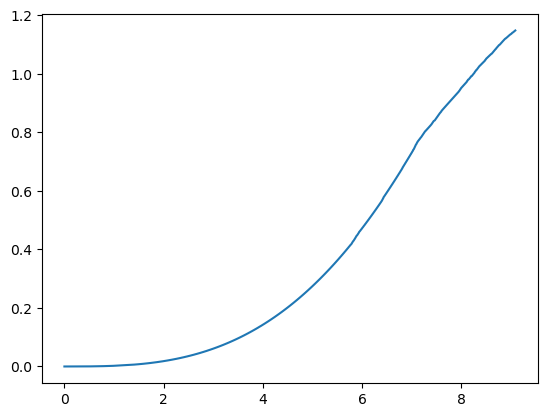

In [460]:
plt.plot(r,correct_units_mass(m))

In [471]:
p[6:20]

array([0.0001312 , 0.00013119, 0.00013119, 0.00013119, 0.00013118,
       0.00013118, 0.00013118, 0.00013118, 0.00013118, 0.00013118,
       0.00013118, 0.00013118, 0.00013117, 0.00013117])

(0.00013, 0.00013234)

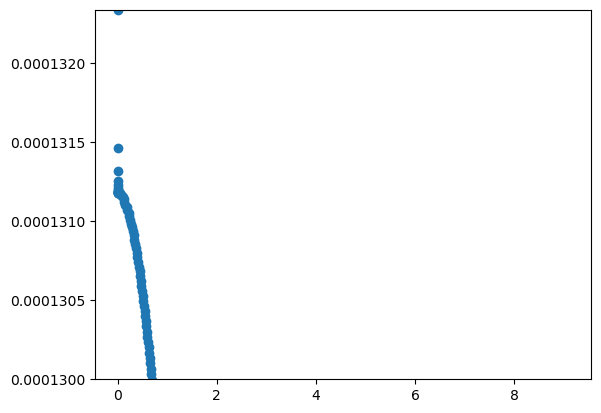

In [468]:
plt.scatter(r,p)
plt.ylim(0.00013,0.00013234)

In [476]:
max(np.diff(r))

0.028311970705497264

In [478]:
r[20:26]

array([0.08396884, 0.09919505, 0.1201202 , 0.13559864, 0.15123561,
       0.17954759])

In [477]:
np.diff(r)[20:26]

array([0.01522621, 0.02092515, 0.01547845, 0.01563697, 0.02831197,
       0.01455574])

In [474]:
np.where(np.diff(r) == np.max(np.diff(r)))

(array([24]),)

### ap4

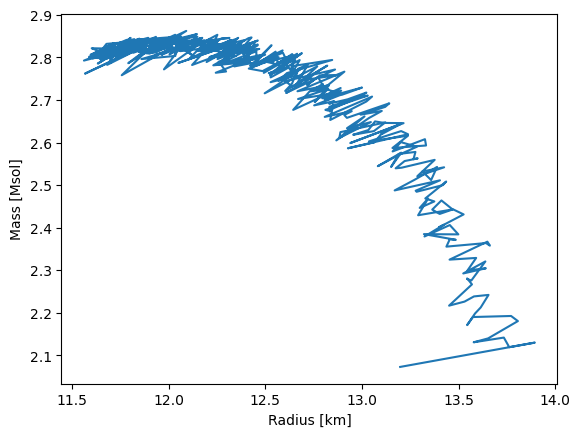

In [65]:
load = np.load("/home/sam/thesis/code/results/tov_res/ap4_mr1.npy")

mass = load[0][0]
radius = load[0][1]

plt.plot(radius, mass)
plt.xlabel("Radius [km]")
plt.ylabel("Mass [Msol]")
plt.show()

### dimless tov ap4

In [ ]:
Data loaded from the .npy file.
m_rust = np.array([0.10955530860876977,
0.11009489790947943,
0.11064384097340428,
0.1112027966778219,
0.1117717699369572,
0.11235066944500417,
0.11293935471739729,
0.11353775059097415,
0.1141457318331533,
0.1147634610366718,
0.11539161748025134,
0.11603005467814641,
0.11667876879540977,
0.11733760871778193,
0.11800647394491522,
0.11868524718200733,
0.11937451491957765,
0.12007463780973497,
0.12078556128120482,
0.1215071527952845,
0.12223934560426704,
0.12298200267465494,
0.1237351919008196,
0.12449967854485722,
0.1252755083967338,
0.1260626052055605,
0.12686079303003447,
0.1276700250859861,
0.12849019158805547,
0.12932191500414228,
0.1301655484065775,
0.13102101722436582,
0.13188824361175744,
0.1327670917628318,
0.13365744257910772,
0.1345595839291668,
0.13547429153525933,
0.1364015560166272,
0.1373412221939163,
0.13829320519863306,
0.13925730210652712,
0.14023374689384316,
0.14122333159194808,
0.14222614666669808,
0.1432420246580817,
0.14427086826588245,
0.1453125421374169,
0.1463671225429669,
0.14743546996446247,
0.14851766129465674,
0.14961359008813194,
0.15072309438034892,
0.15184608273137928,
0.1529825937367231,
0.15413366168892226,
0.15529928204341542,
0.15647933995070923,
0.15767370737542943,
0.1588822775062747,
0.16010519454502598,
0.16134341680311134,
0.16259685409124255,
0.16386535610507785,
0.1651488169849941,
0.16644704223315487,
0.16776069218689701,
0.16909037028925356,
0.17043590165022332,
0.1717972764104016,
0.1731743022266924,
0.1745668888089267,
0.17597599574926293,
0.17740181033173302,
0.17884420286090605,
0.18030299996491145,
0.18177807956091802,
0.18326977087690507,
0.18477892349734867,
0.18630543518374293,
0.18784911823238484,
0.18940988195899042,
0.19098756661470015,
0.19258331913263899,
0.19419726767565218,
0.1958291856136107,
0.19747906902740087,
0.1991465475958944,
0.20083248316619978,
0.20253739618960329,
0.20426111829875646,
0.20600345179045354,
0.20776417711597392,
0.2095438181232358,
0.21134326492850616,
0.2131622945898283,
0.21500076886493294,
0.21685851143691673,
0.2187356379764264,
0.2206333464688582,
0.22255140542548277,
0.22448963746038084,
0.2264478448092004,
0.22842621994299367,
0.23042571686126728,
0.23244632220228165,
0.2344878333056998,
0.2365499309287829,
0.23863299878800356,
0.24073809463840762,
0.24286503693183584,
0.24501361273012057,
0.24718359934973672,
0.24937557407338504,
0.2515903106937572,
0.25382761806955345,
0.25608734764801944,
0.2583692326816074,
0.2606739934419098,
0.26300224583803045,
0.2653535745207828,
0.26772778953710924,
0.2701247863169825,
0.2725459510419927,
0.27499104552305853,
0.2774600656825412,
0.2799525552657993,
0.2824690551174286,
0.2850105028325426,
0.28757654724145054,
0.29016689515670435,
0.2927814380401945,
0.29542133237560125,
0.2980868141512913,
0.3007774124331043,
0.3034930237169917,
0.30623396911850004,
0.3090012301978775,
0.31179448169640134,
0.31461327220155105,
0.3174578581157951,
0.32032973796878145,
0.3232287279025006,
0.3261546017980723,
0.3291069834403442,
0.3320853181551148,
0.33508957438300013,
0.3381190584880325,
0.3411737002888911,
0.344256462378627,
0.3473689732806577,
0.350510918924249,
0.3536817576086862,
0.3568811474610952,
0.3601087291241662,
0.363364175570749,
0.366646933844892,
0.3699589347450133,
0.3733020379181627,
0.37667579343211716,
0.3800799912737633,
0.38351414813565826,
0.38697765303393206,
0.390470347738247,
0.3939914692447659,
0.3975430210676415,
0.40112669001793133,
0.40474233679510035,
0.4083891260392627,
0.4120669982829249,
0.41577522532522854,
0.419513494005906,
0.42328106485487343,
0.4270813562717699,
0.4309159423638111,
0.43478458951513665,
0.43868648376420705,
0.4426212122665504,
0.4465883017297809,
0.4505872986932821,
0.4546180344990339,
0.45868413935834185,
0.4627859548883628,
0.4669228390704632,
0.4710943871498982,
0.4753000128077758,
0.4795388570784739,
0.48381075655040584,
0.48811737205716016,
0.4924610837202891,
0.49684137942206125,
0.5012576317150574,
0.5057091380981736,
0.5101954508687865,
0.5147159756997856,
0.5192708435658937,
0.5238634852220589,
0.5284941438689994,
0.533161909433908,
0.5378663212071165,
0.5426063880669985,
0.5473817764634794,
0.5521919989132436,
0.5570401983373056,
0.5619265833319999,
0.5668502085709235,
0.5718106041735922,
0.5768072850726712,
0.5818390326044696,
0.5869056915972778,
0.5920115429299039,
0.5971568207467897,
0.6023409177893666,
0.6075630983129159,
0.6128226484320263,
0.6181186635448375,
0.623450878887794,
0.628822214890792,
0.6342328818032117,
0.639681998295885,
0.6451684769488341,
0.6506916289655288,
0.6562505703916853,
0.6618460590187292,
0.6674809658492935,
0.6731547140686129,
0.6788665384853426,
0.6846154630823109,
0.6904005228642202,
0.6962208655571215,
0.7020792424436081,
0.7079773229589404,
0.7139139960913572,
0.7198884853619095,
0.7258997433482539,
0.7319469166393003,
0.7380301352413838,
0.7441525838357862,
0.7503140264670086,
0.7565136697300819,
0.7627500533382465,
0.7690225090672183,
0.7753299865664415,
0.781674886429198,
0.788057786582263,
0.7944777602918365,
0.8009334526860523,
0.8074237597347979,
0.8139479689079466,
0.8205074473786793,
0.8271038052090118,
0.8337359592826594,
0.8404028520543197,
0.8471029964239887,
0.8538352354213891,
0.8606016276971297,
0.8674029670650139,
0.8742387627973279,
0.8811075204342378,
0.8880079391108612,
0.894938851071134,
0.9019017575246776,
0.9088977949167638,
0.9159255722740962,
0.9229839457933844,
0.9300716589041298,
0.9371872942593165,
0.9443336718894848,
0.9515113834215463,
0.9587191045616631,
0.9659552760744584,
0.9732187515055243,
0.980508940095498,
0.9878285736264178,
0.9951764558334278,
1.002552026985615,
1.0099533506939906,
1.0173790443962656,
1.0248299885821404,
1.0323075995977904,
1.0398101624561562,
1.047336383995773,
1.0548849816583974,
1.062454970657224,
1.070049296298663,
1.0776679645127298,
1.0853093833490903,
1.0929717381885047,
1.1006539151286343,
1.1083566461581005,
1.1160796297049262,
1.123821442315642,
1.131580404166033,
1.139355345154148,
1.1471467196055127,
1.1549563977058293,
1.162783043135204,
1.1706253685863226,
1.1784815189272717,
1.186350749863351,
1.1942341221248742,
1.2021308608584864,
1.2100385748534006,
1.2179561560978003,
1.2258833338189985,
1.2338221610872584,
1.2417715473504034,
1.2497296855937015,
1.2576953248480598,
1.2656680361184445,
1.2736492483007413,
1.2816371923359982,
1.2896305499544651,
1.2976281478255902,
1.3056288741099025,
1.3136336235922466,
1.3216403977535585,
1.3296478689333058,
1.3376540112007274,
1.3456613413466907,
1.3536693448233943,
1.3616769097483792,
1.3696825525615899,
1.3776846092424346,
1.3856865437866215,
1.393687188246078,
1.4016851022070456,
1.409678352641334,
1.417665315503212,
1.4256443141525834,
1.4336141781254035,
1.4415722093763674,
1.4495185248777878,
1.4574559415074706,
1.4653849350244634,
1.473303718789168,
1.4812103944997663,
1.4891034713930253,
1.4969812126723083,
1.5048420909193048,
1.5126844513422482,
1.5205087025627786,
1.5283190789690566,
1.5361143091726903,
1.5438924959101452,
1.5516524188243308,
1.559392651390399,
1.567111076586852,
1.5748066454031484,
1.5824776304643469,
1.5901268222172518,
1.5977541835628115,
1.6053581330554072,
1.6129371967049184,
1.6204898106698613,
1.6280146890912464,
1.6355100817691348,
1.642974646222785,
1.65041147853315,
1.6578212471702607,
1.6652027428468124,
1.6725546442853156,
1.6798752158500765,
1.687163116428933,
1.694417244783797,
1.701636161490459,
1.7088221793437457,
1.7159742603794756,
1.7230923760522794,
1.7301739466275508,
1.7372185437239211,
1.7442246425008057,
1.751190131881797,
1.7581157251759296,
1.7650036030077725,
1.7718519863097437,
1.7786608832396809,
1.7854279807667863,
1.7921523049624914,
1.7988327324615314,
1.8054683518229573,
1.8120624740369593,
1.8186141675275505,
1.8251231550136109,
1.831587757656461,
1.8380072600251673,
1.8443800471857523,
1.8507053179183046,
1.8569847906514587,
1.863217526012912,
1.8694023593921767,
1.8755389391337083,
1.881626307361847,
1.8876621684760033,
1.8936472933549724,
1.8995827792809747,
1.9054696058291414,
1.911305479031421,
1.9170905808278953,
1.9228235628856543,
1.9285038796495548,
1.9341310854608322,
1.9397064080446298,
1.9452294054196226,
1.9506991749820823,
1.9561145362774748,
1.9614749179136843,
1.9667799473352343,
1.9720305909437894,
1.9772271478706787,
1.9823687957972607,
1.987455236745786,
1.992485534883776,
1.997458229478509,
2.0023751891180575,
2.00723662547622,
2.012041975320286,
2.0167913925214744,
2.02148332263941,
2.0261176337193487,
2.0306943666846156,
2.0352140407812973,
2.039676880427066,
2.0440813662603805,
2.0484278962613023,
2.0527160245586487,
2.0569443737759867,
2.061115236892852,
2.0652273003238917,
2.0692802098180763,
2.073273882807954,
2.077207561883986,
2.081082223600332,
2.0849003706518388,
2.0886600583370343,
2.0923624136873857,
2.0960066353523406,
2.09959270724283,
2.1031204681882345,
2.1065912376506377,
2.110003802559062,
2.113358737432236,
2.116655328990696,
2.1198924362602996,
2.1230709196167585,
2.126189769983285,
2.1292490323039575,
2.132248182666823,
2.1351871377870473,
2.1380679460557848,
2.140890425861008,
2.1436549863942456,
2.146361360774759,
2.149009652798818,
2.151601450513808,
2.15413724406304,
2.156616686826484,
2.1590407534379654,
2.1614091276791334,
2.1637216646901054,
2.165977811663448,
2.1681783914174186,
2.1703227692229166,
2.1724109467867767,
2.1744429442843685,
2.1764198818708484,
2.1783412562358255,
2.1802069357385063,
2.1820176990598807,
2.183773112209514,
2.185474513771726,
2.187120975843387,
2.1887134955136007,
2.190251807378991,
2.1917368757400286,
2.193169843551041,
2.194550528660002,
2.195879406349458,
2.197156476109357,
2.1983822597806495,
2.199555838536023,
2.200678504711924,
2.201749704414881,
2.202770171777869,
2.2037411335787915,
2.204662120772173,
2.205534288783277,
2.2063574020527557,
2.2071318553130843,
2.207858033883027,
2.2085355943529636,
2.209164886773075,
2.2097467545345646,
2.2102806402103616,
2.21076819193328,
2.211208043439407,
2.2116018825456267,
2.2119505510948456,
2.212253975267079,
2.2125132758132313,
2.212728334172543,
])
r_rust = np.array([45.37972540745591,
44.21223975334316,
43.26848071462501,
42.31097753309223,
41.47189707675871,
40.52938214142437,
39.716071106950174,
38.93545274417216,
38.14500163925827,
37.425157186751925,
36.72486675813731,
36.002493764288175,
35.347959449033645,
34.699841538262184,
34.072559143061476,
33.49281372033231,
32.922718611208275,
32.36343077520159,
31.83089310134671,
31.30549819909018,
30.821953019340818,
30.318091101213938,
29.868899962566527,
29.380365942192324,
28.95023329367376,
28.544898821206914,
28.120158835892124,
27.702453564593455,
27.306819462633975,
26.939542339959385,
26.561817366113708,
26.231415093885413,
25.860164920454682,
25.51728998838254,
25.19002027390727,
24.87572124455452,
24.577373962076884,
24.27024144462107,
23.9788065711207,
23.68668313516775,
23.413849146951584,
23.142401857119076,
22.880847784609543,
22.632953805072315,
22.388557759948842,
22.133060224245725,
21.89572681400786,
21.666688007218443,
21.4431300151038,
21.22816495643212,
21.003641204215793,
20.81034018174582,
20.595049009441972,
20.39450703078948,
20.204724120516317,
20.013063453734883,
19.830993888298433,
19.6542766523579,
19.47993463038052,
19.30391684079205,
19.135327805502204,
18.97087033886023,
18.812335136621424,
18.655376334852477,
18.505738497823177,
18.354850357515623,
18.21595733161995,
18.07465034706834,
17.92592486185472,
17.803244344830485,
17.65896215924677,
17.53012624940795,
17.40203555087074,
17.28625818396229,
17.154775570206123,
17.033677132271244,
16.918172706388205,
16.80997426541405,
16.69388342317371,
16.583728393382636,
16.47927385029074,
16.375837309557134,
16.26894536501428,
16.17001725248847,
16.071706758699882,
15.975237170671498,
15.881521219522268,
15.793800176371603,
15.699907943035543,
15.612698986342936,
15.524561784022193,
15.440294972270522,
15.359741367346487,
15.27514478216155,
15.195624188392246,
15.116159269477095,
15.041103434848281,
14.965934713435017,
14.893288165531658,
14.819696134483772,
14.751970880991944,
14.683860071772418,
14.613367735673686,
14.547371711349696,
14.482325149490995,
14.418873888314225,
14.355262496636966,
14.294779906435922,
14.235058361533207,
14.175883248595103,
14.120759800374675,
14.061749645542253,
14.008691238471865,
13.95195646563907,
13.898262313243112,
13.84604323634924,
13.797998626860531,
13.744812360806065,
13.695088377318415,
13.65051660798878,
13.600393765253724,
13.555739904996042,
13.509181147340485,
13.463144544577842,
13.419740341149748,
13.379727466875735,
13.337243018993856,
13.295635397211079,
13.255526633812263,
13.214001361324819,
13.1753850527976,
13.139086861542687,
13.09242711767596,
13.065274848938483,
13.0289113054031,
12.99225251226855,
12.958349950784271,
12.92411302948295,
12.890548505357147,
12.85763656329074,
12.82598101679071,
12.79498604582774,
12.76405057801088,
12.7338330375026,
12.705523251610503,
12.675916895413787,
12.647796913878004,
12.619783781216116,
12.592524842343947,
12.565705888460304,
12.539903540391347,
12.514101151138451,
12.488986299488301,
12.464569065751606,
12.439906400595161,
12.416595197060103,
12.393200784859214,
12.371413721892004,
12.34903880550067,
12.326219828164945,
12.30457680363571,
12.284303776620735,
12.263046697259675,
12.243510889740026,
12.22317967561791,
12.204463540757066,
12.18573941808183,
12.167058919049715,
12.1485307220141,
12.130761679649499,
12.113784234229458,
12.096661632754936,
12.079806094631977,
12.063394011222345,
12.04429996554083,
12.031699288563104,
12.016356360916372,
12.001032638841984,
11.986749468987572,
11.972163017446519,
11.958405539362792,
11.944686720242524,
11.93058059174172,
11.91778418044188,
11.90497963550561,
11.893705183779725,
11.88004953416055,
11.867557977891348,
11.857081101961704,
11.84533641470566,
11.833919015967972,
11.82252184495059,
11.811382649651678,
11.801372788643194,
11.790851291315434,
11.780798803855097,
11.771889907309893,
11.761621236086567,
11.752187497483993,
11.743303055888818,
11.73549239860697,
11.726629781977268,
11.71740433487266,
11.70929433870598,
11.701702706989263,
11.69579524530649,
11.68577099461615,
11.679294259818823,
11.671306134732816,
11.664010852654316,
11.657262387934534,
11.650618231574095,
11.643939211282538,
11.637738853189445,
11.632008150237711,
11.625684030714586,
11.62059146451305,
11.614666789810176,
11.6093653868935,
11.603859268590574,
11.598377166188692,
11.593313769774888,
11.588894158719757,
11.58378715679975,
11.579216110253599,
11.57504714202457,
11.570767759727932,
11.566563240147586,
11.56274815169419,
11.558661997396898,
11.55510683987902,
11.551374390195035,
11.547751240735423,
11.544422599920226,
11.541193310266795,
11.537930016998887,
11.535001882279312,
11.531933186693644,
11.529149745310772,
11.526505396675136,
11.523713400970749,
11.521142922604993,
11.519087269397227,
11.516976494474278,
11.514219397297385,
11.511914438979455,
11.509642135313683,
11.507854869224063,
11.506032966463877,
11.50458818301061,
11.50248927222994,
11.501060126658162,
11.499295831587427,
11.497817579940495,
11.496131829337566,
11.494344783200411,
11.493051053845114,
11.49177567125557,
11.49054300238177,
11.489865884608845,
11.488211479075819,
11.487253223232745,
11.48623356091839,
11.485164325856001,
11.484049856152378,
11.483572917162238,
11.48229914392833,
11.48157051173897,
11.480765550225863,
11.479986764106927,
11.479564416234576,
11.478738782108634,
11.477900234325604,
11.477346221074368,
11.476567822047837,
11.476099843065475,
11.475580930761593,
11.474975683664525,
11.474643631942776,
11.473814215395254,
11.473439327865538,
11.473107596584367,
11.472489439417938,
11.471934065467572,
11.471603896585634,
11.470960461545795,
11.470527380475506,
11.469994940930839,
11.469571638642302,
11.468986422915954,
11.46859279155428,
11.468194078799083,
11.467662104355655,
11.467175238965833,
11.466614206607293,
11.466157392435163,
11.46553960641723,
11.465038821060457,
11.464557689107169,
11.46378524060242,
11.46320767032308,
11.462455990693899,
11.461954564998733,
11.461275332446169,
11.460429185690776,
11.459719529561548,
11.458964606218132,
11.45814465797011,
11.457266853864345,
11.456413807592622,
11.45549551212004,
11.45453453609753,
11.453721581518112,
11.452531355335683,
11.451626678532616,
11.450623943642613,
11.449202578192038,
11.448160677096757,
11.44678258164139,
11.445603711570575,
11.44416393556702,
11.44296207636471,
11.441327568878654,
11.439910075873154,
11.438263637059864,
11.43669309343269,
11.435106434012166,
11.433368661365499,
11.431595411269564,
11.429845378135568,
11.427930040952957,
11.425928234594661,
11.423994133840534,
11.421938341372595,
11.419890467838501,
11.417761119309025,
11.415382327968713,
11.413138692095458,
11.410695536789362,
11.408317226425133,
11.405735425707586,
11.403220911194055,
11.40054698801724,
11.397899142310372,
11.39514854166432,
11.392189944753444,
11.389360595708624,
11.386276112674663,
11.383198230642778,
11.380100980209107,
11.376927137784085,
11.373463124671787,
11.370141412778176,
11.366685286857422,
11.363116699612139,
11.359575546906976,
11.355944811368486,
11.352129455635382,
11.348406732828577,
11.344436092825166,
11.340373358250131,
11.336292566019585,
11.332096143769627,
11.327851353420842,
11.323601675173032,
11.319168005532822,
11.314748236275566,
11.31012880285619,
11.305607607887966,
11.300790114913775,
11.29603222560834,
11.291139013323484,
11.28617968920326,
11.281129005618734,
11.276067523674419,
11.270783586848866,
11.265433128159009,
11.260037353808327,
11.25455497632038,
11.249031299716444,
11.243377802120818,
11.237638632836502,
11.23203486860182,
11.226002026186904,
11.220055520360425,
11.213995385601056,
11.207837548070902,
11.20157161510324,
11.195276397904156,
11.1890804580335,
11.18242321677515,
11.175953570637017,
11.169305555475205,
11.162542289412425,
11.155753345316286,
11.14891516502972,
11.141933439478402,
11.134924278764462,
11.127814604572698,
11.120563962254293,
11.113256925197504,
11.105937175629487,
11.09846173137786,
11.091004711870816,
11.083395493549716,
11.07568630281355,
11.067901467464575,
11.060086856558268,
11.052104911647866,
11.044190121094987,
11.036049794689543,
11.027939584236702,
11.019735916496572,
11.011339458797275,
11.002993054878438,
10.99453769940711,
10.98603490302129,
10.977451795710861,
10.968701423471536,
10.959962750259672,
10.951152612421158,
10.942253805133909,
10.93330358103504,
10.924227994312007,
10.915199644758797,
10.905935174370052,
10.8966973603229,
10.887397639598918,
10.877990041919585,
10.868538727359578,
10.859038357386037,
10.849456362416097,
10.839917345048061,
10.830079266154474,
10.820310485389728,
10.810439018952477,
10.80053808658453,
10.790539801056514,
10.780542277709587,
10.770422635894,
10.760226010730321,
10.750109772815579,
10.739807993223728,
10.729510228834776,
10.718999626601468,
10.708557352374473,
10.698161083569188,
10.687547139813818,
10.676971666338579,
10.666267095995662,
10.655513407315599,
10.644770015581717,
10.633906431998003,
10.623026109395683,
10.612162268060102,
10.601140849738249,
10.590041339956562,
10.578952252592142,
10.567829678914967,
10.556621680170586,
10.54540115717669,
10.534107342759947,
10.522801844586967,
10.511453692003858,
10.500049046513604,
10.488592097638863,
10.47719741898644,
10.465588928006321,
10.4540230580003,
10.442402604615259,
10.430809129912237,
10.419083716094947,
10.407381156186405,
10.395597665531504,
10.383808493306946,
10.372012858964574,
10.360189247003925,
10.348201400555487,
10.336298738989026,
10.324329656408057,
10.312351813015901,
10.300377311712419,
10.288288361436276,
10.27620598278077,
10.264081459326164,
10.251935470385384,
10.239767554351783,
10.22757407210203,
10.215393530387963,
10.203200506235083,
10.190881074943162,
10.17866679158758,
10.16632519575979,
10.153988338224064,
10.14170860654796,
10.129281231252643,
10.116962889490996,
10.104491037636587,
10.092121701295088,
10.079635263109202,
])
lam_rust = np.array([-1849442696.8736167,
-1632251750.5923767,
-1467368801.6076589,
-1313965046.2434976,
-1187778739.8895464,
-1060587403.038623,
-957163236.692126,
-865216299.2828338,
-779569060.644456,
-706535377.5829539,
-640458278.2244654,
-578150717.6771085,
-525026638.1909122,
-476236593.8637174,
-432359076.3735604,
-394187519.40550345,
-359286156.46187663,
-327394258.7052033,
-298899642.8889097,
-272757601.4921865,
-249985242.44863695,
-228138977.02474764,
-209523466.33815232,
-191058889.12844628,
-175473060.13431853,
-161544637.19200113,
-148129153.0377291,
-135815412.77268267,
-124787923.48286998,
-115039703.62599094,
-105758165.70669602,
-97849931.87365708,
-89827247.30857933,
-82766145.31910758,
-76385850.40938479,
-70589722.16846947,
-65348510.88612353,
-60337895.81433072,
-55817221.48854972,
-51582772.45917445,
-47790683.75089844,
-44252970.30571318,
-41016678.1464057,
-38082119.72857405,
-35353506.63030468,
-32723916.547681745,
-30373773.507955234,
-28215569.113074236,
-26218098.742628675,
-24392198.133868124,
-22624491.090579167,
-21109845.357288852,
-19594459.397470016,
-18228251.352830194,
-16985050.86985895,
-15811655.505208109,
-14739936.47104771,
-13746385.155206956,
-12820144.245996857,
-11944032.035475962,
-11138482.157472583,
-10392062.11918058,
-9703100.493727637,
-9058512.06055054,
-8464729.123256812,
-7905042.807335317,
-7399319.204780595,
-6917733.114178744,
-6450886.136831454,
-6056352.718028421,
-5645402.925332153,
-5284483.627301367,
-4946479.651032807,
-4639888.918547571,
-4331216.434797634,
-4053378.0414386783,
-3797988.1295628785,
-3563626.748295954,
-3334872.049315993,
-3124072.49758377,
-2929552.419585325,
-2748246.7275588545,
-2572822.2747711237,
-2412681.115992936,
-2264095.594892526,
-2123655.273234954,
-1992805.1260413285,
-1872707.88711709,
-1754107.8687595103,
-1648191.6022967596,
-1545352.1128274195,
-1451451.0271966532,
-1364254.0492622934,
-1279809.6793537948,
-1202152.7629635592,
-1128600.433121908,
-1060641.1226306236,
-996575.4310975375,
-936554.8412843706,
-879479.1692154693,
-827174.5232155846,
-777905.2095871416,
-730388.8993501544,
-686447.5553943608,
-645474.8839892694,
-606804.722979864,
-570306.5707677059,
-536525.5539324698,
-504557.50149575557,
-474312.57277928514,
-446575.2756496585,
-419431.38601972157,
-395139.1847270206,
-370807.3211629719,
-348564.6556274996,
-328065.91675256373,
-308927.96018015494,
-290512.8258073346,
-272840.43946470035,
-257198.20131098235,
-241348.24425835448,
-227198.09608388858,
-213954.23459134245,
-201281.65867615474,
-188913.54472123695,
-177881.65288603786,
-167335.5122903597,
-157493.1435704185,
-148187.79387443437,
-139207.34921750388,
-130786.40346257704,
-122977.03779880867,
-115097.92396166515,
-108831.60694709785,
-102340.98370101191,
-96093.60258924839,
-90312.7044395058,
-84860.04075433826,
-79683.22059714817,
-74787.44198562576,
-70410.47230443817,
-66191.0948195457,
-62043.24576179242,
-58136.57229884361,
-54796.260527612496,
-51318.69403511179,
-48227.907194635,
-45229.86684091225,
-42429.99408354084,
-39727.36562642027,
-37422.39389861699,
-34929.27901017555,
-32832.98753160849,
-30782.82732570203,
-28846.65837452234,
-26831.870345454012,
-25196.452295532337,
-23694.196482529125,
-22079.0887367847,
-20524.917852726114,
-19293.23861582104,
-18005.940213956783,
-16800.0216887374,
-15579.231400670818,
-14582.731840512753,
-13660.327151862522,
-12671.125621989637,
-11836.016567620381,
-10978.377744347663,
-10173.81384967221,
-9450.837214057576,
-8795.695475457373,
-8124.329110220189,
-7557.892529921703,
-6895.780479661279,
-6458.713466200026,
-5950.764812902555,
-5485.145004246805,
-5035.108633983582,
-4634.476698100626,
-4261.886032966634,
-3845.581764631837,
-3543.753296570216,
-3179.3163131061756,
-2877.781407959752,
-2650.4048020722666,
-2317.514450403104,
-2121.632677138158,
-1917.2027895656013,
-1704.4924845167484,
-1517.8244630592008,
-1287.292352864588,
-1139.2154783251572,
-963.52053125962,
-829.678599292815,
-707.1383849859486,
-569.2558118305126,
-447.8453544519526,
-357.0977351886471,
-251.26188471763936,
-116.60523366557611,
-54.316952206625906,
23.57673533544829,
102.71547995090954,
157.08184560990586,
213.19607072896,
275.8572352435697,
338.7623695538817,
401.4284567103019,
395.7882160323602,
456.28744019416524,
478.9295349405188,
544.789987095727,
564.6530390124368,
606.7136916051013,
593.6004939675693,
632.9615247934897,
637.9410950105404,
670.5754179957567,
686.0050829177354,
683.5832403932759,
696.9690190199155,
703.309457375095,
721.4857200699413,
710.8282410539159,
731.6291382189064,
731.4716018902294,
718.2959683743602,
724.6340870916563,
721.506773356036,
721.1971217920975,
715.382319475132,
711.9053131980273,
712.4915508682562,
705.3141100245532,
704.9935631080325,
695.6112613645531,
706.0578243065755,
684.6006679732757,
675.3086301944236,
662.7773291979763,
661.9033738346577,
640.0333424230715,
651.1508391270912,
634.4968511953439,
636.3829375371146,
610.8340085273505,
612.9102845274065,
586.7751835159909,
569.4965631131925,
578.7873466805738,
568.5763764500131,
556.0813868149683,
537.7841862805616,
541.5032455456447,
529.2463437751749,
523.3868668640533,
513.1493529978225,
492.0546344540692,
485.74853037128526,
476.25670278127245,
474.6230131638492,
462.2326729775003,
453.5716535873195,
439.26860557193265,
428.6176194581426,
427.980639279457,
413.9934493419773,
401.71472634570597,
398.05006746974266,
383.8815384192747,
382.1501285433956,
371.747938787494,
363.14334209693635,
356.60442452189903,
352.86957262901177,
342.3873962300965,
328.87991420810994,
329.7932539362318,
327.1030190438875,
314.00959245870564,
303.57014765835254,
295.9782099528188,
294.559332379319,
284.92263404597804,
276.4349600748094,
269.6058359137647,
266.04819723910737,
257.17651230269195,
253.1171643098536,
249.20003150264233,
242.62210590071732,
237.47973650065958,
228.47002131677982,
226.8740825579686,
221.41162283354453,
215.1560784465297,
211.978685995101,
202.65407569134987,
204.88162015409785,
197.01402141442514,
192.14336804666516,
187.15946541171814,
181.61600027390347,
177.39739044042176,
174.7393257128622,
171.30642882939932,
166.53042004614758,
162.25509474189997,
156.88984875109168,
155.88118494217767,
151.1580318217887,
147.04952653589436,
141.929156556486,
140.06780616138434,
135.7133737560869,
133.5205207334311,
132.40186227362366,
130.06750286618018,
125.16565518713638,
123.59259842891312,
118.32468160383169,
116.61931438377292,
112.73003437703662,
110.7351704031911,
107.28232510480836,
106.58181534627916,
102.2313857481291,
98.93651987364774,
98.63743055129339,
96.81110442685512,
94.44957411959254,
91.73218015867762,
88.11525725686272,
87.05263954801453,
84.43314836681087,
83.46832537547014,
80.93056611656877,
79.38961988646082,
78.88358100914371,
76.47500999697684,
74.48143928176414,
72.21881565522358,
71.0884124307732,
70.32395881447329,
67.96542907732858,
65.78151046352768,
64.56450583598722,
64.2335242023777,
62.242818984370565,
60.80405312972451,
58.438646333706345,
56.88299134269991,
55.7395742329136,
55.81843169707878,
53.33606814317516,
52.676130676687535,
51.88470489669109,
49.68294867821559,
49.35841744329934,
47.752120642316314,
46.28901418888844,
45.33533379578799,
45.23766903961465,
44.24280020331233,
43.15735262022701,
41.72190570538185,
41.09672132787399,
39.2828496652077,
39.12550955740127,
39.519599145928886,
36.79018460219579,
36.28014518744604,
35.562555139930836,
34.75020640421444,
34.984058678913286,
33.389513509875286,
33.366636042030656,
31.49410277879995,
30.701313281116985,
30.56727378642946,
29.115516738941256,
29.321881578638905,
28.17371241461894,
27.62002665336487,
27.624468111090916,
26.662097660088165,
26.185927079020185,
25.777327437342404,
25.273122833516464,
23.672636173190494,
23.71220958290261,
23.308232490147713,
22.53538864097639,
21.731868745024165,
21.414047860964562,
21.044118389315422,
20.062984983851138,
19.915369647163516,
19.576813331781434,
19.397088684641382,
19.000615931087577,
18.460380630993242,
18.484323163056168,
16.98466259616021,
17.240858326943503,
17.12481964937305,
16.489883494900273,
15.722495833012234,
15.021597718913464,
15.122300320738354,
14.954088839513922,
14.381968010143376,
13.964080859329787,
13.422466403848231,
13.519538307309475,
12.785270065618326,
12.65686839700984,
12.483049318914125,
11.884742449954,
11.81168547259824,
11.49713282433093,
11.179935104234085,
11.161615380027353,
10.878342170069473,
10.335869536689392,
10.3821021039255,
9.6348267618058,
9.769667979307995,
9.464509898005527,
9.643181480070453,
8.909638605952493,
9.100763673861943,
8.445827629267571,
8.290753930704101,
8.239023255400669,
8.11146471359777,
7.513343932974302,
7.527380862719812,
7.367211029514132,
7.065629950859,
7.204241586865648,
6.565028885525462,
6.3456241880614215,
6.397525096283746,
6.076451903677601,
6.253100707639837,
5.596328250176828,
5.68905869628526,
5.43796745936764,
5.474683636768359,
4.88126446902499,
4.779740887490772,
4.807260904808861,
4.627385785331779,
4.399238329066444,
4.173984425768497,
4.271909343237205,
3.9972216477902083,
3.7369198765436775,
3.6905042180706755,
3.660846291341643,
3.2858594426444347,
3.2776624813282513,
3.108175213570027,
3.0648774160173153,
2.873353446022513,
2.7959362797525653,
2.565720656197541,
2.5820921604924236,
2.5608035940710656,
2.107082023118507,
2.347057860173976,
1.9738815815168498,
1.7707943979054266,
1.6195738914765974,
1.667768979267997,
1.5358510830553382,
1.3955756977322338,
1.3826550123916292,
1.1843082737908255,
1.0492842872844579,
0.9349263321444845,
0.9306572014880035,
0.7593643099428,
0.6061288754820798,
0.5632269949371783,
0.4484579194626187,
0.31413579710778167,
0.3233203523852073,
0.22358364920692697,
0.20941090830111972,
-0.015480938284737037,
0.0053393524601694125,
-0.014928661051263134,
-0.0974803537494351,
-0.34180165520714473,
-0.39876961932025234,
-0.5192863425468104,
-0.5082414679156906,
])

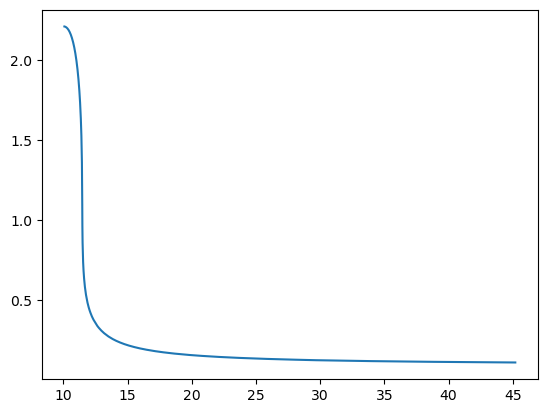

In [253]:
plt.plot(r_rust, m_rust)

In [103]:
np.max(m_rust)

2.21269358870247

#### tidal deform

In [71]:
m_rust = np.array([0.10955530563579637,
0.11009489812300752,
0.11064385315359189,
0.11120279366687096,
0.11177177638922552,
0.11235067260890717,
0.11293935174471835,
0.11353774667199391,
0.11414572093332248,
0.11476347787393737,
0.11539159204241642,
0.11603005165172385,
0.11667874850989393,
0.11733758983841382,
0.118006463882396,
0.11868524638121358,
0.1193745116916997,
0.12007465649853857,
0.12078555262524857,
0.12150712769084866,
0.12223933569588208,
0.12298199949896049,
0.12373519489327843,
0.12449968496059256,
0.1252754959602397,
0.1260625792659801,
0.12686079644349418,
0.12767002672647754,
0.12849021818354292,
0.12932189388307896,
0.13016555100799176,
0.13102101527702334,
0.13188826206245047,
0.13276708407207793,
0.13365740279033425,
0.13455960446228765,
0.13547431102154076,
0.13640155604244447,
0.13734122701205762,
0.13829316514249715,
0.13925730624435803,
0.14023373969099534,
0.1412233365961214,
0.14222614844460724,
0.14324201837727138,
0.14427087897546859,
0.1453125566928515,
0.14636713410716554,
0.14743547171031463,
0.148517646216263,
0.14961356709098625,
0.15072306405785882,
0.15184606443188212,
0.1529826341155341,
0.15413366143947402,
0.15529927965298537,
0.1564793239940991,
0.15767372970848997,
0.15888227698781954,
0.16010522545936323,
0.16134342425528014,
0.1625968221363681,
0.163865390866076,
0.16514880531702758,
0.16644704831194798,
0.16776064534357413,
0.16909028405839968,
0.17043591191503607,
0.17179729434393085,
0.17317430030507694,
0.17456687481363753,
0.17597592972469672,
0.1774017816328112,
0.17884419764958284,
0.18030299073636954,
0.1817780895963049,
0.18326975690379493,
0.1847789371174996,
0.1863054448214271,
0.18784913590894445,
0.18940988039717616,
0.19098758921231934,
0.19258328192511695,
0.194197289875081,
0.19582924506075666,
0.1974790437205145,
0.19914655331708309,
0.20083248556933556,
0.20253741059853508,
0.20426109763414504,
0.20600344205212406,
0.20776418853936715,
0.20954383084759876,
0.21134323810663147,
0.21316229206280965,
0.2150007560743272,
0.2168584667149783,
0.2187356763818052,
0.22063334190490638,
0.2225513849876609,
0.22448968010351542,
0.22644782825898546,
0.22842614900646616,
0.2304256805874954,
0.2324463350771683,
0.2344878375644694,
0.2365499664611117,
0.23863301249403587,
0.24073809686727815,
0.24286505830882638,
0.24501363002418983,
0.2471836409028582,
0.24937552398738572,
0.25159027324704203,
0.25382766927038974,
0.25608734022657326,
0.25836915726566856,
0.2606740323177711,
0.26300219535455716,
0.26535356083670575,
0.2677277339962861,
0.2701248466201232,
0.2725459054762652,
0.2749910822394635,
0.27746009279473866,
0.2799525145125147,
0.282469086127739,
0.2850104868698483,
0.2875765520519461,
0.29016689225778985,
0.29278137492806555,
0.29542133823452404,
0.29808675567189225,
0.3007774183409693,
0.3034929531855427,
0.30623396508808826,
0.3090012108480931,
0.3117944497614181,
0.314613414629131,
0.31745785520907444,
0.3203297586816212,
0.32322873261183205,
0.32615459365494015,
0.3291068932934584,
0.3320853611327232,
0.335089555412655,
0.3381190891827248,
0.3411736640520939,
0.34425657575460183,
0.3473690724186754,
0.35051092288780683,
0.3536816768696762,
0.35688115473858456,
0.3601087100942728,
0.36336413549032803,
0.36664691594978266,
0.3699589527128326,
0.3733020387416022,
0.3766757754105504,
0.38008001875445774,
0.3835141019431284,
0.3869776702217862,
0.3904702869115521,
0.39399147589261757,
0.3975429699670564,
0.40112676384300056,
0.40474230849578113,
0.4083892235320568,
0.4120671010542489,
0.4157752155133566,
0.4195135409678548,
0.4232810941956849,
0.4270813826665683,
0.4309160810890495,
0.4347846870478388,
0.4386863842054817,
0.4426211894544323,
0.4465884144888398,
0.45058716641079893,
0.4546180193504921,
0.4586841554952312,
0.4627859161676571,
0.4669229295043791,
0.4710943004661461,
0.47529986061550705,
0.47953883067602476,
0.483810718092148,
0.4881173347986905,
0.49246111292301825,
0.4968412612273005,
0.5012575486333105,
0.5057091772202373,
0.5101954450896327,
0.514715919474871,
0.5192707384329744,
0.5238635657765006,
0.5284941463939822,
0.5331619437119082,
0.5378662852796784,
0.5426063668580303,
0.5473818544298966,
0.5521921139065797,
0.5570401960661677,
0.5619266104452144,
0.5668501914318081,
0.5718108648560037,
0.5768073008770557,
0.5818389950308784,
0.5869057646678251,
0.5920115312578145,
0.5971567661970945,
0.6023409613298782,
0.6075632288718937,
0.6128227608992896,
0.6181186115111491,
0.6234508552485387,
0.628822333050754,
0.6342328830524833,
0.6396820603278964,
0.6451683841964837,
0.6506915792007424,
0.6562506304871841,
0.6618461083090345,
0.6674808968467355,
0.673154697020621,
0.6788666140822287,
0.684615432351274,
0.6904005603416501,
0.6962209944070573,
0.7020792607764311,
0.7079772257694515,
0.7139139069404979,
0.719888522959757,
0.7258997115020273,
0.7319467806418167,
0.7380299737109288,
0.7441526152049575,
0.7503140820850616,
0.7565137174487925,
0.7627500844576379,
0.7690224146110716,
0.7753299086791319,
0.7816750580047089,
0.7880578548598107,
0.7944777292147689,
0.8009336659954779,
0.807423976857995,
0.8139478580200612,
0.820507592470362,
0.8271039577399449,
0.8337359615972897,
0.840402840101333,
0.8471029340925237,
0.8538352652610574,
0.8606015447498293,
0.8674029513252987,
0.8742387935489678,
0.8811073149246818,
0.8880079514789943,
0.8949387113322874,
0.9019015578507779,
0.9088975803250712,
0.915925507184115,
0.9229840352245146,
0.9300715938487026,
0.9371874235427301,
0.9443338932474056,
0.9515114526684073,
0.9587191523646178,
0.9659553620339573,
0.9732188573078501,
0.9805091244209942,
0.9878283845295994,
0.9951765167715009,
1.0025520224932665,
1.0099531448867622,
1.0173791659611013,
1.0248300888220525,
1.0323075598709774,
1.0398102921681698,
1.047336448153897,
1.054884893368932,
1.062454734184751,
1.070049341241114,
1.0776680255215458,
1.0853093359920931,
1.092971760756931,
1.100654103170245,
1.1083565762448002,
1.116079642255874,
1.1238213773000032,
1.1315805555872263,
1.139355543064399,
1.1471467004852371,
1.1549563494518091,
1.1627830675809059,
1.1706252733578,
1.1784813041667093,
1.1863506832965145,
1.1942343421134334,
1.2021307613673713,
1.210038651895928,
1.217956262650751,
1.2258831920885647,
1.233821831012842,
1.2417715021044733,
1.2497296789778343,
1.2576953308782879,
1.265667954068168,
1.2736490217027596,
1.281637261594118,
1.289630602988145,
1.2976282863789292,
1.3056289951319044,
1.313633568641638,
1.321640472609117,
1.3296475665577272,
1.3376541580884105,
1.3456612248143855,
1.3536690893592338,
1.361676983647719,
1.369682388349644,
1.3776845813463583,
1.385686547716816,
1.3936874146717426,
1.4016849937892923,
1.40967821292613,
1.417665262951118,
1.4256445504737223,
1.4336141076849447,
1.4415720800570675,
1.449518102653011,
1.4574562551505674,
1.4653850463793854,
1.473303651841917,
1.481210193792107,
1.4891035016453438,
1.4969810103544074,
1.5048421665919791,
1.512684320414815,
1.5205089809485435,
1.5283191958254907,
1.536114292956068,
1.543892477276194,
1.551652609761702,
1.559392518126297,
1.5671110892280438,
1.5748065457426736,
1.5824774288778458,
1.5901266235737903,
1.5977541084659785,
1.60535779850257,
1.612937273275976,
1.6204898901967306,
1.6280147739467588,
1.6355100347900853,
1.6429746069033377,
1.6504113796360331,
1.6578211935600433,
1.665202821253466,
1.6725545725870403,
1.6798751014404991,
1.6871631785672636,
1.694417510945579,
1.7016360013570064,
1.7088220708659334,
1.7159744171172513,
1.7230923303133194,
1.7301742683013237,
1.7372186373557985,
1.7442243968437212,
1.7511900370619427,
1.7581157210632177,
1.765003498036196,
1.7718524643385392,
1.7786607997553754,
1.7854280937745546,
1.7921525044957103,
1.7988325088732007,
1.805468286609001,
1.8120620566884698,
1.818614076789192,
1.825123211635327,
1.8315876564887543,
1.8380068857481797,
1.8443799976252186,
1.850705474938499,
1.856984605207252,
1.8632171366742831,
1.8694024611481461,
1.8755389086041838,
1.8816260222824066,
1.8876626544053157,
1.8936474019442642,
1.8995826277364694,
1.9054692922439287,
1.9113056622224607,
1.9170904887098004,
1.9228239761259236,
1.928504244722031,
1.934130974779335,
1.9397065405423735,
1.94522930613351,
1.9506987573740286,
1.9561145169971625,
1.9614752482563624,
1.9667801237098588,
1.972030593126154,
1.9772273043915922,
1.9823689125400346,
1.9874553366576577,
1.992485357463541,
1.997458580293917,
2.002375311023999,
2.007236839386404,
2.012042137619586,
2.016791073580697,
2.0214832509708853,
2.0261177450977135,
2.030694382800531,
2.0352139288122224,
2.0396766478580166,
2.044081476263845,
2.0484281292105866,
2.052715737115683,
2.0569443797371467,
2.0611149453467728,
2.0652272247857275,
2.069280268374503,
2.0732739191724825,
2.077207569068028,
2.081082624322923,
2.084900193339267,
2.0886600552072143,
2.092362012238697,
2.096006255873623,
2.099592364833517,
2.1031205862311757,
2.1065911842131393,
2.110004149481257,
2.1133587379034195,
2.1166551172200805,
2.119892284932768,
2.123070803172055,
2.1261900970296925,
2.129248964337074,
2.1322483561101913,
2.135187059312982,
2.1380679699123077,
2.1408903291104844,
2.143654766594262,
2.1463615026785705,
2.149009607821113,
2.151601345297498,
2.1541368387401376,
2.156616792047916,
2.159040959324421,
2.161409019627647,
2.1637216086606004,
2.165977883282618,
2.1681782481125875,
2.1703226384773786,
2.172410611374634,
2.1744432582863515,
2.176419794251739,
2.1783411278650253,
2.180206971441766,
2.1820175610270818,
2.1837732808930252,
2.1854743125809795,
2.1871211868358245,
2.1887132236628704,
2.190251537511119,
2.191736880060038,
2.1931698915047537,
2.1945505973716233,
2.1958795980177106,
2.1971567094007396,
2.1983821544558686,
2.199556189219513,
2.2006784715486845,
2.2017495807702634,
2.2027702206244655,
2.2037409042220246,
2.2046621646550304,
2.2055342073200506,
2.2063578935019117,
2.207132063900554,
2.2078581240599444,
2.2085354943368225,
2.2091649585603044,
2.2097467055928943,
2.2102808758888406,
2.210767744041363,
2.2112079443040575,
2.2116016463632193,
2.2119504561199386,
2.212254380877885,
2.212513652893209,
2.2127287685861923,
])
r_rust = np.array([45.297128899353915,
44.23065046010474,
43.26190196622077,
42.395919974144995,
41.42697762841364,
40.54182314855365,
39.76742210305161,
38.89928245729163,
38.19458928047064,
37.400033426200224,
36.68561138814539,
36.07753352650344,
35.35012661400171,
34.69303977644238,
34.08799075937812,
33.511563523569095,
32.90851620663354,
32.37041938788837,
31.815738548152243,
31.30599427439857,
30.82533042410879,
30.342759148651833,
29.848783531457453,
29.382253252975115,
28.953121575896205,
28.510719406515523,
28.100009009421154,
27.70770670030438,
27.30489428031427,
26.92564492179131,
26.558891096404807,
26.206807081991673,
25.879982516883175,
25.53061331849425,
25.19590549646432,
24.879139627542425,
24.571243091329222,
24.267915684741325,
23.970827785781317,
23.691726752060102,
23.410214941541348,
23.14304427263415,
22.88120146411627,
22.62071918978727,
22.377391510570327,
22.133266664405202,
21.894833893207714,
21.663334585621847,
21.437159867088344,
21.218760870349943,
21.00461508324685,
20.79819792031454,
20.605079120196727,
20.393590351073072,
20.20472812430708,
20.015526410770455,
19.84011078920975,
19.65464777101226,
19.477994099328658,
19.306658149332684,
19.13707613032768,
18.974117723839104,
18.81453938780808,
18.657788519205244,
18.506183264428262,
18.35506699634547,
18.210349972419802,
18.069946779381656,
17.936131938418246,
17.791353653945983,
17.65830057835131,
17.528226688901448,
17.40191530520185,
17.27988649958175,
17.158991424954223,
17.036883011506827,
16.922283189492372,
16.80609530716882,
16.695321502533442,
16.586275129491245,
16.478464490979075,
16.371698599358417,
16.274987801919494,
16.16956890480842,
16.07521851631088,
15.974688109806639,
15.882696625349585,
15.790865505706341,
15.699272542382039,
15.610440519256613,
15.524962849574,
15.439797006570673,
15.355371642543785,
15.27865093377462,
15.196971194864489,
15.118823904173746,
15.041935395199236,
14.966482813105431,
14.895104131998808,
14.820845960077362,
14.749152050008355,
14.682415649198115,
14.615418363579693,
14.546609825200665,
14.483415268831768,
14.418815665838068,
14.356967410100701,
14.296270676171487,
14.234520111209035,
14.179133817146523,
14.118104118277273,
14.065114540576507,
14.006041811651968,
13.952223955254816,
13.901229643114474,
13.846860494517108,
13.794604997879896,
13.745493627361682,
13.698573519034877,
13.648645062555554,
13.600171343178813,
13.554333084703325,
13.50882326776034,
13.464036026722916,
13.419820280892976,
13.377255831953125,
13.335487388896452,
13.29404568509832,
13.256013682256299,
13.21357313107189,
13.174841007899735,
13.138188257784806,
13.099912864300157,
13.062678425084503,
13.02708521261203,
12.992421080415598,
12.958349151546328,
12.92573313771217,
12.892428021367396,
12.858035050957929,
12.82596942815422,
12.797984315572586,
12.764247253930707,
12.733789272263916,
12.706283090987986,
12.676180949018853,
12.647358234942578,
12.619693073341002,
12.592225468569291,
12.565780367102695,
12.539819056217453,
12.513679810704597,
12.489606149906752,
12.464825788727639,
12.4412720224328,
12.41658032030816,
12.393714005717447,
12.37048060721311,
12.349289256845163,
12.326653248450688,
12.304508615012427,
12.284616488084042,
12.264605061963051,
12.24335527743448,
12.223613421746755,
12.205425725191587,
12.185613697709345,
12.166691180756938,
12.14894561091175,
12.130547684726022,
12.113450819777608,
12.096496013874779,
12.079708819477649,
12.063079913239406,
12.0484286305723,
12.032076255665823,
12.016109215691584,
12.001050074100107,
11.986956903828085,
11.971997580617414,
11.95826261836304,
11.9444249551646,
11.931049653083175,
11.918448197838416,
11.905209679296723,
11.892284837265969,
11.880123940263827,
11.867917554860826,
11.855850591257665,
11.844710865857357,
11.833367955661886,
11.822159271410563,
11.811485296623998,
11.801330168790221,
11.790714690435834,
11.78089197848205,
11.771785953537204,
11.761816447984167,
11.75268217117367,
11.743659626198822,
11.73440383941234,
11.726228410057049,
11.717433752007368,
11.709431495014869,
11.700971355764501,
11.693287457437584,
11.686074207067165,
11.678207764450825,
11.670904071614709,
11.6643595894252,
11.65806495366307,
11.650389936037099,
11.645553871059311,
11.637768155090935,
11.632028068976766,
11.625673234432385,
11.619846926204719,
11.614590293343122,
11.609054067515011,
11.603844148634494,
11.598601802511174,
11.593673680532222,
11.588595027548022,
11.584198301192759,
11.579458763946874,
11.574909582675417,
11.570786156665775,
11.566783238512757,
11.562472774249647,
11.558534426307943,
11.554985537231444,
11.551209027739723,
11.547651703278685,
11.544338133571483,
11.541113675576108,
11.537831496411691,
11.53347386728172,
11.531750840871494,
11.52890950779614,
11.526344910557125,
11.523580395868857,
11.521134823015814,
11.51927401854756,
11.51631935437314,
11.514034421027308,
11.510597440994287,
11.509896900360562,
11.508025297958707,
11.505855503954997,
11.5042017017287,
11.50278896183026,
11.500557409606468,
11.498815895510363,
11.497423288124656,
11.495876137372274,
11.494540100624912,
11.49311895362877,
11.49172169294172,
11.490580398594526,
11.489242252209511,
11.48825326071111,
11.487891883707157,
11.486578022142888,
11.485186262488076,
11.4841739578841,
11.483308976259947,
11.48274633380862,
11.481634956489032,
11.4809348387189,
11.48003700777071,
11.47934551655761,
11.478658201972477,
11.477850721203339,
11.477570464028163,
11.476588496095994,
11.476480566198141,
11.475828466555562,
11.47493429675483,
11.474510798938894,
11.473986358637287,
11.473419358959168,
11.472805430295777,
11.472382494793942,
11.47185226264153,
11.471426935432639,
11.471178758828891,
11.470553324626609,
11.470027860894277,
11.4695335450644,
11.469243613665004,
11.468703122749329,
11.468067355298937,
11.467685827824393,
11.467106069680817,
11.46655596633637,
11.466003018469358,
11.465481457881953,
11.46491643290718,
11.464345001180611,
11.46379384844126,
11.463343832407983,
11.46258764252813,
11.461945596830018,
11.461136232873798,
11.46059291491401,
11.45971590667878,
11.458952877317898,
11.45819659474851,
11.457210602653259,
11.456411864059918,
11.45554577123481,
11.454477071620717,
11.453608672725842,
11.452798617264724,
11.451482858264983,
11.450292879355557,
11.449185699907714,
11.44803518960271,
11.446848603795592,
11.445504727851546,
11.444074552745054,
11.442707233564187,
11.441312773492555,
11.439865130887387,
11.438295829727343,
11.436716751574746,
11.435063567331968,
11.433304145865357,
11.431587351577974,
11.429798050981656,
11.42787385273816,
11.425992537243264,
11.424020135330537,
11.422000913699275,
11.41984221501247,
11.417728592077617,
11.41545882968081,
11.413113920734524,
11.41080222944941,
11.408257771203733,
11.405800767154112,
11.403137449956894,
11.400493046239006,
11.397765483102178,
11.39503532947036,
11.39213937655045,
11.389283994127014,
11.386462266854718,
11.383204177028427,
11.3800214547156,
11.376812050877131,
11.373545146816971,
11.3701846777508,
11.366739091368506,
11.363186939707868,
11.359641297340746,
11.355881194040272,
11.352097200187295,
11.348282259011283,
11.344382888757377,
11.34043470909122,
11.336466292915645,
11.332159683073755,
11.327877875612055,
11.323606735421746,
11.319204647501461,
11.31486905190859,
11.310217662430764,
11.3056469663849,
11.300937129963607,
11.296095798140017,
11.291149742143281,
11.28631554077883,
11.281043268374619,
11.275979266487282,
11.270881118032438,
11.265426118469147,
11.260043779106804,
11.254597551991186,
11.249062218728845,
11.24359548139031,
11.23769349360083,
11.23189197413294,
11.226094752399087,
11.220054533774114,
11.213984082212294,
11.20783420860795,
11.201611520550731,
11.19531886749579,
11.189042322592652,
11.18248163143101,
11.17591972412017,
11.169326089125494,
11.162556384813449,
11.155898776670188,
11.148913062305002,
11.142062452604199,
11.134925650405293,
11.127798756574462,
11.120540280012547,
11.113275550339553,
11.105949602001834,
11.098479469869929,
11.090961002321022,
11.083385664337406,
11.075776265132477,
11.06786232910903,
11.060074479625271,
11.052191007326604,
11.044112713350575,
11.036131078389317,
11.027887168060403,
11.01976596126421,
11.011390002937015,
11.003001322331185,
10.994586526426714,
10.986035636997297,
10.97739657860679,
10.968732107822039,
10.959988578255915,
10.951164572131294,
10.942255572791689,
10.933377928150213,
10.924238073148086,
10.915148472235453,
10.905967064345623,
10.896709469152677,
10.88737994092987,
10.87803216499693,
10.868566012594785,
10.859136567933469,
10.849439672455446,
10.83980251168349,
10.830074996934492,
10.820289093800184,
10.810479113639527,
10.800519966340126,
10.790570755975953,
10.780603130579687,
10.770405546558722,
10.760273832589823,
10.750177772625001,
10.73979591201638,
10.729452580381967,
10.719087733283319,
10.708602071072358,
10.698053935146099,
10.687559513111042,
10.676906636855453,
10.66623648346943,
10.655514510337746,
10.644826379526297,
10.633899339598674,
10.62303647193214,
10.612113951048265,
10.601079418342602,
10.59009484240831,
10.578957081655842,
10.567901351394124,
10.556670018012309,
10.545412633334232,
10.534149132221637,
10.522807299553024,
10.511456296005385,
10.500045006878619,
10.488605431259733,
10.477110185471853,
10.465576419829752,
10.45400685728675,
10.442398937073134,
10.430746869990422,
10.419105766299646,
10.407384580330707,
10.395627238773512,
10.38382131791593,
10.372066151457132,
10.360184420525162,
10.34824037641549,
10.336292861713556,
10.324335506353373,
10.312344372842686,
10.300310968744647,
10.288347879296083,
10.276196466272456,
10.264085641595086,
10.25192428786772,
10.239764542528322,
10.22758884599164,
10.215405215755384,
10.203163859971447,
10.190878362178921,
10.17860669194584,
10.166349561286374,
10.153988774542096,
10.141702531664423,
10.129270309690302,
10.116923354290506,
10.104493236602647,
10.09207485018751,
10.079624952695953,
])
lam_rust = np.array([2311677.339603394,
2132516.557174173,
2022601.1652010018,
1857638.738059797,
1758685.0475735883,
1677445.778853985,
1580089.6676270787,
1484064.31380801,
1413988.7288954458,
1343202.9069573027,
1270269.4173208629,
1183959.2382414285,
1139238.7901630618,
1096400.8188243043,
1040100.9483419891,
988186.5867707756,
944091.1974545801,
907361.6203395331,
870322.8242890935,
830545.9293769624,
796898.8279138324,
764138.8752106321,
732981.2026673213,
702253.5021044636,
673059.9162642581,
647659.5929616055,
621132.6261013666,
595662.5810866685,
574400.098250746,
553199.7486243913,
531928.1973404603,
511549.4626943321,
493324.28419294744,
474362.90288071294,
457189.4159091625,
440861.3534335624,
424501.6470635662,
409689.99143936735,
394682.40587443253,
380431.6827670492,
366935.1615984367,
353377.9835750766,
341074.42625180614,
329419.2748815385,
317749.46831821004,
306729.556219808,
296089.2806507696,
285900.5936806639,
275872.9703691164,
266183.97674149624,
257131.0876112774,
248269.08569741936,
239656.64386516693,
231314.3287704477,
223182.80883934489,
215536.58984691565,
208381.0940783544,
201032.34937602933,
194206.3757349058,
187730.51341343226,
181436.84431672984,
175202.9978987087,
169097.7164265344,
163373.36121304653,
157822.36394708356,
152509.0952778473,
147318.7279804374,
142248.4414488182,
137551.2245764082,
132816.53663322548,
128293.21360067156,
124019.05109341924,
119782.41054724537,
115737.36292725663,
111703.89236121984,
108084.48164877553,
104369.47388595995,
100908.28836753978,
97487.53541137459,
94143.60883266955,
91013.63960576025,
87984.02258919383,
84951.64228344137,
82108.72841841377,
79331.98262785678,
76723.31649728637,
74033.16539561651,
71554.12756406942,
69210.75338771811,
66756.62469218948,
64560.623624106884,
62358.946093529594,
60345.86249891779,
58237.07710601272,
56316.14261761777,
54371.362154501665,
52539.38655167312,
50781.16660276671,
49073.111301342484,
47389.729286171394,
45858.91429986704,
44266.503093044346,
42789.24406668756,
41359.84817795149,
39954.43050771192,
38620.835206104945,
37269.17142826348,
36042.9590730356,
34860.21195900144,
33677.36490407242,
32540.194946255706,
31417.231098968285,
30357.93080826041,
29394.633832239193,
28387.94219571093,
27403.955187156585,
26487.14529018768,
25595.303328790367,
24775.75643410537,
23916.981606964775,
23108.273815259283,
22356.849880040398,
21595.767381603757,
20855.537688706117,
20160.296236509916,
19476.984043089862,
18836.192141871794,
18197.003911014486,
17613.50052857299,
16988.445143549434,
16424.79235976333,
15878.690090672575,
15351.716391045162,
14828.28206853823,
14330.767359714126,
13855.52476217413,
13385.843943385093,
12927.899377930358,
12508.950546472293,
12104.940991494539,
11691.334405240385,
11289.164146134564,
10925.152923428135,
10560.50146872809,
10204.085467170225,
9860.869490645588,
9524.562678690234,
9215.00687262687,
8910.361731403138,
8606.633124028467,
8323.397930217272,
8049.802997614788,
7778.544101272944,
7513.919728414271,
7273.639920651048,
7046.974640304231,
6797.700775778087,
6573.438871529886,
6346.925925739604,
6147.586165847113,
5932.920065600903,
5740.302467071227,
5543.729055002377,
5370.64831717201,
5189.711759456117,
5019.451845347126,
4852.001904036339,
4690.1338354341415,
4541.38953112127,
4381.6052593258755,
4249.4891406201705,
4098.621981363227,
3970.250849676002,
3833.466484210116,
3714.1468099386207,
3583.307232873056,
3466.0220801078603,
3352.0600796782073,
3242.299564611977,
3137.1073479036404,
3032.3226359484443,
2933.076938394441,
2837.24598363859,
2742.6209963397932,
2653.152471487969,
2563.836004838927,
2479.2108762048783,
2399.2865013153064,
2322.3661804073286,
2241.576206784061,
2168.645941896656,
2101.4600682900596,
2028.3376717771175,
1964.7639681890703,
1896.6477288329436,
1839.3237349258052,
1775.5640082464054,
1717.8507203340682,
1661.906399992384,
1608.0171239195163,
1556.4242228930552,
1502.4348318689517,
1454.2809955355244,
1410.6394379937963,
1362.2481781137897,
1319.8214779009422,
1276.0226250139272,
1233.8183235410847,
1191.310192729114,
1153.654097561293,
1116.0031256319642,
1080.4179322541177,
1045.9870106750463,
1011.7025422119068,
978.5080276692704,
946.865872568979,
916.5511256377193,
887.3819684186135,
858.7387980968846,
830.7768808040458,
802.8878097400273,
777.0499363054566,
753.1504309898768,
730.1113596374611,
705.0377178582977,
683.4298103080447,
659.6953670170526,
639.2496297752671,
621.3897756572067,
599.0039497008057,
579.8929819262083,
561.7810334279942,
544.1508195576752,
526.2462974355614,
509.5756848245889,
493.02979618317386,
477.89890497173025,
462.3149662850962,
447.6456483866866,
433.46539328140824,
419.5733442067158,
407.0073401462306,
394.09734117670655,
380.49434796555977,
368.7035874356855,
358.6936234082095,
345.6973693634754,
334.6402908898635,
324.9896980807149,
314.40534676537214,
304.20400329818085,
294.65006512177564,
285.57715805416495,
276.9685015908543,
267.7715976732753,
259.3292607704426,
251.7456227000764,
243.59264989078187,
236.46741395150323,
228.69989363976117,
221.97111832341187,
215.3747166249691,
208.31156344322258,
201.88980211044486,
196.3657462808585,
190.17583155101673,
183.8080710129266,
177.99019139439767,
173.04601925915475,
167.32797337362615,
162.19824664681238,
157.36601067525353,
152.69949248364435,
148.0656048846356,
143.51751032360264,
139.50064551373782,
134.8387326646608,
131.30828901919168,
126.9996886780971,
123.40918271235934,
119.10753740489251,
115.67543984688697,
112.13802255766544,
108.74849990556295,
105.76794474432147,
102.36738541531261,
99.424342142345,
96.70623927432584,
93.72038762039651,
90.954528683791,
88.15148737167478,
85.46784518425706,
83.20926299763725,
80.49404543519391,
78.16649307456707,
75.81605016591585,
73.94073969198736,
71.69021927260162,
69.68619752698535,
67.52306150797583,
65.55610706670598,
63.756488226097126,
61.90069249537531,
59.976849567452746,
58.40242159192719,
56.70951578460058,
55.02542209997826,
53.43879482410901,
52.0654433511848,
50.56256769590274,
49.08137822580422,
47.612873784968485,
46.305436396696685,
44.94220270670184,
43.72951674449327,
42.63892110735681,
41.35809771974385,
40.221200013003184,
39.288443100061606,
37.945104315252976,
37.06932080863757,
35.958100797962636,
34.96313102671278,
33.97003148556973,
33.07487171907681,
32.202050621795,
31.31320926318861,
30.401026111245066,
29.591105770494757,
28.824388314694627,
28.007450467832722,
27.28612172260258,
26.50734348527201,
25.833017049841178,
25.14579009056719,
24.482222793263468,
23.843152729157982,
23.22389349478319,
22.598279074952238,
22.007454165834506,
21.457488916041175,
20.840732556224633,
20.330000826401168,
19.801704550176826,
19.24235491043562,
18.84301082554241,
18.329646300412115,
17.8675237537278,
17.36694011972739,
16.938832796034387,
16.48984046259845,
16.07432227987918,
15.65854344246898,
15.322483446784911,
14.878738760442024,
14.521689748390143,
14.223174154301855,
13.834470158719016,
13.435018675190294,
13.151324520874391,
12.79779757731784,
12.493940191244398,
12.183101535151538,
11.906562389456736,
11.565689912885839,
11.355664553824404,
11.057359418594983,
10.790665119129933,
10.565691374802896,
10.276890409532918,
10.055263582612168,
9.782524177714475,
9.548653304171438,
9.361233709431804,
9.107392906686474,
8.948915832595961,
8.71079468533479,
8.523203638065782,
8.288298477624014,
8.094627320257576,
7.933888526355479,
7.727469430361102,
7.562918442626345,
7.391093434913225,
7.207239120096202,
7.075191204190807,
6.899282412560932,
6.7298678766387265,
6.608803395580687,
6.467359554270585,
6.310570836440129,
6.181291707302407,
6.0421106830741005,
5.919541124090933,
5.776126097496164,
5.656254132608585,
5.521730663312291,
5.417421369764454,
5.304653432135018,
5.181387855016579,
5.063425122597292,
4.965430357030544,
4.869966660007063,
4.745284805709181,
4.6421434892113345,
4.556120944664427,
4.4504436767484865,
4.375721664308808,
4.275481257779744,
4.190031583790891,
4.105638075872108,
4.017526145266569,
3.9308466785314775,
3.84994832674441,
3.784908022025207,
3.7002342005757067,
3.624741349762685,
3.5605859544094463,
3.4924335313469577,
3.4254746306378876,
3.3596789596259553,
3.2798451477708843,
3.2239043201442996,
3.174602042338081,
3.1020788489897364,
3.0438375313207597,
2.9806648529428346,
2.932085222414691,
2.8791930359099207,
2.8163620804113205,
2.7677728882547883,
2.7155595114047157,
2.6696455078883816,
2.612698638279774,
2.5622607330818528,
2.5090929976954555,
2.4709899972886538,
2.423282540180266,
2.3839337613264187,
2.3368116303166873,
2.2996405565906626,
2.2594931605794577,
2.2274228697078464,
2.179452669145025,
2.142883921525895,
2.1037423555603816,
2.0693019467809646,
2.03308113950657,
2.002835422082575,
1.9627777790657408,
1.9324523165938503,
1.9039274524342233,
1.865420463741659,
1.8348832233789163,
1.8067101053186918,
1.7728101444468738,
1.7525071975367175,
1.720700361185172,
1.6869585058079224,
1.6650909889177734,
1.6416617479759297,
1.617047130948274,
1.5871938501189524,
1.5576872482057758,
1.5369813939309929,
1.516943404991521,
1.482634821113784,
1.4607906448971226,
1.4444046021060764,
1.4186706126118778,
1.3970614477078647,
1.3775195838333583,
1.3560394328740897,
1.3319230829395658,
1.3124988945477556,
1.2979972707827023,
1.278919864325021,
1.2580191420782494,
1.238001438241261,
1.2253325066951677,
1.2056224945829077,
1.1894948181671008,
1.1723729722513854,
1.1523186535826355,
1.1429539498790402,
1.120049628531392,
1.1103838974823494,
1.093389158323659,
1.0762726724546974,
1.0622729125805144,
1.0478714020244022,
1.0334614603080488,
1.0206666330420064,
1.0106199254100559,
0.9959877638125139,
0.9806969495207104,
0.9685539642326452,
0.9563725714278175,
0.9457636989529661,
0.9316327428300364,
])


(9.0, 15.0)

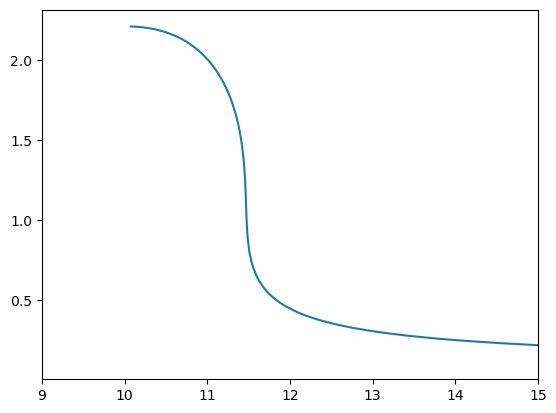

In [80]:
plt.plot(r_rust[:], m_rust[:])
plt.xlim(9,15)

In [75]:
k2 =  3/2 * lam_rust * (msol_mass_to_natural(m_rust))**5 / r_rust**5

In [74]:
c_rust = msol_mass_to_natural(m_rust)/r_rust

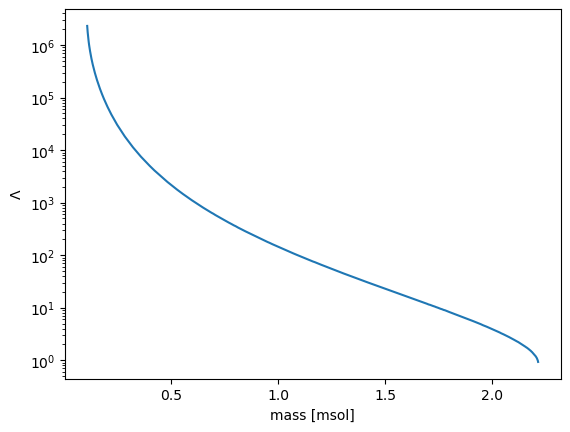

In [82]:
plt.plot(m_rust[:], lam_rust[:])
plt.yscale("log")
plt.xlabel("mass [msol]")
plt.ylabel(r"$\Lambda$")

#plt.ylim(-50,20)
plt.show()

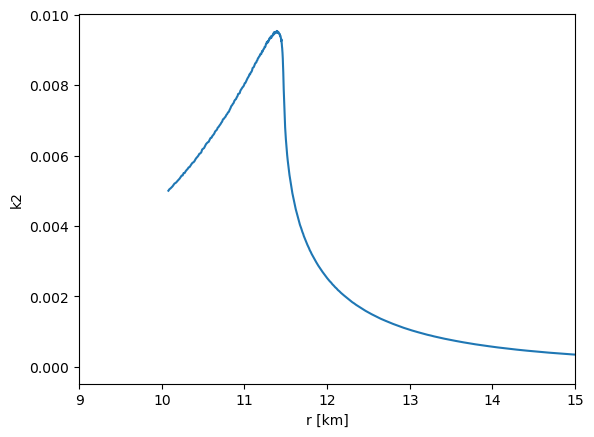

In [79]:
plt.plot(r_rust, k2)
#plt.yscale("log")
plt.xlabel("r [km]")
plt.ylabel("k2")
plt.xlim(9,15)
plt.show()

#### y func

In [68]:
m_rust = np.array([0.10955530563579637,
0.11009489812300752,
0.11064385315359189,
0.11120279366687096,
0.11177177638922552,
0.11235067260890717,
0.11293935174471835,
0.11353774667199391,
0.11414572093332248,
0.11476347787393737,
0.11539159204241642,
0.11603005165172385,
0.11667874850989393,
0.11733758983841382,
0.118006463882396,
0.11868524638121358,
0.1193745116916997,
0.12007465649853857,
0.12078555262524857,
0.12150712769084866,
0.12223933569588208,
0.12298199949896049,
0.12373519489327843,
0.12449968496059256,
0.1252754959602397,
0.1260625792659801,
0.12686079644349418,
0.12767002672647754,
0.12849021818354292,
0.12932189388307896,
0.13016555100799176,
0.13102101527702334,
0.13188826206245047,
0.13276708407207793,
0.13365740279033425,
0.13455960446228765,
0.13547431102154076,
0.13640155604244447,
0.13734122701205762,
0.13829316514249715,
0.13925730624435803,
0.14023373969099534,
0.1412233365961214,
0.14222614844460724,
0.14324201837727138,
0.14427087897546859,
0.1453125566928515,
0.14636713410716554,
0.14743547171031463,
0.148517646216263,
0.14961356709098625,
0.15072306405785882,
0.15184606443188212,
0.1529826341155341,
0.15413366143947402,
0.15529927965298537,
0.1564793239940991,
0.15767372970848997,
0.15888227698781954,
0.16010522545936323,
0.16134342425528014,
0.1625968221363681,
0.163865390866076,
0.16514880531702758,
0.16644704831194798,
0.16776064534357413,
0.16909028405839968,
0.17043591191503607,
0.17179729434393085,
0.17317430030507694,
0.17456687481363753,
0.17597592972469672,
0.1774017816328112,
0.17884419764958284,
0.18030299073636954,
0.1817780895963049,
0.18326975690379493,
0.1847789371174996,
0.1863054448214271,
0.18784913590894445,
0.18940988039717616,
0.19098758921231934,
0.19258328192511695,
0.194197289875081,
0.19582924506075666,
0.1974790437205145,
0.19914655331708309,
0.20083248556933556,
0.20253741059853508,
0.20426109763414504,
0.20600344205212406,
0.20776418853936715,
0.20954383084759876,
0.21134323810663147,
0.21316229206280965,
0.2150007560743272,
0.2168584667149783,
0.2187356763818052,
0.22063334190490638,
0.2225513849876609,
0.22448968010351542,
0.22644782825898546,
0.22842614900646616,
0.2304256805874954,
0.2324463350771683,
0.2344878375644694,
0.2365499664611117,
0.23863301249403587,
0.24073809686727815,
0.24286505830882638,
0.24501363002418983,
0.2471836409028582,
0.24937552398738572,
0.25159027324704203,
0.25382766927038974,
0.25608734022657326,
0.25836915726566856,
0.2606740323177711,
0.26300219535455716,
0.26535356083670575,
0.2677277339962861,
0.2701248466201232,
0.2725459054762652,
0.2749910822394635,
0.27746009279473866,
0.2799525145125147,
0.282469086127739,
0.2850104868698483,
0.2875765520519461,
0.29016689225778985,
0.29278137492806555,
0.29542133823452404,
0.29808675567189225,
0.3007774183409693,
0.3034929531855427,
0.30623396508808826,
0.3090012108480931,
0.3117944497614181,
0.314613414629131,
0.31745785520907444,
0.3203297586816212,
0.32322873261183205,
0.32615459365494015,
0.3291068932934584,
0.3320853611327232,
0.335089555412655,
0.3381190891827248,
0.3411736640520939,
0.34425657575460183,
0.3473690724186754,
0.35051092288780683,
0.3536816768696762,
0.35688115473858456,
0.3601087100942728,
0.36336413549032803,
0.36664691594978266,
0.3699589527128326,
0.3733020387416022,
0.3766757754105504,
0.38008001875445774,
0.3835141019431284,
0.3869776702217862,
0.3904702869115521,
0.39399147589261757,
0.3975429699670564,
0.40112676384300056,
0.40474230849578113,
0.4083892235320568,
0.4120671010542489,
0.4157752155133566,
0.4195135409678548,
0.4232810941956849,
0.4270813826665683,
0.4309160810890495,
0.4347846870478388,
0.4386863842054817,
0.4426211894544323,
0.4465884144888398,
0.45058716641079893,
0.4546180193504921,
0.4586841554952312,
0.4627859161676571,
0.4669229295043791,
0.4710943004661461,
0.47529986061550705,
0.47953883067602476,
0.483810718092148,
0.4881173347986905,
0.49246111292301825,
0.4968412612273005,
0.5012575486333105,
0.5057091772202373,
0.5101954450896327,
0.514715919474871,
0.5192707384329744,
0.5238635657765006,
0.5284941463939822,
0.5331619437119082,
0.5378662852796784,
0.5426063668580303,
0.5473818544298966,
0.5521921139065797,
0.5570401960661677,
0.5619266104452144,
0.5668501914318081,
0.5718108648560037,
0.5768073008770557,
0.5818389950308784,
0.5869057646678251,
0.5920115312578145,
0.5971567661970945,
0.6023409613298782,
0.6075632288718937,
0.6128227608992896,
0.6181186115111491,
0.6234508552485387,
0.628822333050754,
0.6342328830524833,
0.6396820603278964,
0.6451683841964837,
0.6506915792007424,
0.6562506304871841,
0.6618461083090345,
0.6674808968467355,
0.673154697020621,
0.6788666140822287,
0.684615432351274,
0.6904005603416501,
0.6962209944070573,
0.7020792607764311,
0.7079772257694515,
0.7139139069404979,
0.719888522959757,
0.7258997115020273,
0.7319467806418167,
0.7380299737109288,
0.7441526152049575,
0.7503140820850616,
0.7565137174487925,
0.7627500844576379,
0.7690224146110716,
0.7753299086791319,
0.7816750580047089,
0.7880578548598107,
0.7944777292147689,
0.8009336659954779,
0.807423976857995,
0.8139478580200612,
0.820507592470362,
0.8271039577399449,
0.8337359615972897,
0.840402840101333,
0.8471029340925237,
0.8538352652610574,
0.8606015447498293,
0.8674029513252987,
0.8742387935489678,
0.8811073149246818,
0.8880079514789943,
0.8949387113322874,
0.9019015578507779,
0.9088975803250712,
0.915925507184115,
0.9229840352245146,
0.9300715938487026,
0.9371874235427301,
0.9443338932474056,
0.9515114526684073,
0.9587191523646178,
0.9659553620339573,
0.9732188573078501,
0.9805091244209942,
0.9878283845295994,
0.9951765167715009,
1.0025520224932665,
1.0099531448867622,
1.0173791659611013,
1.0248300888220525,
1.0323075598709774,
1.0398102921681698,
1.047336448153897,
1.054884893368932,
1.062454734184751,
1.070049341241114,
1.0776680255215458,
1.0853093359920931,
1.092971760756931,
1.100654103170245,
1.1083565762448002,
1.116079642255874,
1.1238213773000032,
1.1315805555872263,
1.139355543064399,
1.1471467004852371,
1.1549563494518091,
1.1627830675809059,
1.1706252733578,
1.1784813041667093,
1.1863506832965145,
1.1942343421134334,
1.2021307613673713,
1.210038651895928,
1.217956262650751,
1.2258831920885647,
1.233821831012842,
1.2417715021044733,
1.2497296789778343,
1.2576953308782879,
1.265667954068168,
1.2736490217027596,
1.281637261594118,
1.289630602988145,
1.2976282863789292,
1.3056289951319044,
1.313633568641638,
1.321640472609117,
1.3296475665577272,
1.3376541580884105,
1.3456612248143855,
1.3536690893592338,
1.361676983647719,
1.369682388349644,
1.3776845813463583,
1.385686547716816,
1.3936874146717426,
1.4016849937892923,
1.40967821292613,
1.417665262951118,
1.4256445504737223,
1.4336141076849447,
1.4415720800570675,
1.449518102653011,
1.4574562551505674,
1.4653850463793854,
1.473303651841917,
1.481210193792107,
1.4891035016453438,
1.4969810103544074,
1.5048421665919791,
1.512684320414815,
1.5205089809485435,
1.5283191958254907,
1.536114292956068,
1.543892477276194,
1.551652609761702,
1.559392518126297,
1.5671110892280438,
1.5748065457426736,
1.5824774288778458,
1.5901266235737903,
1.5977541084659785,
1.60535779850257,
1.612937273275976,
1.6204898901967306,
1.6280147739467588,
1.6355100347900853,
1.6429746069033377,
1.6504113796360331,
1.6578211935600433,
1.665202821253466,
1.6725545725870403,
1.6798751014404991,
1.6871631785672636,
1.694417510945579,
1.7016360013570064,
1.7088220708659334,
1.7159744171172513,
1.7230923303133194,
1.7301742683013237,
1.7372186373557985,
1.7442243968437212,
1.7511900370619427,
1.7581157210632177,
1.765003498036196,
1.7718524643385392,
1.7786607997553754,
1.7854280937745546,
1.7921525044957103,
1.7988325088732007,
1.805468286609001,
1.8120620566884698,
1.818614076789192,
1.825123211635327,
1.8315876564887543,
1.8380068857481797,
1.8443799976252186,
1.850705474938499,
1.856984605207252,
1.8632171366742831,
1.8694024611481461,
1.8755389086041838,
1.8816260222824066,
1.8876626544053157,
1.8936474019442642,
1.8995826277364694,
1.9054692922439287,
1.9113056622224607,
1.9170904887098004,
1.9228239761259236,
1.928504244722031,
1.934130974779335,
1.9397065405423735,
1.94522930613351,
1.9506987573740286,
1.9561145169971625,
1.9614752482563624,
1.9667801237098588,
1.972030593126154,
1.9772273043915922,
1.9823689125400346,
1.9874553366576577,
1.992485357463541,
1.997458580293917,
2.002375311023999,
2.007236839386404,
2.012042137619586,
2.016791073580697,
2.0214832509708853,
2.0261177450977135,
2.030694382800531,
2.0352139288122224,
2.0396766478580166,
2.044081476263845,
2.0484281292105866,
2.052715737115683,
2.0569443797371467,
2.0611149453467728,
2.0652272247857275,
2.069280268374503,
2.0732739191724825,
2.077207569068028,
2.081082624322923,
2.084900193339267,
2.0886600552072143,
2.092362012238697,
2.096006255873623,
2.099592364833517,
2.1031205862311757,
2.1065911842131393,
2.110004149481257,
2.1133587379034195,
2.1166551172200805,
2.119892284932768,
2.123070803172055,
2.1261900970296925,
2.129248964337074,
2.1322483561101913,
2.135187059312982,
2.1380679699123077,
2.1408903291104844,
2.143654766594262,
2.1463615026785705,
2.149009607821113,
2.151601345297498,
2.1541368387401376,
2.156616792047916,
2.159040959324421,
2.161409019627647,
2.1637216086606004,
2.165977883282618,
2.1681782481125875,
2.1703226384773786,
2.172410611374634,
2.1744432582863515,
2.176419794251739,
2.1783411278650253,
2.180206971441766,
2.1820175610270818,
2.1837732808930252,
2.1854743125809795,
2.1871211868358245,
2.1887132236628704,
2.190251537511119,
2.191736880060038,
2.1931698915047537,
2.1945505973716233,
2.1958795980177106,
2.1971567094007396,
2.1983821544558686,
2.199556189219513,
2.2006784715486845,
2.2017495807702634,
2.2027702206244655,
2.2037409042220246,
2.2046621646550304,
2.2055342073200506,
2.2063578935019117,
2.207132063900554,
2.2078581240599444,
2.2085354943368225,
2.2091649585603044,
2.2097467055928943,
2.2102808758888406,
2.210767744041363,
2.2112079443040575,
2.2116016463632193,
2.2119504561199386,
2.212254380877885,
2.212513652893209,
2.2127287685861923,
])
r_rust = np.array([45.297128899353915,
44.23065046010474,
43.26190196622077,
42.395919974144995,
41.42697762841364,
40.54182314855365,
39.76742210305161,
38.89928245729163,
38.19458928047064,
37.400033426200224,
36.68561138814539,
36.07753352650344,
35.35012661400171,
34.69303977644238,
34.08799075937812,
33.511563523569095,
32.90851620663354,
32.37041938788837,
31.815738548152243,
31.30599427439857,
30.82533042410879,
30.342759148651833,
29.848783531457453,
29.382253252975115,
28.953121575896205,
28.510719406515523,
28.100009009421154,
27.70770670030438,
27.30489428031427,
26.92564492179131,
26.558891096404807,
26.206807081991673,
25.879982516883175,
25.53061331849425,
25.19590549646432,
24.879139627542425,
24.571243091329222,
24.267915684741325,
23.970827785781317,
23.691726752060102,
23.410214941541348,
23.14304427263415,
22.88120146411627,
22.62071918978727,
22.377391510570327,
22.133266664405202,
21.894833893207714,
21.663334585621847,
21.437159867088344,
21.218760870349943,
21.00461508324685,
20.79819792031454,
20.605079120196727,
20.393590351073072,
20.20472812430708,
20.015526410770455,
19.84011078920975,
19.65464777101226,
19.477994099328658,
19.306658149332684,
19.13707613032768,
18.974117723839104,
18.81453938780808,
18.657788519205244,
18.506183264428262,
18.35506699634547,
18.210349972419802,
18.069946779381656,
17.936131938418246,
17.791353653945983,
17.65830057835131,
17.528226688901448,
17.40191530520185,
17.27988649958175,
17.158991424954223,
17.036883011506827,
16.922283189492372,
16.80609530716882,
16.695321502533442,
16.586275129491245,
16.478464490979075,
16.371698599358417,
16.274987801919494,
16.16956890480842,
16.07521851631088,
15.974688109806639,
15.882696625349585,
15.790865505706341,
15.699272542382039,
15.610440519256613,
15.524962849574,
15.439797006570673,
15.355371642543785,
15.27865093377462,
15.196971194864489,
15.118823904173746,
15.041935395199236,
14.966482813105431,
14.895104131998808,
14.820845960077362,
14.749152050008355,
14.682415649198115,
14.615418363579693,
14.546609825200665,
14.483415268831768,
14.418815665838068,
14.356967410100701,
14.296270676171487,
14.234520111209035,
14.179133817146523,
14.118104118277273,
14.065114540576507,
14.006041811651968,
13.952223955254816,
13.901229643114474,
13.846860494517108,
13.794604997879896,
13.745493627361682,
13.698573519034877,
13.648645062555554,
13.600171343178813,
13.554333084703325,
13.50882326776034,
13.464036026722916,
13.419820280892976,
13.377255831953125,
13.335487388896452,
13.29404568509832,
13.256013682256299,
13.21357313107189,
13.174841007899735,
13.138188257784806,
13.099912864300157,
13.062678425084503,
13.02708521261203,
12.992421080415598,
12.958349151546328,
12.92573313771217,
12.892428021367396,
12.858035050957929,
12.82596942815422,
12.797984315572586,
12.764247253930707,
12.733789272263916,
12.706283090987986,
12.676180949018853,
12.647358234942578,
12.619693073341002,
12.592225468569291,
12.565780367102695,
12.539819056217453,
12.513679810704597,
12.489606149906752,
12.464825788727639,
12.4412720224328,
12.41658032030816,
12.393714005717447,
12.37048060721311,
12.349289256845163,
12.326653248450688,
12.304508615012427,
12.284616488084042,
12.264605061963051,
12.24335527743448,
12.223613421746755,
12.205425725191587,
12.185613697709345,
12.166691180756938,
12.14894561091175,
12.130547684726022,
12.113450819777608,
12.096496013874779,
12.079708819477649,
12.063079913239406,
12.0484286305723,
12.032076255665823,
12.016109215691584,
12.001050074100107,
11.986956903828085,
11.971997580617414,
11.95826261836304,
11.9444249551646,
11.931049653083175,
11.918448197838416,
11.905209679296723,
11.892284837265969,
11.880123940263827,
11.867917554860826,
11.855850591257665,
11.844710865857357,
11.833367955661886,
11.822159271410563,
11.811485296623998,
11.801330168790221,
11.790714690435834,
11.78089197848205,
11.771785953537204,
11.761816447984167,
11.75268217117367,
11.743659626198822,
11.73440383941234,
11.726228410057049,
11.717433752007368,
11.709431495014869,
11.700971355764501,
11.693287457437584,
11.686074207067165,
11.678207764450825,
11.670904071614709,
11.6643595894252,
11.65806495366307,
11.650389936037099,
11.645553871059311,
11.637768155090935,
11.632028068976766,
11.625673234432385,
11.619846926204719,
11.614590293343122,
11.609054067515011,
11.603844148634494,
11.598601802511174,
11.593673680532222,
11.588595027548022,
11.584198301192759,
11.579458763946874,
11.574909582675417,
11.570786156665775,
11.566783238512757,
11.562472774249647,
11.558534426307943,
11.554985537231444,
11.551209027739723,
11.547651703278685,
11.544338133571483,
11.541113675576108,
11.537831496411691,
11.53347386728172,
11.531750840871494,
11.52890950779614,
11.526344910557125,
11.523580395868857,
11.521134823015814,
11.51927401854756,
11.51631935437314,
11.514034421027308,
11.510597440994287,
11.509896900360562,
11.508025297958707,
11.505855503954997,
11.5042017017287,
11.50278896183026,
11.500557409606468,
11.498815895510363,
11.497423288124656,
11.495876137372274,
11.494540100624912,
11.49311895362877,
11.49172169294172,
11.490580398594526,
11.489242252209511,
11.48825326071111,
11.487891883707157,
11.486578022142888,
11.485186262488076,
11.4841739578841,
11.483308976259947,
11.48274633380862,
11.481634956489032,
11.4809348387189,
11.48003700777071,
11.47934551655761,
11.478658201972477,
11.477850721203339,
11.477570464028163,
11.476588496095994,
11.476480566198141,
11.475828466555562,
11.47493429675483,
11.474510798938894,
11.473986358637287,
11.473419358959168,
11.472805430295777,
11.472382494793942,
11.47185226264153,
11.471426935432639,
11.471178758828891,
11.470553324626609,
11.470027860894277,
11.4695335450644,
11.469243613665004,
11.468703122749329,
11.468067355298937,
11.467685827824393,
11.467106069680817,
11.46655596633637,
11.466003018469358,
11.465481457881953,
11.46491643290718,
11.464345001180611,
11.46379384844126,
11.463343832407983,
11.46258764252813,
11.461945596830018,
11.461136232873798,
11.46059291491401,
11.45971590667878,
11.458952877317898,
11.45819659474851,
11.457210602653259,
11.456411864059918,
11.45554577123481,
11.454477071620717,
11.453608672725842,
11.452798617264724,
11.451482858264983,
11.450292879355557,
11.449185699907714,
11.44803518960271,
11.446848603795592,
11.445504727851546,
11.444074552745054,
11.442707233564187,
11.441312773492555,
11.439865130887387,
11.438295829727343,
11.436716751574746,
11.435063567331968,
11.433304145865357,
11.431587351577974,
11.429798050981656,
11.42787385273816,
11.425992537243264,
11.424020135330537,
11.422000913699275,
11.41984221501247,
11.417728592077617,
11.41545882968081,
11.413113920734524,
11.41080222944941,
11.408257771203733,
11.405800767154112,
11.403137449956894,
11.400493046239006,
11.397765483102178,
11.39503532947036,
11.39213937655045,
11.389283994127014,
11.386462266854718,
11.383204177028427,
11.3800214547156,
11.376812050877131,
11.373545146816971,
11.3701846777508,
11.366739091368506,
11.363186939707868,
11.359641297340746,
11.355881194040272,
11.352097200187295,
11.348282259011283,
11.344382888757377,
11.34043470909122,
11.336466292915645,
11.332159683073755,
11.327877875612055,
11.323606735421746,
11.319204647501461,
11.31486905190859,
11.310217662430764,
11.3056469663849,
11.300937129963607,
11.296095798140017,
11.291149742143281,
11.28631554077883,
11.281043268374619,
11.275979266487282,
11.270881118032438,
11.265426118469147,
11.260043779106804,
11.254597551991186,
11.249062218728845,
11.24359548139031,
11.23769349360083,
11.23189197413294,
11.226094752399087,
11.220054533774114,
11.213984082212294,
11.20783420860795,
11.201611520550731,
11.19531886749579,
11.189042322592652,
11.18248163143101,
11.17591972412017,
11.169326089125494,
11.162556384813449,
11.155898776670188,
11.148913062305002,
11.142062452604199,
11.134925650405293,
11.127798756574462,
11.120540280012547,
11.113275550339553,
11.105949602001834,
11.098479469869929,
11.090961002321022,
11.083385664337406,
11.075776265132477,
11.06786232910903,
11.060074479625271,
11.052191007326604,
11.044112713350575,
11.036131078389317,
11.027887168060403,
11.01976596126421,
11.011390002937015,
11.003001322331185,
10.994586526426714,
10.986035636997297,
10.97739657860679,
10.968732107822039,
10.959988578255915,
10.951164572131294,
10.942255572791689,
10.933377928150213,
10.924238073148086,
10.915148472235453,
10.905967064345623,
10.896709469152677,
10.88737994092987,
10.87803216499693,
10.868566012594785,
10.859136567933469,
10.849439672455446,
10.83980251168349,
10.830074996934492,
10.820289093800184,
10.810479113639527,
10.800519966340126,
10.790570755975953,
10.780603130579687,
10.770405546558722,
10.760273832589823,
10.750177772625001,
10.73979591201638,
10.729452580381967,
10.719087733283319,
10.708602071072358,
10.698053935146099,
10.687559513111042,
10.676906636855453,
10.66623648346943,
10.655514510337746,
10.644826379526297,
10.633899339598674,
10.62303647193214,
10.612113951048265,
10.601079418342602,
10.59009484240831,
10.578957081655842,
10.567901351394124,
10.556670018012309,
10.545412633334232,
10.534149132221637,
10.522807299553024,
10.511456296005385,
10.500045006878619,
10.488605431259733,
10.477110185471853,
10.465576419829752,
10.45400685728675,
10.442398937073134,
10.430746869990422,
10.419105766299646,
10.407384580330707,
10.395627238773512,
10.38382131791593,
10.372066151457132,
10.360184420525162,
10.34824037641549,
10.336292861713556,
10.324335506353373,
10.312344372842686,
10.300310968744647,
10.288347879296083,
10.276196466272456,
10.264085641595086,
10.25192428786772,
10.239764542528322,
10.22758884599164,
10.215405215755384,
10.203163859971447,
10.190878362178921,
10.17860669194584,
10.166349561286374,
10.153988774542096,
10.141702531664423,
10.129270309690302,
10.116923354290506,
10.104493236602647,
10.09207485018751,
10.079624952695953,
])
lam_rust = np.array([2.0071733897257724,
2.007383336316464,
2.0075865550367573,
2.0077817384107766,
2.008004739928289,
2.0082219353423683,
2.008426492187328,
2.0086606603697295,
2.008867868247862,
2.009105339326155,
2.0093337951243093,
2.009544810073858,
2.00979506531275,
2.0100363279368585,
2.0102728883406296,
2.0105098294643655,
2.010764149038595,
2.011006565972983,
2.0112639249809705,
2.0115153460740016,
2.011764586813048,
2.0120233572943196,
2.0122958961026263,
2.0125671049183915,
2.0128317106853113,
2.013110705755548,
2.0133850339392567,
2.0136595778754893,
2.0139473512948802,
2.014232695617145,
2.0145207932269416,
2.0148098803147643,
2.015093062081125,
2.0153981063391515,
2.015703229849358,
2.016006278796887,
2.0163128472018252,
2.0166246522595332,
2.016941576889723,
2.01725479277294,
2.0175779711878015,
2.017899923865201,
2.018225738545922,
2.0185588253498286,
2.018887512929327,
2.019224792999882,
2.0195657793393496,
2.0199091390989077,
2.020256592510805,
2.0206055410135337,
2.0209582640705173,
2.0213121877837765,
2.0216615276117955,
2.0220366334457833,
2.0223979945626,
2.022767014193465,
2.023128820471938,
2.0235104449226697,
2.0238895355558957,
2.024270003292826,
2.024656409892065,
2.0250437498410245,
2.0254352816959686,
2.025830019834027,
2.0262261147865357,
2.0266287037065074,
2.0270312054945454,
2.027436041107698,
2.027837714564354,
2.028262814750942,
2.0286791239643835,
2.0290974513404145,
2.029518959724468,
2.0299408308042852,
2.030369774159841,
2.0308030854279795,
2.0312357299282326,
2.031675271850184,
2.0321148643340874,
2.032559308805002,
2.033006158647397,
2.033457863611841,
2.0339029799753194,
2.034365939767867,
2.0348183978386896,
2.035284537228214,
2.035748832767604,
2.0362146397448253,
2.0366838902626427,
2.037162818630433,
2.037634036859976,
2.038114367113588,
2.0385929077198153,
2.0390732880925535,
2.0395607948380876,
2.040053603739922,
2.040546494216285,
2.041041303881327,
2.041535045405935,
2.042042172008686,
2.0425408519018196,
2.043047112205486,
2.0435524408718466,
2.044066106981764,
2.0445777906345737,
2.0450935831408232,
2.045618424496798,
2.0461340460990423,
2.0466554022426937,
2.0471769715146673,
2.047711895456522,
2.0482423622194412,
2.0487825237009463,
2.049303855285742,
2.0498424587853505,
2.0503943068060226,
2.0509376417146687,
2.0514815397518094,
2.052012189428878,
2.052573508894865,
2.053129266998364,
2.0536729218042127,
2.054233594441755,
2.0547993594255263,
2.0553588265713247,
2.0559249849446686,
2.0564831738182527,
2.05705517337707,
2.057605438581755,
2.058202960757757,
2.058772870023392,
2.059344169076451,
2.0599194578270197,
2.0605079944420788,
2.061090962414846,
2.061670713100605,
2.0622628403231884,
2.062861367311376,
2.0634373236308723,
2.064014102657725,
2.064619883631555,
2.065230250287712,
2.0658118495370363,
2.0664120801816668,
2.0670201023545642,
2.067629540865151,
2.068249565436075,
2.0688427144574155,
2.0694478647821395,
2.0700749308524338,
2.0706815134849372,
2.0712888951075534,
2.0719159202804054,
2.0725519767434357,
2.073146835928713,
2.0737231372137175,
2.074397190654026,
2.07501885349799,
2.075679450876328,
2.0762664524094308,
2.0769418967669413,
2.077561027507398,
2.0782278395922615,
2.078814081633687,
2.079470097701548,
2.0801065614475385,
2.080756543691968,
2.0814101054778646,
2.0820187400077144,
2.0827320950666532,
2.0832951356920932,
2.0840281509420198,
2.0846290053181726,
2.085333958714308,
2.0859351920954063,
2.0866722169784877,
2.0873256973351735,
2.0879889529672497,
2.0886525406272947,
2.0893018489655875,
2.0899940246357755,
2.09066073125193,
2.091328046842729,
2.092028141380097,
2.09269591047108,
2.0934107401317874,
2.0941039439106253,
2.0947638544278098,
2.0954159996498665,
2.096200358036009,
2.0968811749851315,
2.09748843819174,
2.0982849708716373,
2.098917598635204,
2.0997149313330596,
2.100291896734913,
2.1011063888925126,
2.101801174043464,
2.1025074650206284,
2.1032079302285216,
2.1038872908243804,
2.1047293365650437,
2.1054139657853668,
2.105983405951417,
2.1068071725635598,
2.107446630791246,
2.10822018116142,
2.108981828655628,
2.109844369618875,
2.1105310807627524,
2.111290381910611,
2.1119802830840912,
2.112708182851754,
2.113460074492234,
2.114246614743893,
2.1149917133296174,
2.115721548505931,
2.1164462431109774,
2.1172023873935237,
2.1179886094631337,
2.118859244011381,
2.119626836919677,
2.120274564773121,
2.120918113317456,
2.121878989508886,
2.122525338739812,
2.1235451644409853,
2.1242373064093885,
2.1246400828019274,
2.1258045248857496,
2.126595632829661,
2.1273187319039244,
2.1280621109878,
2.1289659651584665,
2.129753898426537,
2.13062585997127,
2.131287617689087,
2.132220948406086,
2.1330365323698133,
2.1338577195737245,
2.13471955921569,
2.1353574063097467,
2.1362147729894336,
2.137373946462906,
2.138146424444294,
2.138422257204213,
2.1398893167967525,
2.1408127594470105,
2.1413367173231106,
2.1423513757431416,
2.1433685671220504,
2.144231028283164,
2.1450350792729047,
2.145769147321318,
2.146923319121737,
2.1478645649138715,
2.148486994290231,
2.1495632630868315,
2.150204935723187,
2.1513745571439498,
2.1520591994029843,
2.1528166773365793,
2.1540153148717733,
2.1549192648140822,
2.1552987584967984,
2.1563522363330576,
2.157754513837961,
2.1588496373927457,
2.1593285236631417,
2.160693742771697,
2.16168000855746,
2.1625290065696636,
2.1633559480188,
2.164342429249019,
2.1653730925579397,
2.1659621259787207,
2.1675426041263317,
2.167768688705643,
2.169287890307017,
2.1699450227939217,
2.1719059141302957,
2.172698395750546,
2.1738696698626074,
2.1749810499605253,
2.1755337690007703,
2.177096601904559,
2.1779441686580236,
2.1785081949154095,
2.1798510912564124,
2.1809320842535227,
2.1823082060068435,
2.183621166076023,
2.184061832625,
2.1859310968691603,
2.1869700667312895,
2.1883018305883573,
2.1883860142478735,
2.189849119437031,
2.190733011628296,
2.1924054070384527,
2.1936414317303874,
2.1944537434006044,
2.1957210888995027,
2.1975192584532675,
2.1981073105976052,
2.1994087104367788,
2.2009426550026254,
2.2022787701090607,
2.2027629017400114,
2.204158927837883,
2.205703836704599,
2.2074470748347896,
2.208542428099288,
2.210250615525343,
2.2112286623233874,
2.211636748738947,
2.213608165860778,
2.2148479359750697,
2.2147934478772875,
2.218165938538062,
2.218103393736083,
2.220250645348301,
2.2217072458266705,
2.223435386025796,
2.2245207766781103,
2.2256503841367548,
2.227213524655865,
2.2293286293808867,
2.2306537017307675,
2.231760766717821,
2.2337419769901277,
2.234873468027883,
2.2370242702657066,
2.2381111444349058,
2.23964091189892,
2.2411462047854216,
2.242574276563576,
2.243992858722173,
2.245831493734023,
2.247395902011334,
2.2485797279628823,
2.25124170684341,
2.2523103515578584,
2.253996564939675,
2.2566447526386533,
2.2563154526242095,
2.258661078908126,
2.260244026928514,
2.2629902689089825,
2.26440989428564,
2.2666646479332746,
2.268420647338972,
2.270510902410921,
2.2707411635968713,
2.27428871246928,
2.275731328118717,
2.275661462301157,
2.2786783160667485,
2.2824770469493063,
2.282798856725324,
2.2858203123769854,
2.2874595698501268,
2.289640003852062,
2.2908652330176733,
2.294998906077596,
2.294162962835325,
2.297309093172276,
2.299429481846673,
2.3000208702857834,
2.3038848188036942,
2.3049204091072624,
2.3088253508722354,
2.3112108272395817,
2.3113861938583566,
2.3155473041408534,
2.314721177132413,
2.3187246468779126,
2.3201454037567677,
2.324868974058671,
2.327422802746063,
2.3281696559861302,
2.3322644694576455,
2.3338785179065047,
2.3363630736712286,
2.3400944545372995,
2.3402265169036762,
2.3441232005431307,
2.3479357279737245,
2.3480525992377523,
2.3502111760417677,
2.3540614360388705,
2.355803155609842,
2.3588309517552757,
2.3605836082481786,
2.3648298953213756,
2.3669977703725955,
2.371144532817088,
2.3723262401079914,
2.3747796157753007,
2.37881131084425,
2.3826634510507403,
2.3844558634054844,
2.3862155306742854,
2.392143202547662,
2.395698033193671,
2.3972838324207997,
2.401916635919952,
2.402511247801532,
2.4071918414639346,
2.4100011099734804,
2.4130457907472214,
2.417012443573539,
2.421211352362494,
2.4247821088016757,
2.4259441672631805,
2.430951726297145,
2.4346848270252073,
2.436629551881307,
2.439670826238493,
2.4428208435315533,
2.446081542533537,
2.45267488916162,
2.454626435720641,
2.455323833932263,
2.4615940664010303,
2.4650133461765478,
2.469970251475147,
2.471762898961452,
2.4749317064722347,
2.480989189400592,
2.4837909463600867,
2.4878204736505576,
2.490515189571445,
2.496638222070665,
2.5013361399975116,
2.5072540457452894,
2.508998868293865,
2.514013267222737,
2.5167760882069445,
2.5223077502925144,
2.524983992011533,
2.528995478515921,
2.530454562982794,
2.537846909755782,
2.5415911046550654,
2.5465997539902743,
2.550197693829003,
2.5548477353811365,
2.5574413216077643,
2.564298140284919,
2.567568295720748,
2.57039967710254,
2.5777432347956313,
2.5820712430722073,
2.585655622462063,
2.592138255936801,
2.5926921131271263,
2.5988706322316473,
2.6064362022002907,
2.6084821633220217,
2.611549372212268,
2.6155051489048198,
2.6225038418275726,
2.62973929874983,
2.6325553480340806,
2.6352441569939296,
2.6462865556629036,
2.6506450142186093,
2.652068788370188,
2.659299042271882,
2.6643895451573174,
2.6685201178211075,
2.6741350059470212,
2.6817771411262643,
2.6867124069920876,
2.68867433829501,
2.6938982709809447,
2.7006701272731344,
2.7071783232417714,
2.708755334183319,
2.7156321761555984,
2.7201869724812218,
2.725792945845205,
2.7338678710217343,
2.7340117238392696,
2.744970857853941,
2.745745057361984,
2.7526382024317493,
2.759956287674937,
2.7649586530407744,
2.770546611247848,
2.7764245120683553,
2.7811653025388066,
2.7836439542051137,
2.7904969738598044,
2.7981948047637806,
2.8033055824348105,
2.8086572829871193,
2.8127464589227524,
2.8204682625630966,
])

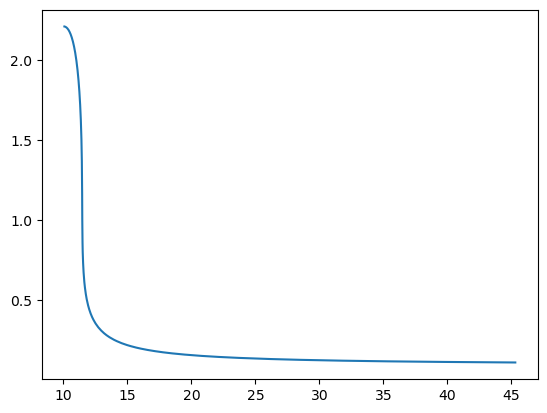

In [69]:
plt.plot(r_rust,m_rust)

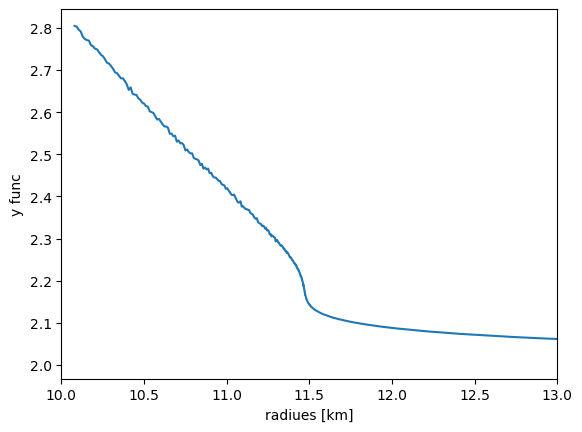

In [ ]:
plt.plot(r_rust, lam_rust)
plt.xlabel("radiues [km]")
plt.ylabel("y func")
plt.xlim(10,13)
plt.show()

# R0 ~ e-6

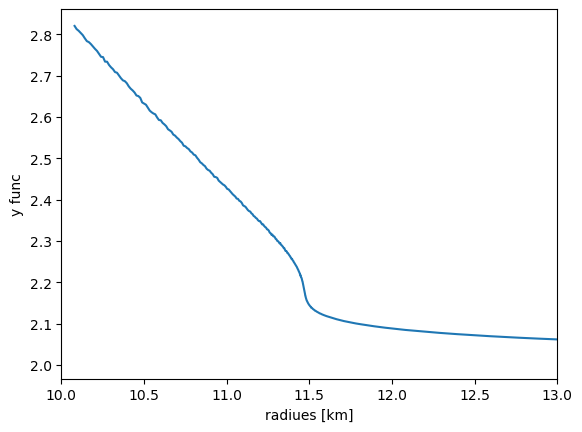

In [70]:
plt.plot(r_rust, lam_rust)
plt.xlabel("radiues [km]")
plt.ylabel("y func")
plt.xlim(10,13)
plt.show()

# R0 ~ e-8

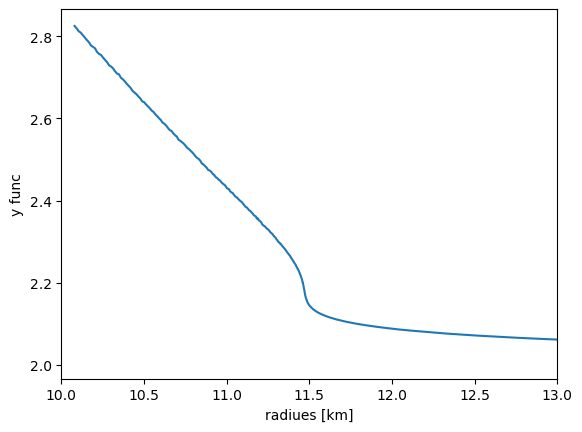

In [ ]:
plt.plot(r_rust, lam_rust)
plt.xlabel("radiues [km]")
plt.ylabel("y func")
plt.xlim(10,13)
plt.show()

# R0 ~ e-6

#### single p_c

In [42]:
m_rust = np.array([0.000000000000010000000000000002,
0.000000000000010000000000000002,
0.000000000000010000000000000003,
0.000000000000010000000000000005,
0.000000000000010000000000000008,
0.000000000000010000000000000011,
0.000000000000010000000000000017,
0.000000000000010000000000000027,
0.000000000000010000000000000041,
0.000000000000010000000000000065,
0.0000000000000100000000000001,
0.000000000000010000000000000155,
0.000000000000010000000000000245,
0.000000000000010000000000000387,
0.000000000000010000000000000618,
0.000000000000010000000000000997,
0.000000000000010000000000001622,
0.000000000000010000000000002663,
0.000000000000010000000000004419,
0.000000000000010000000000007407,
0.000000000000010000000000012562,
0.000000000000010000000000021547,
0.000000000000010000000000037417,
0.0000000000000100000000000658,
0.000000000000010000000000117252,
0.000000000000010000000000211814,
0.000000000000010000000000388134,
0.000000000000010000000000721847,
0.000000000000010000000001363352,
0.000000000000010000000002616652,
0.000000000000010000000005106786,
0.000000000000010000000010141851,
0.000000000000010000000020510437,
0.000000000000010000000042272522,
0.000000000000010000000088863417,
0.000000000000010000000190697583,
0.000000000000010000000418139817,
0.000000000000010000000937715998,
0.000000000000010000002152969655,
0.000000000000010000005066291876,
0.000000000000010000012232761074,
0.000000000000010000030343539142,
0.000000000000010000077423368143,
0.00000000000001000020348476372,
0.000000000000010000551659658161,
0.000000000000010001545089119178,
0.000000000000010004477987905861,
0.000000000000010013452620125017,
0.00000000000001004196810298006,
0.000000000000010136227203019828,
0.000000000000010461038288444883,
0.00000000000001163039251090635,
0.00000000000001603869988707037,
0.000000000000033483878291110306,
0.00000000000010614345886247331,
0.00000000000042554294972925754,
0.0000000000019117802118120603,
0.000000000009255656652510004,
0.000000000047916466481655435,
0.00000000026523181718370335,
0.0000000015401679801570055,
0.000000006832208213187508,
0.000000023161616909856563,
0.0000000659992152382346,
0.00000016174053849411668,
0.0000003531233936612239,
0.0000006993593761247442,
0.000001279283140583706,
0.000002188599574595749,
0.000003540349781928598,
0.000005461501068416868,
0.000008092573429852128,
0.000011585685244525371,
0.000016104965162248287,
0.000021826702653585135,
0.00002894102865717354,
0.000037653755373735906,
0.00004818903568826006,
0.00006079217704410065,
0.00007573281471964197,
0.00009330815571500671,
0.00011384635977203726,
0.0001377099562227372,
0.00016529933180801714,
0.00019705626899519705,
0.00023346756151474522,
0.00027506871298387225,
0.0003224477391941018,
0.0003762490832105845,
0.0004371776569833296,
0.000506003016568744,
0.0005835636766031405,
0.0006707715672868478,
0.0007686166347910159,
0.0008781715829678465,
0.0010005967552368837,
0.0011371451451936058,
0.0012891675345657544,
0.0014581177466889788,
0.0016455580032668903,
0.0017583885828247414,
0.0018899342096757388,
0.0020997783727049984,
0.0023008238206724376,
0.0025463565893535356,
0.00280956497299643,
0.0031084106646174677,
0.0034360268370671374,
0.0037995434514882633,
0.004198593294844499,
0.0046371951826421455,
0.0051172194678190735,
0.005358078376408253,
0.0055404524757659635,
0.005792613926959751,
0.006044090273190404,
0.006598467475993501,
0.007053421448916244,
0.007653691625529652,
0.008269706422600866,
0.008978476345637825,
0.009741740626247304,
0.010107642757358358,
0.010420959931985935,
0.010758560310126538,
0.011072069135355465,
0.011911858600355048,
0.012553660347216613,
0.01344703730643625,
0.01434981396106362,
0.015403428144951159,
0.015956733378101377,
0.016445718342611403,
0.016898951403925496,
0.01808759998017624,
0.01899629684117162,
0.020249388404064782,
0.021509935624976308,
0.021964975944847205,
0.02360860644438912,
0.024614152572945313,
0.02622077741656766,
0.027717600331155445,
0.028147613891825105,
0.028825697449451803,
0.02950230363989897,
0.03130997506214585,
0.03267748588581919,
0.03456973822211353,
0.03587866083901124,
0.03713706619116385,
0.039597398628138845,
0.0407023155865444,
0.0418429613912308,
0.04295257132919744,
0.04554355197892526,
0.04626600941152949,
0.046888175991144074,
0.04717145201907342,
0.04743688319099082,
0.04877097643363023,
0.04971767195034319,
0.05136206877338373,
0.05306462247843175,
0.05370138880675244,
0.0542836220401215,
0.056782960016744294,
0.058393695845369534,
0.05935307290414059,
0.0600414559520554,
0.06068866072953238,
0.06327699043737288,
0.06497012993487489,
0.06606370514818509,
0.06692740741019085,
0.06771582846149125,
0.07039641862552627,
0.07221919740580565,
0.07267194492499116,
0.07333333591433398,
0.0739954401185604,
0.07642932976135797,
0.07804838482290136,
0.07885293667390746,
0.07939983837143356,
0.08024538581366486,
0.08108275955017927,
0.08358040535859268,
0.0853298552594214,
0.08602348024986117,
0.08660057569371615,
0.08716239318913568,
0.08920167353651332,
0.0905721057113458,
0.09259517405748702,
0.09302570327513501,
0.09337632645388129,
0.09371152269676869,
0.09537585719974681,
0.096396888168333,
0.09806071632337378,
0.0996408233506393,
0.10004573800197093,
0.10036866521148548,
0.10066775313857235,
0.10215420689889228,
0.10306700431136613,
0.1045560142877578,
0.1059697191264251,
0.10651643260293348,
0.10711702771191756,
0.10751725535403737,
0.10789456762288085,
0.1093878605649672,
0.11035125827985173,
0.11180697570778489,
0.11318309798828152,
0.11379008168490559,
0.11437329411152188,
0.11474451867738737,
0.1151182979521786,
0.11640637320216092,
0.11728405215054506,
0.11855952346717182,
0.11977651670337428,
0.1211609376332699,
0.12171517770322744,
0.12219579252580551,
0.12268579273928522,
0.12397586792604223,
0.12489739303270918,
0.12611626937536363,
0.1272673165370838,
0.12852375131822566,
0.12894707659943974,
0.12936622007631435,
0.12965489223578294,
0.12992481250021498,
0.13085668643371218,
0.1314738251547049,
0.13236353348268923,
0.13319961836628516,
0.13414261070387848,
0.13508917939568255,
0.13607611720390284,
0.13706955279818528,
0.13717943825765913,
0.13730119314247052,
0.13787269450049708,
0.13822660374198822,
0.13879236041916912,
0.13932594630017334,
0.13995368339986977,
0.1405923299642413,
0.14127188347787795,
0.14196331025889347,
0.14267001707037927,
0.14338049240345013,
0.1440925355238886,
0.14429325768944298,
0.14449491330636752,
0.14467122233799184,
0.14474250297024044,
0.14478769673454744,
0.14483067354267834,
0.14504352276670573,
0.14518853833789416,
0.14543228127713512,
0.14567445056988432,
0.1459694868261304,
0.14627876682615812,
0.14661506933016438,
0.1469630856474125,
0.14732316831084102,
0.1476883824966848,
0.14805659314996542,
0.14842422807959005,
0.1487893698288245,
0.14915008143601188,
0.14950512109432312,
0.14985346732128887,
0.1501944470357048,
0.15052757968832164,
0.1506837720717612,
0.15080302040201188,
0.15094383687783183,
0.1512105408694842,
0.1514235235997087,
0.15167864489427593,
0.1519224539806141,
0.15217875157206226,
0.1524319190810748,
0.15268698419138377,
0.15293911305794555,
0.15318891763365886,
0.15343471815280216,
0.15367632115662172,
0.15391307961123343,
0.1541447944206748,
0.15437122239796097,
0.15459227929550032,
0.1548079086620183,
0.15501812109818347,
0.1552229552109409,
0.15542248118143182,
0.15561678689290034,
0.15580597530271348,
0.1559901584602483,
0.1561694548452062,
0.15634398639386135,
0.15651387670148384,
0.15667924943856823,
0.1568402272758231,
0.1569969310311207,
0.15714947906806845,
0.1572979868483992,
0.15744256661935335,
0.15758332719279086,
0.1577203737981981,
0.1578538079865598,
0.1579837275731153,
0.15811022660418103,
0.1582333953421981,
0.1583533202570899,
0.15847008402134413,
0.15851089105734464,
0.15851987391778632,
0.1585232133965754,
0.1585264092429684,
0.15854226242020547,
0.15855434053141174,
0.15857534433908854,
0.1585973744824793,
0.15862500858360826,
0.15865483482698503,
0.15868789369465777,
0.15872264973998898,
0.15873690161977802,
0.1587505705416005,
0.15878577498025265,
0.15881052245287744,
0.15884278461155965,
0.15887272234147207,
0.15888838336356642,
0.1589085436723798,
0.15892733547726162,
0.15896045602444725,
0.15898589445439387,
0.15899781274504546,
0.15900882112737297,
0.15901969922998133,
0.15903009072913457,
0.15905447748289897,
0.15907208369123688,
0.1590943679248979,
0.15909927099086843,
0.15910215881969614,
0.15910384983413609,
0.15910484723011106,
0.15910548762285934,
0.15910599722485094,
0.15910625741933504,
0.15910640514856322,
0.15910647899719688,
0.15910684808413011,
0.1591068875134172,
0.1591070850658936,
0.15910738555124246,
0.15910799303736733,
0.15910888806293946,
0.15911023495113236,
0.1591120379493647,
0.15911439279886821,
0.1591173121169207,
0.15912084421845493,
0.15912500287255957,
0.1591298141765649,
0.15913529220949021,
0.1591414554793054,
0.15914831926180015,
0.15915590095083754,
0.15916421779051884,
0.15917328851524373,
0.1591831326797941,
0.15919377110722144,
0.15919620971310655,
0.15919751472186722,
0.1591982587048231,
0.1591990993315022,
0.15920019664500687,
0.15920105822962727,
0.1592019266030826,
0.1592026886496574,
0.15920340030745386,
0.15920403876975467,
0.15920461922763263,
0.15920513975635556,
0.15920528118787444,
0.15920540626451554,
0.15920551970635652,
0.15920608650035037,
0.15920714759148497,
0.15920926580263198,
0.1592126067139027,
0.15921762952342633,
0.15922439240062686,
0.15923302261867678,
0.1592433792475502,
0.15925531082979594,
0.15926006369681603,
0.15926348528768794,
0.15926635837973474,
0.15926855703186482,
0.15927175305345684,
0.15927421240851095,
0.1592773119185208,
0.15927947974210674,
0.1592902528770008,
0.15929458472710759,
0.15931609133991376,
0.15933103541769203,
0.15935639236865065,
0.15938194578191434,
0.1594134472166687,
0.15944691491087523,
0.1594837884123651,
0.159522482082031,
0.15956309152204545,
0.1595767480550116,
0.15958944754118132,
0.15960091827971143,
0.15963724139111626,
0.15966183760219044,
0.1596964369825162,
0.15972904063354884,
0.15976558934066706,
0.15980233407999214,
0.15984070553982258,
0.15987076020248567,
0.15991587136897611,
0.15995423300106432,
0.15999709415127952,
0.1600384661695409,
0.16005183449740262,
0.16006446295595728,
0.16007518550405447,
0.16008734118877022,
0.16011556749548103,
0.1601367061188018,
0.1601637504492539,
0.16017458466380533,
0.16018434597959727,
0.16021171365560405,
0.16023080832801756,
0.16025661596710347,
0.1602764438109528,
0.1603049809227157,
0.16033021003595296,
0.16035821487118793,
0.1603855698162081,
0.16039579953740113,
0.1604035142520721,
0.16040732728011078,
0.1604109525653508,
0.16042893495498647,
0.16044052452489624,
0.16045975688664046,
0.16047845783745934,
0.1605010874415984,
0.16052468742877518,
0.16055038730368423,
0.16057710142421447,
0.16058793759277248,
0.1605936189689909,
0.16059877122893115,
0.16062004996796703,
0.1606335327779063,
0.16065422063557133,
0.16067372945042255,
0.1606963960644365,
0.16071946042924623,
0.16074398815948776,
0.16075061868940815,
0.16075504889933973,
0.16075914682416462,
0.16077744462860116,
0.1607887881068467,
0.16080662604382706,
0.16082342004390807,
0.16084311053843,
0.16086318200609104,
0.16088460950980388,
0.16089441119366552,
0.1608989861772583,
0.16090333066594703,
0.16092031802700496,
0.16093122263916684,
0.160947650177421,
0.16096312826763998,
0.1609809665710187,
0.16099905750722202,
0.16101820407994827,
0.161020892423934,
0.16102379109244302,
0.16102741213110103,
0.16104007119515434,
0.1610486010156029,
0.1610610582184159,
0.1610728942164105,
0.1610863836673225,
0.1611000427396808,
0.161104843586452,
0.16111131886511332,
0.1611160779774745,
0.16112106583952443,
0.16113558727122046,
0.16114577286410703,
0.16115977195984002,
0.16117306540669712,
0.1611878668125579,
0.16120276960447602,
0.16120930794491126,
0.16121503791410874,
0.16122238031638955,
0.16123534913575974,
0.16124634001601942,
0.1612594179211579,
0.16127224580085286,
0.16128585582672023,
0.161291844868984,
0.16129644031591345,
0.1612986344197091,
0.16130079200572006,
0.16130922886129298,
0.16131472462005722,
0.16132303414350713,
0.1613309026978445,
0.16133998485674272,
0.16134920099180483,
0.161358945831044,
0.16136091348306283,
0.16136277962540854,
0.16137123207755869,
0.16137644506954177,
0.16138467395095812,
0.1613924067381235,
0.1614014753098044,
0.16141070436328725,
0.16142054445728546,
0.16142388637399474,
0.16142716309239133,
0.1614304665484341,
0.1614393199818859,
0.16144564093159483,
0.16145408670350136,
0.16146208927560582,
0.1614708885223815,
0.16147970074745077,
0.16148394089843846,
0.16149241410720558,
0.1615001630263185,
0.161508535172918,
0.1615167558079665,
0.16152514494282136,
0.16152891307773495,
0.16153099518798728,
0.16153299215093758,
0.16153912833807596,
0.16154337066153387,
0.1615492998745734,
0.16155491777212058,
0.1615612043281007,
0.16156752928010135,
0.1615702927489706,
0.16157127527895548,
0.161572209042313,
0.16157631467604952,
0.1615788803430456,
0.16158289590877503,
0.16158667085113346,
0.1615910765730341,
0.1615955449744699,
0.16160028632125456,
0.16160297320023642,
0.1616053872747562,
0.1616107170079684,
0.1616146685880508,
0.16161960870868813,
0.1616242614424271,
0.16162923085972467,
0.1616341482389071,
0.16163915231336562,
0.16164413239915115,
0.1616491122814168,
0.16165405505097005,
0.1616553140283241,
0.16165601827851236,
0.161656680112691,
0.1616595947316359,
0.16166140954885322,
0.16166425017424535,
0.16166691650454038,
0.16167002806703942,
0.16167318230083558,
0.16167652956698558,
0.16167993232754083,
0.16168341163758834,
0.1616869146937151,
0.16169043422971038,
0.16169394663972447,
0.16169441360992007,
0.1616948588673556,
0.16169693415986458,
0.16169820670209323,
0.16170023533578637,
0.16170213639490286,
0.1617043692751419,
0.16170663386415793,
0.1617090421938205,
0.1617114907158471,
0.1617139949041665,
0.16171651470645923,
0.1617190444352492,
0.16172019264564733,
0.16172079645102025,
0.16172136357548708,
0.16172320294677547,
0.1617244289118888,
0.16172616180621058,
0.16172777935756646,
0.16172958697575812,
0.16173009069364466,
0.1617308072240787,
0.1617314946995805,
0.16173285443252453,
0.16173387255569793,
0.16173509105724426,
0.16173533592223277,
0.16173644765672948,
0.16173688642000963,
0.1617382646513147,
0.16173919706577738,
0.16174050435027834,
0.161741728075869,
0.1617422263324269,
0.16174373962892613,
0.1617444218434446,
0.1617458047228277,
0.1617468357821171,
0.16174808345397443,
0.16174924436795876,
0.16175046105499707,
0.16175164814669524,
0.16175219225612922,
0.1617526331621088,
0.16175304578293442,
0.16175398614114442,
0.16175467100343832,
0.16175553276272667,
0.16175633459261227,
0.16175718681900733,
0.16175802003760503,
0.16175885919776983,
0.16175905772376065,
0.16175923515140506,
0.16175979942051402,
0.16176016917921288,
0.16176068413584632,
0.1617611557919152,
0.1617614874729535,
0.16176208045568327,
0.161762537008291,
0.16176306543961025,
0.1617635540830307,
0.16176405376401098,
0.16176453382974354,
0.16176500573828523,
0.16176525822834784,
0.16176541119669466,
0.16176555129089581,
0.16176567813184028,
0.16176599858693197,
0.1617662169886503,
0.1617664968590302,
0.16176674935172275,
0.16176701535489024,
0.1617672692544479,
0.16176752015978313,
0.1617676177928785,
0.1617677499115238,
0.16176787053761654,
0.16176806082875608,
0.16176820559192223,
0.1617683631303664,
0.1617685037767963,
0.16176856929341363,
0.16176862372849146,
0.16176875919085051,
0.16176882671795845,
0.16176891945658786,
0.16176899106117748,
0.1617690347160718,
0.16176906936193947,
0.1617691044434747,
0.16176915377519838,
0.16176919110740184,
0.16176922927401133,
0.16176924585477986,
0.1617692642207073,
0.16176928513245814,
0.16176930236970766,
0.16176931877107822,
0.16176933210570998,
0.161769340357988,
0.16176935134459206,
0.16176935751367358,
0.16176936152350582,
0.1617693631470627,
0.16176936440642975,
0.1617693649895633,
0.16176936532220756,
0.16176936544316547,
0.1617693654781457,
0.1617693654890353,
])
r_rust = np.array([0.000000001,
0.0000000012857784300510045,
0.0000000015529650556649313,
0.0000000018576891080218842,
0.0000000021825265119416537,
0.00000000255070213419375,
0.00000000296378155139451,
0.00000000343741308889703,
0.000000003981713887349647,
0.000000004613353847580238,
0.000000005349479376323525,
0.000000006212393186695271,
0.000000007228196456812961,
0.000000008429334076370106,
0.000000009855282476387829,
0.000000011554934771143681,
0.000000013588745672723973,
0.000000016032034539205046,
0.000000018978923991657307,
0.000000022547654902490613,
0.000000026887401678736378,
0.00000003218728785290041,
0.00000003868822990157968,
0.00000004669866930168975,
0.00000005661553005567626,
0.00000006895233184697231,
0.000000084377103714826,
0.00000010376384141114943,
0.00000012826278025525098,
0.00000015939699800911103,
0.0000001991961112623482,
0.00000025038261236821337,
0.0000003166334656067553,
0.0000004029501373560403,
0.0000005161861139035654,
0.000000665805061277901,
0.0000008649796866861431,
0.000001132198405648139,
0.0000014936359465805646,
0.000001986684368483986,
0.00000266526451960853,
0.000003607897928269552,
0.000004930105272997162,
0.00000680366326819041,
0.000009486862198703264,
0.000013372625994555302,
0.00001906601051985404,
0.000027510668956313574,
0.000040198079576920666,
0.000059518705024240176,
0.00008936028096273246,
0.00013614329327052757,
0.00021064282814741087,
0.0003312496811180054,
0.0005299140604913002,
0.0008631855651700915,
0.0014331301732396177,
0.0024277918986788495,
0.004201105628872256,
0.007431937109967538,
0.013358393008872356,
0.021949252160909392,
0.03297286623012609,
0.046746417418934816,
0.0630247351091041,
0.08176188937117115,
0.10267891472811377,
0.12557728807521068,
0.15019461482066931,
0.17631676437469548,
0.20373437633564942,
0.232277748693526,
0.2618027598283202,
0.29219884197003515,
0.3233823667636327,
0.3552959967527606,
0.3879040035973753,
0.4211893587488212,
0.4551499841998379,
0.48979578258727247,
0.5251457745917557,
0.5612257688111979,
0.5980663649442277,
0.6357013666923087,
0.6741665131375579,
0.7134985083463157,
0.7537342881985225,
0.794910487649665,
0.8370630640477854,
0.8802270455836275,
0.9244363753274247,
0.9697238280020533,
1.016120981260071,
1.0636582270417565,
1.1123648113887838,
1.1622688950804554,
1.2133976258686698,
1.2657772202153839,
1.319433049516508,
1.3743897278599708,
1.405518579150584,
1.440208804816871,
1.4924318096267744,
1.5393717598811751,
1.593218788670205,
1.6473276576896596,
1.7049263268882162,
1.7641014957399273,
1.8256530422468966,
1.8890108795456226,
1.9543452411601852,
2.0214726358232373,
2.0536484721684136,
2.077404487862345,
2.109449170690324,
2.1405431864326117,
2.2063265105997525,
2.257766836551904,
2.322557876178157,
2.3858352910149803,
2.4551193794195463,
2.526046155331023,
2.5588354285691515,
2.586337388539975,
2.6154114953408425,
2.6419205265455443,
2.7107708373142754,
2.761444061713087,
2.829462024793081,
2.8955115711080466,
2.969552151392802,
3.0072403107198658,
3.0399170266641784,
3.0697087921612103,
3.145728357564012,
3.201940424895078,
3.2770108254836074,
3.34993102551933,
3.3756640681091965,
3.4662705322101974,
3.5200350215154863,
3.6035592888857546,
3.6789694664908046,
3.7002355435440633,
3.73343435198405,
3.7661730540142084,
3.8518521048955745,
3.9150585240688627,
4.000428202362512,
4.058193374974345,
4.1128372823339525,
4.2173384929049424,
4.263335276490003,
4.310251699344999,
4.355359810233295,
4.4587774681764785,
4.487164370219837,
4.511461471969343,
4.522480771205772,
4.5327867738911145,
4.5843167873178325,
4.620620216262567,
4.683186589502094,
4.747344483378814,
4.771188419535554,
4.792926283907873,
4.885580902652039,
4.944762747131294,
4.979828066361918,
5.004909900580808,
5.028441913490536,
5.122109377133867,
5.18302787886111,
5.222238610364973,
5.253145321804498,
5.2813240379209825,
5.376913962516387,
5.441750673553985,
5.4578375449130005,
5.481331888173954,
5.504852082984959,
5.59133299168783,
5.648895563844967,
5.677514942697855,
5.69697599296722,
5.727086767890519,
5.75694581110353,
5.846256974784275,
5.90905509060542,
5.934012240673403,
5.954805378757048,
5.975082913152961,
6.048991582214728,
6.098937822400655,
6.173097031825458,
6.1889465568984745,
6.201873474527149,
6.214251659454987,
6.276011052562499,
6.314149926040131,
6.376719722250895,
6.436636392617082,
6.452069910242695,
6.464403211971021,
6.475849635578509,
6.5330817536159485,
6.568515192622671,
6.626798683176852,
6.682700748198941,
6.704470331784149,
6.728483915228709,
6.744546073128915,
6.759740622078103,
6.820386252160023,
6.85995192952337,
6.920408331526781,
6.978320781149403,
7.004105442238468,
7.029021255263122,
7.044955563848205,
7.061069087428126,
7.117148951082663,
7.155860123286648,
7.212856394058855,
7.268077809480852,
7.331921125449809,
7.357793289948202,
7.380381442169928,
7.403583440157349,
7.465537922095389,
7.510583485843873,
7.571208968431915,
7.629587907482272,
7.694605624330595,
7.716824199006092,
7.738981571575394,
7.754337971812638,
7.768782436072466,
7.819309832883315,
7.853347717267237,
7.903251964836721,
7.95107222579114,
8.006118738427908,
8.062601833395187,
8.12285396907016,
8.184960243210552,
8.19192227712781,
8.19966335998945,
8.236420032991415,
8.259537214620291,
8.29707297079045,
8.333148041950796,
8.376454949657044,
8.421510921042358,
8.470600795350904,
8.521814194416846,
8.575536888416966,
8.631013384998656,
8.688156867656245,
8.704554681118784,
8.721160003453276,
8.735787325539324,
8.741730256108875,
8.745508157605583,
8.749112135752052,
8.767132026484393,
8.779574704878636,
8.80079924334665,
8.822284183225777,
8.84901468798083,
8.877717454073315,
8.909756974646212,
8.943867539772535,
8.9802386727121,
9.01831172994076,
9.057975602707705,
9.098936714036638,
9.141049070695285,
9.184138532664566,
9.22808865876199,
9.272790844612214,
9.318164396376043,
9.36414116175278,
9.386289206790963,
9.403463056595305,
9.424041379647797,
9.463926319686054,
9.496668925721803,
9.536985128374308,
9.576685998412499,
9.619723461364794,
9.663619836829485,
9.709317540308676,
9.75602736454139,
9.80390555620092,
9.852664352859126,
9.902281410783008,
9.95263024422673,
10.003664031708619,
10.055317246915903,
10.107551819253809,
10.16033032174851,
10.213626800806994,
10.267418965466701,
10.321690239659125,
10.376427155281599,
10.431619388318884,
10.487258689411943,
10.543338563931663,
10.59985372585949,
10.656799790704955,
10.714172945497749,
10.771969709416577,
10.83018671015219,
10.888820499669075,
10.947867386632995,
11.007323287404727,
11.06718358626704,
11.127443003210686,
11.188095463996675,
11.249133970426481,
11.310550466390007,
11.372335698354343,
11.434479065275648,
11.496968456600905,
11.51928852668425,
11.524236154610428,
11.526079377034561,
11.527847938053531,
11.536690743148382,
11.543507050957036,
11.555528027419125,
11.568371705649998,
11.584836535706831,
11.603069534824401,
11.623868727018372,
11.646443863679188,
11.65592365709857,
11.665152357963207,
11.689568956019988,
11.70732143613638,
11.731244199884273,
11.754285545739643,
11.766681652796848,
11.783018745964863,
11.798663899223824,
11.827283678072128,
11.85023785125012,
11.861302924367235,
11.871707829375527,
11.882171485637775,
11.89234817168805,
11.916963650855564,
11.93541239039323,
11.95963996374939,
11.96510924828418,
11.968354830623573,
11.970263779623435,
11.97139266309909,
11.972118636036427,
11.972696987761216,
11.972992506611734,
11.97316035859525,
11.973244284587006,
11.973663914545794,
11.973708741277145,
11.973932874933906,
11.974272324898703,
11.974953248835265,
11.975943727914936,
11.977406549894571,
11.979314906330696,
11.981726394522394,
11.984597657469426,
11.98791134554401,
11.991609551557083,
11.995643157338266,
11.999952830543277,
12.004485887940255,
12.009191548654119,
12.014025834144531,
12.01895008897767,
12.02393184269089,
12.028943905159666,
12.033964028950393,
12.035062938997207,
12.035643593892242,
12.035976679479496,
12.036380319223053,
12.036964003449732,
12.037477781042032,
12.038057926606355,
12.038631977465586,
12.039238036650072,
12.03985553711522,
12.040495341887494,
12.041151895195604,
12.041346949447421,
12.041524639468266,
12.041685990713429,
12.042492746939253,
12.044005721787073,
12.0470364016847,
12.051844884904138,
12.059140432969713,
12.069091957288201,
12.082011736991689,
12.097854536515895,
12.116585348259292,
12.124195195813133,
12.12972751936229,
12.134408482029565,
12.138012995530751,
12.14329184441836,
12.147386813808636,
12.152589046808206,
12.156255338392041,
12.174586796311216,
12.181988276047786,
12.218995674730635,
12.244968872699424,
12.289531893409325,
12.335076837049746,
12.392121014805705,
12.453836777951485,
12.523192429630775,
12.597546602502987,
12.677368063250686,
12.704631848800275,
12.730182273043766,
12.753432473787473,
12.828152250175943,
12.879714000256625,
12.953600677693979,
13.02471276283379,
13.106195633311836,
13.190054315758728,
13.279707878299227,
13.351281824293107,
13.460954224601904,
13.556384939404474,
13.665427076035416,
13.773162208043628,
13.808505466454454,
13.842134245855245,
13.870891869833772,
13.903823407364312,
13.981727802171477,
14.041421593388753,
14.119540451356205,
14.151395028762547,
14.18036379200374,
14.262968826840673,
14.321842924972087,
14.403082977742324,
14.466829370898422,
14.560669199453798,
14.645755714705368,
14.742623820555878,
14.839791622004451,
14.876794594946924,
14.904944900421619,
14.918934141830341,
14.932271804968446,
14.998960120658973,
15.042412088590803,
15.11534522485599,
15.187265563618556,
15.275637913974844,
15.369393659646812,
15.473377768647284,
15.5835913810654,
15.628925638325958,
15.652844974928673,
15.674635648454254,
15.765640736231273,
15.82415672191633,
15.9152520077098,
16.002632871104794,
16.105994823174836,
16.213239598739086,
16.329629311512655,
16.361513931795713,
16.382921095716178,
16.402804259101153,
16.4925570577099,
16.549005893314817,
16.639047002585368,
16.72526721386824,
16.828184981537653,
16.93516791414202,
17.05174363078074,
17.10589938743396,
17.13136076987457,
17.155660304464675,
17.251826228746804,
17.31453960750619,
17.410496042091665,
17.502567590538128,
17.61072483552082,
17.722705718165763,
17.843799868124282,
17.86101881176158,
17.879649947458,
17.903049825253092,
17.98600428481409,
18.04292910622365,
18.127595907177206,
18.2097739126293,
18.305559805422895,
18.40493982306957,
18.440456919419525,
18.488856264255308,
18.524784027385653,
18.56271278190342,
18.674723849812555,
18.754726408398064,
18.866660854468318,
18.975123360925345,
19.098442552823904,
19.225397326072176,
19.282000254365336,
19.332075248414046,
19.396953009268962,
19.513554959864457,
19.61442951075094,
19.73698586057795,
19.85994208602799,
19.993454707761614,
20.053229080100266,
20.099526022723545,
20.12177051478279,
20.14376194629119,
20.23091747481468,
20.28870663984076,
20.377649847341914,
20.463661235291298,
20.565173935736283,
20.6707189817975,
20.78520207895053,
20.808683684434193,
20.83105161300253,
20.933554916427415,
20.997761201781348,
21.100681930702326,
21.19918711799156,
21.31697464236131,
21.43942659514281,
21.572937108024902,
21.618989328337065,
21.664505808123106,
21.710792873927534,
21.836876122863806,
21.928746247377035,
22.05397944189517,
22.175334350779604,
22.31189291212822,
22.4520380205107,
22.520729612605003,
22.66077858839817,
22.79222655756502,
22.9380042564132,
23.085086731079883,
23.239371116616006,
23.31009178287612,
23.34956110793889,
23.38770515009525,
23.506729803790112,
23.590659254900313,
23.710278114804165,
23.82618271831982,
23.958944744313083,
24.09589661645255,
24.15682861770634,
24.178662139072937,
24.19951953849069,
24.29251867619338,
24.351728432232797,
24.446141754686426,
24.536899563212128,
24.645370019514942,
24.758298969526955,
24.881477473280974,
24.952815422690453,
25.017815806713635,
25.16444664827371,
25.276032648618422,
25.419114995177036,
25.55765913828493,
25.70986597636777,
25.864972828115615,
26.027613630313542,
26.194504296972337,
26.36664183555979,
26.54293831783495,
26.588740172430413,
26.614528886341176,
26.6388956582619,
26.74776376886794,
26.81686665944725,
26.92712306808323,
27.0330150173023,
27.15964298943829,
27.291502086451704,
27.43545069093675,
27.586227186143237,
27.745252958363906,
27.910577064883036,
28.082220683360507,
28.259348416907383,
28.28335784014016,
28.30637482700574,
28.415297130107927,
28.483459019526613,
28.594356007025556,
28.70086339945301,
28.829292987367,
28.96339119903598,
29.110463538003422,
29.264955725495327,
29.428428012096504,
29.59882362018932,
29.776203756290773,
29.858904708922488,
29.902975413166985,
29.944791391186815,
30.083344587728934,
30.1782719419287,
30.316146681226595,
30.44893985519428,
30.602276783075197,
30.645975047016833,
30.70922526849942,
30.771444560542186,
30.89920991777336,
30.999261256587967,
31.124371763041452,
31.15026240886013,
31.270041869334708,
31.31823228747122,
31.473124410185783,
31.58106084184371,
31.73689916248924,
31.887794425086742,
31.95068793012727,
32.14777035952061,
32.239865798647145,
32.43317726409034,
32.58344686297828,
32.77283172683424,
32.95701427085996,
33.15894654988459,
33.365459772031826,
33.46346365881412,
33.5445596276725,
33.62208856360061,
33.805100629248734,
33.944280050099316,
34.12704180668132,
34.305343937452776,
34.50434595808748,
34.7092297764726,
34.92688058877685,
34.980232366009865,
35.02873402779344,
35.18843230665748,
35.29787436780579,
35.45718181396416,
35.61071097429486,
35.72331247875105,
35.93501136054267,
36.107960188139366,
36.32020701019347,
36.52930750107475,
36.75745676486447,
36.99201021692468,
37.23917675292516,
37.37894151247469,
37.4663815341391,
37.54852555656566,
37.62510096434306,
37.82879265321531,
37.976865747141666,
38.179021242429926,
38.374895262631476,
38.597107669817646,
38.826663890645094,
39.07294836983909,
39.174684363652524,
39.319159064384316,
39.4597275767112,
39.700970430405405,
39.903260269651916,
40.145616658939524,
40.38550141769983,
40.50614480202982,
40.61124957300036,
40.90046681042496,
41.063890710202294,
41.315025556110456,
41.53520704360317,
41.68333226061971,
41.809749713290394,
41.94931491424088,
42.17212332343765,
42.36723093279905,
42.59821495566499,
42.71117490997497,
42.84978267891044,
43.034068814205845,
43.21675612850812,
43.428716519989514,
43.641749061896654,
43.8003048489739,
44.077249128085676,
44.307631873244084,
44.524851502987765,
44.6589516837004,
44.808412711785905,
44.92265411635273,
45.033771566074456,
45.11657230484977,
45.1791627160635,
45.27147345307924,
])
y_rust = np.array([2,
2.0000098337151075,
2.000010657495388,
2.0000098604987073,
2.000008761731482,
2.0000076622947573,
2.0000066688494127,
2.0000057859895457,
2.0000050123675126,
2.0000043347626706,
2.0000037425699833,
2.0000032249141158,
2.0000027728242884,
2.000002378298378,
2.000002034499304,
2.000001735413806,
2.0000014757787987,
2.0000012509325917,
2.000001056739033,
2.0000008895112145,
2.0000007459591878,
2.0000006231444574,
2.0000005184439313,
2.000000429518645,
2.000000354286864,
2.0000002909000534,
2.000000237721261,
2.000000193305346,
2.0000001563808136,
2.0000001258330165,
2.000000100688596,
2.0000000801010795,
2.000000063337536,
2.000000049766263,
2.0000000388454295,
2.0000000301126373,
2.000000023175388,
2.0000000177023547,
2.0000000134155322,
2.000000010083117,
2.00000000751279,
2.0000000055464047,
2.0000000040549364,
2.0000000029327345,
2.000000002094565,
2.0000000014687,
2.0000000009910073,
2.000000000606402,
2.0000000002638068,
1.9999999999016678,
1.9999999992098847,
1.9999999938269883,
1.9999999792059076,
1.9999999521250336,
1.999999867325734,
1.9999996556917035,
1.9999991006236126,
1.9999976009584186,
2.000005401909958,
2.0000046879172326,
1.9999628712517745,
1.999939674895064,
1.9998998679403188,
1.9998278878629714,
1.9997219017523622,
1.99957578046169,
1.99938622674008,
1.9991512214475253,
1.998871234858954,
1.9985480641916527,
1.9981848668912767,
1.9977854040668719,
1.9973537891568667,
1.996894068834559,
1.9963976990434846,
1.996042387413335,
1.9956904123434147,
1.9952452384020551,
1.9948171521356133,
1.9944115015426256,
1.9940242771553154,
1.9936528846742754,
1.9932946137729792,
1.992948250985533,
1.9926130916551892,
1.9922851880217298,
1.991963772027844,
1.99164655723381,
1.991329988477249,
1.9910164258497798,
1.990706090803734,
1.9903943029953517,
1.9900818214834783,
1.989767488143336,
1.9894500826204593,
1.9891292684091015,
1.9888020605439758,
1.9884701989739921,
1.9881336765911088,
1.9877922865173137,
1.987607978402942,
1.98745106423729,
1.9872264734268186,
1.9870206482538761,
1.98678781165535,
1.986546014438701,
1.9862858233560212,
1.9860125159077344,
1.9857229399578493,
1.985409564012025,
1.985180289189465,
1.985041006284916,
1.9850174294393805,
1.9850553281236016,
1.9851589671103436,
1.9852965070197999,
1.985578374321531,
1.985807019748828,
1.986077332673865,
1.9863309920469654,
1.9865785516468297,
1.9868120861104066,
1.9869444945918684,
1.9870673101345038,
1.9872058770795775,
1.9873433860943237,
1.9876456287578725,
1.9878733041540302,
1.9881388818838608,
1.988374908907903,
1.9886073610639163,
1.9887387280744344,
1.9888538349501275,
1.9889632905450847,
1.9891875741913672,
1.9893599613007042,
1.9895505047705397,
1.9897198558986298,
1.9897965063577512,
1.990004020984698,
1.9901590157368154,
1.9903768236130905,
1.9905809877279121,
1.9906608516802864,
1.9907731232870254,
1.9908930379145269,
1.9911515822772143,
1.9913572179369239,
1.9916019104833524,
1.9917817120097172,
1.9919510870840416,
1.9922113615004151,
1.9923542864252803,
1.9924969228921428,
1.9926374893679668,
1.9928816164219996,
1.9929763163499707,
1.99305600475807,
1.9930972943620622,
1.993133086017142,
1.9932829709393964,
1.9934060595275271,
1.9935934781219673,
1.99378910592149,
1.9938794823750203,
1.9939553724356882,
1.9942104551398283,
1.9944029109513512,
1.9945267304398022,
1.994617693741833,
1.9947012005180853,
1.9949648095183277,
1.9951697014722225,
1.9953103011439972,
1.9954230464306086,
1.9955273560384315,
1.9958099636233746,
1.9960344847985045,
1.9961086923333409,
1.9961962112560687,
1.9962865678542234,
1.9965607450753882,
1.9967769349612976,
1.9968969309213218,
1.9969774659379758,
1.997092869394119,
1.9972122430919377,
1.997515217106492,
1.9977613449717013,
1.997875898752842,
1.997964499342891,
1.998050474990407,
1.9983188475336089,
1.9985284529553256,
1.9988163630163485,
1.9989047250688938,
1.9989633878701718,
1.9990190421517555,
1.999258497448793,
1.9994318725954126,
1.9996879047913374,
1.999944647152773,
2.0000312321697407,
2.00008976564482,
2.000143472914665,
2.000375882307227,
2.0005439594915515,
2.0007945070486963,
2.0010455441044956,
2.001160323152142,
2.0012721898552557,
2.0013517845376296,
2.001424592594274,
2.00168040459341,
2.0018721353430187,
2.0021402337445804,
2.0024073196378667,
2.0025431235180107,
2.002663318584686,
2.002744501074532,
2.0028228026716106,
2.0030677284253664,
2.0032587213400364,
2.0035188620902975,
2.003779583917684,
2.00407492956722,
2.0042156557611044,
2.0043275296194865,
2.0044407408953164,
2.0047167907538976,
2.0049394881542875,
2.005220757814715,
2.0054989863745565,
2.0058032450311063,
2.0059290838269463,
2.0060376457361055,
2.0061160997712038,
2.006187578917871,
2.006413188103785,
2.0065843721030694,
2.0068160732578293,
2.0070452117386615,
2.0073030864135335,
2.0075687740384005,
2.007849067306096,
2.0081364080057944,
2.0081920937961684,
2.0082290119041137,
2.008389611394457,
2.0085049654831546,
2.008675361146541,
2.008845358141909,
2.0090443803760087,
2.0092528366567164,
2.009477517503424,
2.0097110532325146,
2.009953768294234,
2.010202266172886,
2.0104554047953815,
2.010545215158803,
2.010619961454391,
2.010686496363459,
2.010716782748277,
2.0107346915593642,
2.0107510073076753,
2.0108256400115128,
2.0108837652823057,
2.010975255995927,
2.011071542391784,
2.011189258928808,
2.011317211056012,
2.0114595009420664,
2.0116114702555197,
2.011773203682939,
2.0119423216909813,
2.0121179047019546,
2.0122984581823906,
2.0124829897720846,
2.0126704496971493,
2.0128600079235284,
2.013050896514419,
2.01324247171248,
2.013434163954151,
2.0135353823791684,
2.0136086894852903,
2.013692392320155,
2.0138470278748968,
2.0139808755912725,
2.0141372539119056,
2.0142916817611978,
2.0144547673299584,
2.0146189103778673,
2.014786117224805,
2.0149537479459565,
2.0151217666667534,
2.015289045310955,
2.0154551953693485,
2.0156196213982267,
2.015781967748748,
2.015941873516947,
2.016099074699664,
2.0162533372129285,
2.016404476343996,
2.016552335917236,
2.0166967893544605,
2.0168377316722688,
2.0169750773452035,
2.017108756452526,
2.0172387126111135,
2.0173649007986576,
2.017487285849639,
2.0176058411178106,
2.017720547457075,
2.017831392366734,
2.017938369312065,
2.018041477165433,
2.01814071975407,
2.0182361054885534,
2.018327647059789,
2.0184153611900864,
2.018499268430197,
2.018579392993116,
2.018655762620711,
2.0187284084764614,
2.0187973650629507,
2.018825107389515,
2.0188320282001198,
2.018834279879099,
2.018836158334247,
2.0188447803797853,
2.0188521223412983,
2.0188641531056,
2.018877371273649,
2.0188939292543133,
2.018912296912718,
2.0189329636762294,
2.018955204816813,
2.018965743398227,
2.0189748537355303,
2.018997174263285,
2.019014795281507,
2.019036908768483,
2.0190584877063578,
2.0190708685269843,
2.0190855284390326,
2.0190997973490683,
2.0191242373581377,
2.019144815051377,
2.0191553835402605,
2.0191644331734016,
2.0191734075860115,
2.0191820974227515,
2.0192015772386256,
2.0192172398941923,
2.019236411957,
2.01924216809124,
2.019244935573442,
2.019246562859649,
2.0192475235241294,
2.019248133749538,
2.019248607024179,
2.019248863897337,
2.01924900737688,
2.0192490805753307,
2.019249391435088,
2.0192494545397373,
2.0192496204914163,
2.0192498828060943,
2.0192503996939455,
2.019251161586346,
2.0192522778798714,
2.0192537313822267,
2.019255547002483,
2.019257679666836,
2.019260091887011,
2.019262717856824,
2.019265494190309,
2.019268351934054,
2.019271227336883,
2.019274060598052,
2.0192767988546723,
2.019279395633966,
2.0192818110531703,
2.0192840110658663,
2.019285966842956,
2.0192864758823728,
2.0192866794574647,
2.0192867921888014,
2.0192869272423177,
2.019287149278542,
2.0192873869041055,
2.0192876817615457,
2.0192880078408826,
2.01928837941763,
2.0192887867076887,
2.0192892337638466,
2.0192897167472297,
2.0192898981050664,
2.0192900381217007,
2.019290165744711,
2.0192907516842746,
2.0192918849914108,
2.0192941416027144,
2.019297750468832,
2.019303202929278,
2.01931061994726,
2.0193201595816186,
2.01933171916549,
2.01934516004265,
2.0193513587592866,
2.0193554465024066,
2.019358827581988,
2.019361446803829,
2.019365053711963,
2.0193679968271576,
2.0193715501958667,
2.0193741896682,
2.019385783040582,
2.0193914145877225,
2.0194135814980743,
2.0194302422381196,
2.019455212578634,
2.0194798282104403,
2.0195075457233536,
2.019534756101072,
2.0195615012948793,
2.0195860952479903,
2.0196078927249834,
2.019615554734472,
2.019621220383626,
2.019625999985182,
2.019637712955343,
2.0196446497326086,
2.019651023676359,
2.0196543405364453,
2.019654574666549,
2.0196511335908274,
2.0196435451504926,
2.019634559279543,
2.01961691190417,
2.0195967467869456,
2.019569814942794,
2.0195385854398396,
2.019525515819038,
2.019514606897414,
2.0195048853879687,
2.0194937247401694,
2.0194670078058956,
2.0194436754932563,
2.0194130910285626,
2.0193982138788553,
2.019385939879701,
2.0193520085981773,
2.0193244308810625,
2.0192873043647266,
2.019255717704952,
2.019210088668594,
2.019165649091283,
2.0191144722570944,
2.0190610088519043,
2.0190372657593927,
2.019020959861647,
2.019012315426033,
2.019004709617063,
2.0189691009121318,
2.01894255161695,
2.0189009863437937,
2.018857714681167,
2.018804617384288,
2.0187466440404522,
2.018681496067881,
2.018611049273427,
2.01857787408405,
2.0185610768438966,
2.018546765465038,
2.0184910433530843,
2.018450346245056,
2.0183914755861387,
2.0183324134124776,
2.0182632104716935,
2.0181900559673354,
2.018110381478965,
2.018083050652515,
2.018067613010596,
2.0180537777373635,
2.0179958158447024,
2.01795440274882,
2.017893599985165,
2.0178329211011237,
2.0177616186799474,
2.017686464831359,
2.0176047270078827,
2.0175624957993272,
2.0175427032070425,
2.017525499547835,
2.017462120993704,
2.0174156621063037,
2.017349945858377,
2.017284616809426,
2.0172092203289305,
2.017130416154106,
2.0170456372670618,
2.0170268835982155,
2.0170139093606103,
2.0169978095579366,
2.0169434016003978,
2.016901891375121,
2.01684444936361,
2.016786954612507,
2.016721132443563,
2.0166523719065164,
2.016623787031535,
2.016591182452883,
2.0165656379820707,
2.0165396555217368,
2.016467209293971,
2.0164103801722484,
2.016335865629815,
2.016261837905714,
2.0161791918482668,
2.0160938302294724,
2.0160515917000867,
2.0160177306958236,
2.015975369803932,
2.0159009626902322,
2.015833298855572,
2.015753943246668,
2.0156735376314026,
2.015587376678379,
2.0155444407302237,
2.0155138643709685,
2.0154981802889806,
2.015484069896905,
2.0154320736234337,
2.0153935409465666,
2.015338858369607,
2.0152843336949497,
2.015221387730982,
2.015155631592476,
2.015085003315728,
2.015065368104638,
2.0150515168405088,
2.0149929214513116,
2.014951484703854,
2.0148908993993704,
2.0148309661257255,
2.014761078357883,
2.0146880942120347,
2.01460943526015,
2.014577589394074,
2.014550821955175,
2.0145237472509026,
2.014454384604024,
2.0143993325681695,
2.0143289505997584,
2.0142593852428767,
2.0141827250475957,
2.014104111449534,
2.014062161841919,
2.0139880787033175,
2.013915359454789,
2.013836594536588,
2.013757218803731,
2.013675036593134,
2.01363349414427,
2.013611155840503,
2.013591011182544,
2.013532431933001,
2.0134870413762136,
2.0134267862375794,
2.013367052371355,
2.0133001434824953,
2.0132311104981717,
2.013197070792543,
2.0131843786781887,
2.0131739282236905,
2.0131309089381912,
2.0131000714881737,
2.0130551236980767,
2.01301050293226,
2.012958485246994,
2.012904098698622,
2.0128454579887824,
2.0128092321201922,
2.0127781493027856,
2.0127125320814434,
2.012658896496575,
2.0125938913643426,
2.012530053705795,
2.0124613386641452,
2.012391549848244,
2.0123192935433614,
2.0122457880635256,
2.012170823626734,
2.0120948505393383,
2.01207014997678,
2.0120583693685354,
2.01204793622891,
2.012004970878785,
2.0119742722355225,
2.0119295505476114,
2.011885224961196,
2.011833574726119,
2.0117796120322287,
2.0117214414198497,
2.011660855957621,
2.0115976085697773,
2.0115324364799587,
2.0114654720581937,
2.011397077239046,
2.011382487772972,
2.0113736330540224,
2.011335002088179,
2.0113076973491735,
2.011267256121349,
2.0112271209713235,
2.0111799867411295,
2.011130583172701,
2.011077083468862,
2.011021190864448,
2.010962652618696,
2.0109021691674163,
2.010839856608298,
2.0108079466562088,
2.0107913968690645,
2.0107768246248874,
2.0107320175878156,
2.0106981114326175,
2.0106524882589314,
2.0106074704912604,
2.0105567251806002,
2.0105388619675186,
2.0105184831552436,
2.0104979010287343,
2.0104578657611314,
2.010424382315711,
2.0103845478248226,
2.0103732786284167,
2.0103375310703693,
2.0103200423326246,
2.0102738661203805,
2.010238456820699,
2.0101910046095903,
2.0101440101022354,
2.010122147396343,
2.0100655065639113,
2.010034641828104,
2.0099791626648025,
2.0099331614278833,
2.0098782406622697,
2.009824238535702,
2.009766283110465,
2.009707332096323,
2.009676767490054,
2.009653488379585,
2.0096316553265448,
2.0095833188868304,
2.009543774322045,
2.009494812822892,
2.0094463560978912,
2.0093934479519047,
2.0093391951045114,
2.0092823681954015,
2.0092645883394185,
2.0092518983620424,
2.0092132878584223,
2.009184074583171,
2.0091446926850014,
2.0091058157828314,
2.0090766791648784,
2.0090263052073323,
2.0089828936911744,
2.0089320681986127,
2.0088816253532515,
2.0088276905327347,
2.0087726164451682,
2.0087154158549563,
2.0086810221597093,
2.008659956698351,
2.0086411656693057,
2.008623707319799,
2.0085804493561468,
2.008546282443801,
2.008502650719984,
2.0084596228895935,
2.0084119678698227,
2.0083628956363215,
2.0083110277857883,
2.0082869139582886,
2.008257593695768,
2.0082284048543557,
2.0081807384937007,
2.008138921076971,
2.008090933615266,
2.008043219522084,
2.0080173374821046,
2.0079964967538033,
2.0079436012168403,
2.0079100347540666,
2.0078638022612014,
2.007821871570505,
2.0077930546794622,
2.007769297869287,
2.0077438521572275,
2.0077045730645526,
2.007668853909504,
2.007628088860738,
2.007606134032754,
2.007582092494138,
2.0075505324357152,
2.0075187606882934,
2.007482704763971,
2.007446368043756,
2.007418707278467,
2.0073740800985815,
2.0073351875772265,
2.007299345643593,
2.0072762917425098,
2.0072523498735415,
2.0072334714898257,
2.007215654945244,
2.0072020604127205,
2.0071918359942327,
2.007177662275738,
])

In [4]:
def compute_tidal_deformability(m: float, r: float, y: float) -> float:
    c = m / r

    first_factor = (1.0 - 2.0 * c) * (1.0 - 2.0 * c)
    second_factor = 2.0 + (2.0 * c * (y - 1.0)) - y

    first_term = 2.0 * c * (6.0 - (3.0 * y) + (3.0 * c * (5.0 * y - 8.0)))
    second_term = 4.0 * (c**3) * (13.0 - (11.0 * y) + (c * (3.0 * y - 2.0)) + (2.0 * (c**2) * (1.0 + y)))
    third_term = 3.0 * (1.0 - (2.0 * c)) * (1.0 - (2.0 * c)) \
                 * (2.0 - y + (2.0 * c * (y - 1.0))) \
                 * np.log(1.0 - (2.0 * c))

    lam = (16.0 / 15.0) * first_factor * second_factor * (1.0 / (first_term + second_term + third_term))

    return lam

In [5]:
compute_tidal_deformability(m_rust[-1], r_rust[-1], y_rust[-1])

2286483.507730464

In [ ]:
class tidal:
    def __init__(self, e_array: np.ndarray, p_array: np.ndarray, dpde_array: np.ndarray):
        self.e_array = convert_edens_dimensionless(e_array)
        self.p_array = convert_pressure_dimensionless(p_array)
        self.dpde_array = dpde_array

        self.eden_spline = interp1d(x=self.p_array, y=self.e_array, kind='linear', fill_value="extrapolate")
        self.dpde_spline = interp1d(self.p_array, self.dpde_array, kind='linear', fill_value="extrapolate")

    def tov_de(self, x: float, f: np.ndarray) -> np.ndarray:
        m, p = f
        eden = self.eden_spline(p)
        dpde = self.dpde_spline(p)
        
        dmdr_factor = (E0 * R0**3)/M0
        dmdr = 4.0 * PI * (x ** 2) * eden * dmdr_factor

        dpdr_factor = (E0*M0)/(P0*R0)
        second_factor = (R0**3 * P0)/M0
        third_factor = M0/R0

        first_term = eden + (P0E0_ratio*p)
        second_term = m + (4 * PI * x**3 * p * second_factor)
        third_term = x**2 * (1 - (2*m/x * third_factor) )
        dpdr = - dpdr_factor*(first_term * second_term)/third_term

        #dydx = compute_dydx(p, eden, dpde, m, x, y)

        return np.array([dmdr, dpdr])


def compute_dydx(p, eden, dpde, m, x, y):
    dy_first_numer = 4 * M0**2 * (m + (1/M0R0_ratio * four_pi_rsqr_p * x**3 * p) )**2
    dy_first_denom = R0**2 * (x - (2*M0R0_ratio * m))**2
    dy_first = dy_first_numer/dy_first_denom

    dy_second = 6 / (1 - (2 * M0R0_ratio * m/x))

    dy_fourth_numer = x + ( (four_pi_rsqr_p * x**3)*(P0E0_ratio*p-eden) )
    dy_fourth_denom = x - (2 * M0R0_ratio * m)
    dy_fourth = dy_fourth_numer/dy_fourth_denom * y

    dy_fifth_factor = (four_pi_rsqr_p * x**2)/ (1 - (2*M0R0_ratio*m/x))
    dy_fifth_first = 5 * eden
    dy_fifth_second = 9 * P0E0_ratio * p
    dy_fifth_third = (eden + P0E0_ratio*p)/(dpde)
    dy_fifth = dy_fifth_factor * (dy_fifth_first + dy_fifth_second + dy_fifth_third)

    dydx = 1/x * (dy_first * dy_second - y**2 - dy_fourth - dy_fifth) * 1/y0

    return dydx
    
def compute_deformability(c: float, y: float) -> float:
    lambda_val = (16.0/15.0 * (1.0 - 2.0 * c) ** 2) * \
                 (2.0 + 2.0 * c * (y - 1.0) - y) * \
                 1.0 / (2.0 * c * (6.0 - 3.0 * y + 3.0 * c * (5.0 * y - 8.0)) +
                        4.0 * c ** 3 * (13.0 - 11.0 * y + c * (3.0 * y - 2.0) + 2.0 * c ** 2 * (1.0 + y)) +
                        3.0 * (1.0 - 2.0 * c) ** 2 * (2.0 - y + 2.0 * c * (y - 1.0)) * np.log(1.0 - 2.0 * c))
    return lambda_val


def compute_k2(B,y):
    k2 = ( ( (8*B**2) / 5 ) * (1 - 2*B)**2 * (2 + 2*B*(y-1)-y)
         * 1/(
            ( 2*B * (6 - 3*y + (3*B * (5*y - 8) ) ) )
            + ( 4*B**3 * (13 - 11*y + B*(3*y-2) + (2*B**2 * (1+y)) ) )
            + ( 3 * (1-2*B)**2 * (2 -y + 2*B*(y-1)) * np.log(1 - 2*B) )
            )
        )
    return k2

# from rust (fr this time)

# ap4


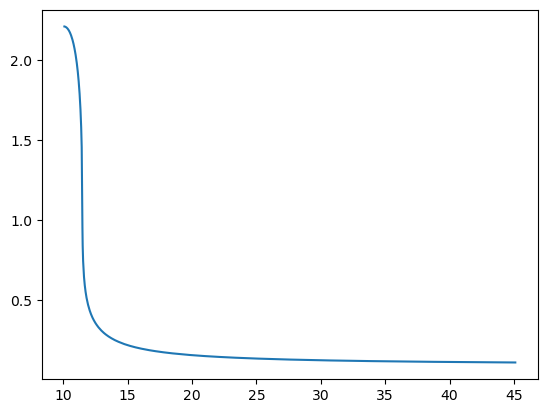

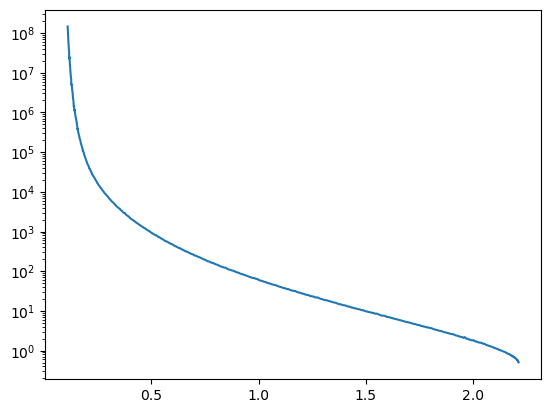

In [696]:
tov_ap4_sample = np.load("/home/sam/thesis/code/results/tov_res/test_ap4_mr.npy")
tov_ap4_sample = np.load("/home/sam/thesis/code/results/tov_res/test_ap4_tidal.npy")

m_ap4 = tov_ap4_sample[0][0]
r_ap4 = tov_ap4_sample[1][0]
lam_ap4 = tov_ap4_sample[2][0]

plt.plot(r_ap4, m_ap4)
plt.show()

plt.plot(m_ap4, lam_ap4)
plt.yscale("log")


In [653]:
lam_ap4

array([ 1.29318584e+12,  7.39917483e+11,  4.06343526e+11,  3.15790090e+11,
        4.54832518e+11,  2.24993484e+11,  1.88123669e+11,  1.36785466e+11,
        1.07515949e+11,  8.82578810e+10,  6.86845467e+10,  4.68886115e+10,
        4.51971919e+10,  4.07618297e+10,  2.93054033e+10,  2.47916149e+10,
        2.09058314e+10,  1.79774996e+10,  1.52233338e+10,  1.42674802e+10,
        1.24188001e+10,  9.66929643e+09,  9.21181210e+09,  6.81874997e+09,
        6.69742028e+09,  4.71762769e+09,  4.33547871e+09,  3.75416248e+09,
        3.02034851e+09,  2.76878518e+09,  2.41822968e+09,  2.09227125e+09,
        1.72825257e+09,  1.54779020e+09,  1.48027450e+09,  1.30105795e+09,
        1.09902182e+09,  9.93511715e+08,  8.79619379e+08,  7.27289986e+08,
        7.38163226e+08,  6.05677046e+08,  4.88816150e+08,  4.33913326e+08,
        4.10844257e+08,  3.54394818e+08,  3.39057291e+08,  2.76968997e+08,
        2.54480362e+08,  2.31047389e+08,  1.95788674e+08,  1.74976419e+08,
        1.56950435e+08,  

#### single core pressure

In [637]:
tov_ap4_debug = np.load("/home/sam/thesis/code/results/tov_res/test_ap4_debug.npy")

m = tov_ap4_debug[0][0]
r = tov_ap4_debug[1][0]
y = tov_ap4_debug[2][0]
p = tov_ap4_debug[3][0]

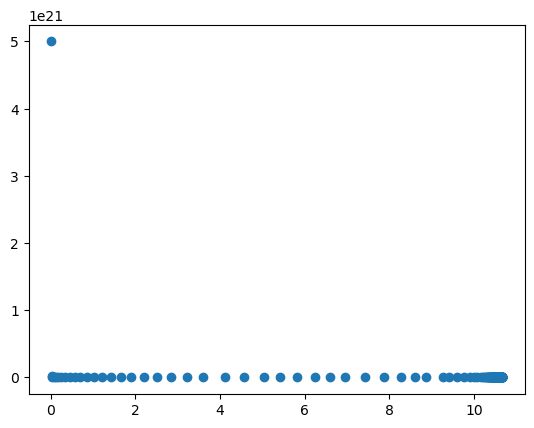

In [638]:
plt.scatter(r[:],y[:])

In [639]:
y[-1]

0.007241275298554494

# test eos

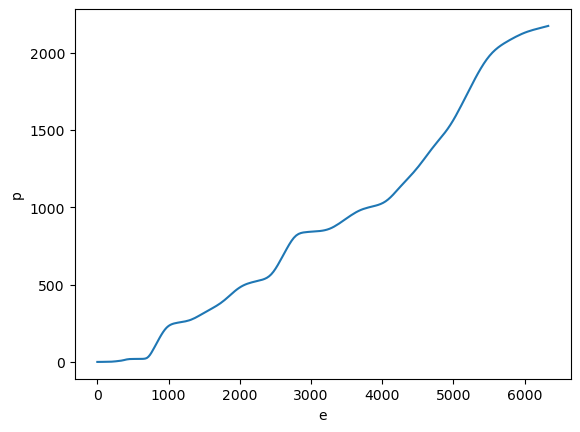

In [254]:
plt.plot(e_array, p_array)
plt.xlabel("e")
plt.ylabel("p")
plt.show()

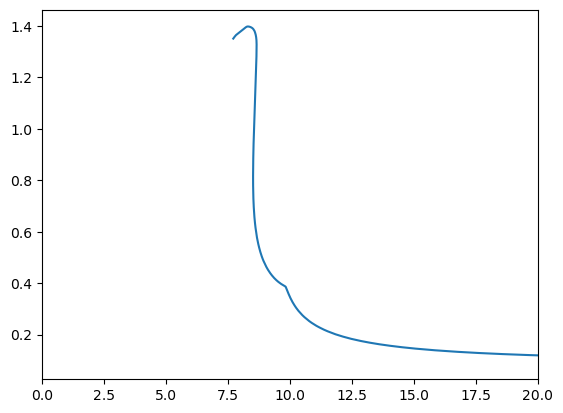

In [697]:
samples = np.load("/home/sam/thesis/code/results/tov_res/test_eos_mr.npy")
m = samples[0][0]
r = samples[1][0]
l = samples[2][0]

plt.plot(r,m)
plt.xlim(0,20)
plt.show()


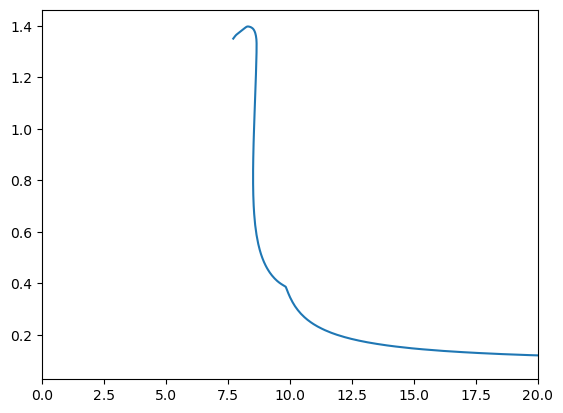

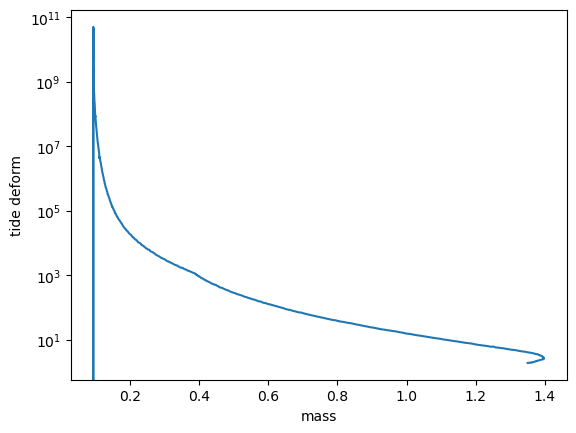

In [700]:
samples = np.load("/home/sam/thesis/code/results/tov_res/test_eos_tidal.npy")
m = samples[0][0]
r = samples[1][0]
l = samples[2][0]

plt.plot(r,m)
plt.xlim(0,20)
plt.show()

plt.plot(m,l)
plt.xlabel("mass")
plt.ylabel("tide deform")
plt.yscale("log")
plt.show()  

### single p_core

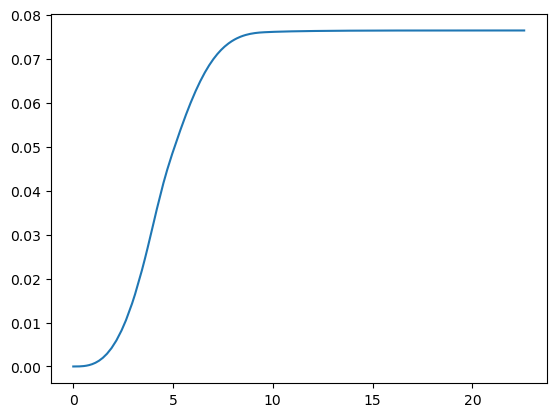

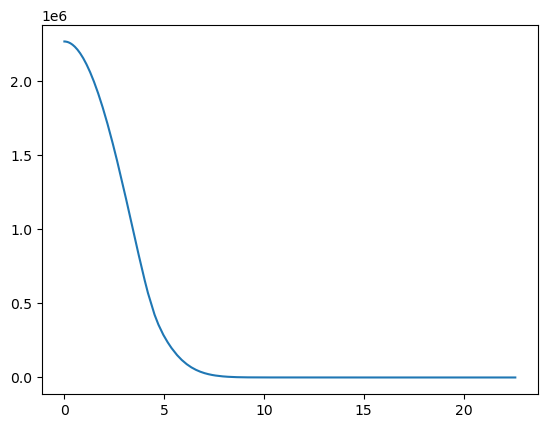

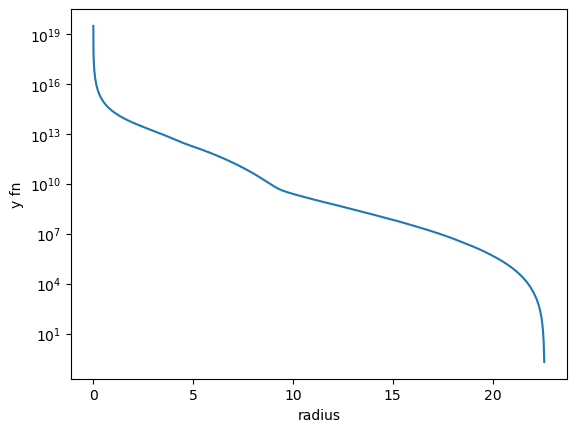

In [708]:
samples = np.load("/home/sam/thesis/code/results/tov_res/test_eos_debug.npy")
m = samples[0][0]
r = samples[1][0]
y = samples[2][0]
p = samples[3][0]

plt.plot(r,m)
plt.show()

plt.plot(r,p)
plt.show()

plt.plot(r,y)
plt.xlabel("radius")
plt.ylabel("y fn")
plt.yscale("log")
plt.show()  

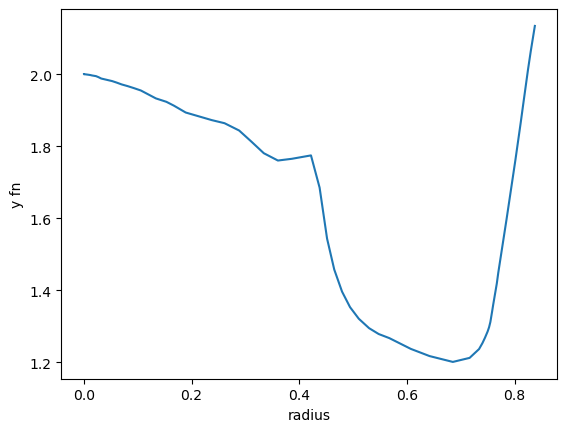

In [360]:
plt.plot(r,y)
plt.xlabel("radius")
plt.ylabel("y fn")
#plt.ylim(0,15)
plt.show()

# gpr eoses

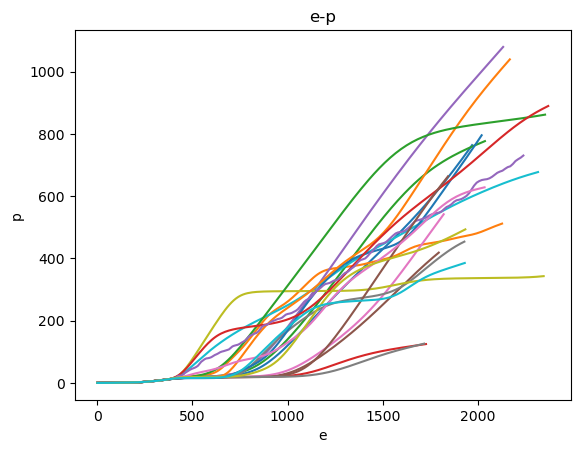

In [5]:
n_end = 10

eos = np.load(f"/home/sam/thesis/code/results/testing/{n_end}_eos.npy")

e = eos[0]
p = eos[1]
cs2 = eos[2]

for i in range((eos.shape[1])):
    plt.plot(e[i], p[i])
plt.title("e-p")
plt.xlabel("e")
plt.ylabel("p")
plt.show()

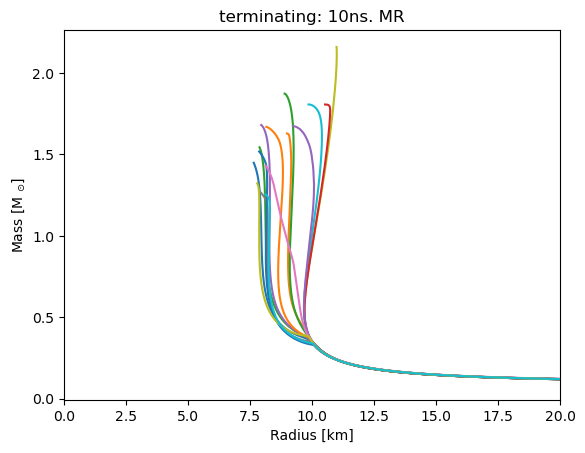

In [6]:
n_end = 10

samples = np.load(f"/home/sam/thesis/code/results/tov_res/{n_end}_eos_mr.npy")

m = samples[0]
r = samples[1]
l = samples[2]


for i in range((samples.shape[1])):
    plt.plot(r[i], m[i])
plt.xlim(0,20)
plt.xlabel("Radius [km]")
plt.ylabel(r"Mass [M $_{\odot}$]")
plt.title("terminating: 10ns. MR")
plt.show()


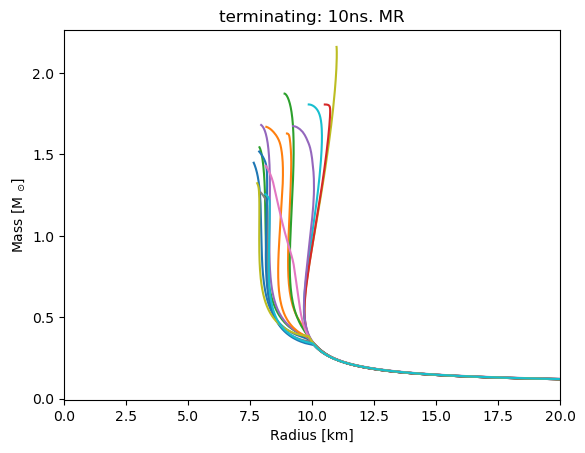

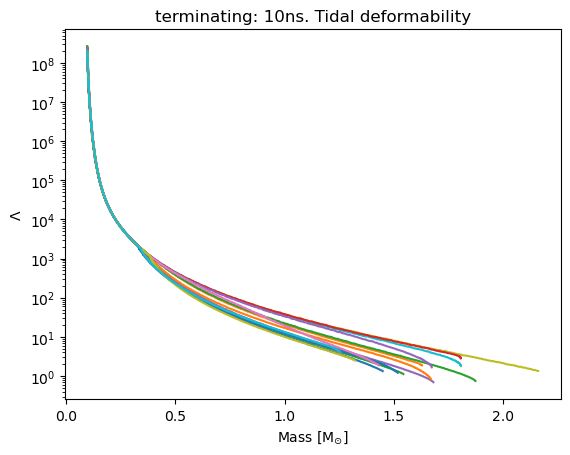

In [7]:
n_end = 10
samples = np.load(f"/home/sam/thesis/code/results/tov_res/{n_end}_eos_tidal.npy")

m = samples[0]
r = samples[1]
l = samples[2]


for i in range((samples.shape[1])):
    plt.plot(r[i], m[i])
plt.xlim(0,20)
plt.xlabel("Radius [km]")
plt.ylabel(r"Mass [M $_{\odot}$]")
plt.title("terminating: 10ns. MR")
plt.show()


for i in range((samples.shape[1])):
    plt.plot(m[i], l[i])
    plt.yscale("log")

plt.xlabel(r"Mass [M$_{\odot}$]")
plt.ylabel(r"$\Lambda$")
plt.title("terminating: 10ns. Tidal deformability")
plt.show()